In [1]:
!python -V
!pip show jupyterlab pandas plotly cufflinks seaborn openpyxl itables lxml pyarrow pip

Python 3.10.7
Name: jupyterlab
Version: 3.5.0
Summary: JupyterLab computational environment
Home-page: https://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: 
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: ipython, jinja2, jupyter-core, jupyter-server, jupyterlab-server, nbclassic, notebook, packaging, tomli, tornado
Required-by: 
---
Name: pandas
Version: 1.5.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: cufflinks, itables, seaborn
---
Name: plotly
Version: 5.11.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: 

# <center>**LIBRERIAS Y FUNCIONES**</center>

In [225]:
# ocultar los warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import random
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

from utilidades import crear_dataframes, join_dataframe

df1, df2, df3 = crear_dataframes(limite_muestra = 100)

<IPython.core.display.Javascript object>

# <center>**LEER ARCHIVOS Y CONVERTIRLOS EN DATAFRAME**</center>

# <center>**JSON**</center>

In [3]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/json_dataframe.json'
json = pd.read_json(archivo)
json

Id  Lider     Mamíferos                         Reptiles  \
0     1     42         Vacas  Lagartos voladores australianos   
1     2     32    Chimpancés                       Camaleones   
2     3     41        Leones                       Cocodrilos   
3     4     94         Vacas               Lagartijas comunes   
4     5     14       Ratones                          Iguanas   
..  ...    ...           ...                              ...   
95   96     75      Ballenas           Mosasaurios (extintos)   
96   97     79  Rinocerontes                       Cocodrilos   
97   98     14      Canguros                       Cocodrilos   
98   99     34        Cabras        Tuátaras de Nueva Zelanda   
99  100     16      Caballos                         Luciones   

                    Peces                     Anfibios        Aves  
0           Koi japoneses                     Cecilias  Guacamayas  
1                  Atunes                   Gallipatos       Loros  
2                  Carpas          Ranas de Seychelles     Buitres  
3           Koi japoneses  Salamandras gigantes chinas   Pelícanos  
4   Celacantos (extintos)              Ranas de Darwin     Tucanes  
..                    ...                          ...         ...  
95              Lenguados          Ranas de Seychelles    Cigüeñas  
96         Peces abisales                     Ajolotes       Loros  
97         Peces abisales          Ranas de Seychelles  Avestruces  
98             Peces sapo          Ranas de Seychelles    Canarios  
99         Peces abisales          Ranas de Seychelles    Gallinas  

[100 rows x 7 columns]

# <center>**CSV**</center>

In [4]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/csv_dataframe.csv'
csv = pd.read_csv(archivo)
csv

Id  Lider                  Vertebrados         Invertebrados  Ovíparos  \
0     1     96      Sapos de caña venenosos      Moscas cernícalo   Hornero   
1     2     67                      Jirafas              Hormigas     Ganso   
2     3      5                      Tucanes         Avispa scolia   Gallina   
3     4     79               Sapos gigantes  Mariposa saltacercas    Paloma   
4     5     68           Dragones de Komodo              Pulgones    Salmón   
..  ...    ...                          ...                   ...       ...   
95   96     45                      Gorilas                Termes    Salmón   
96   97      5                      Pirañas             Mosquitos      Loro   
97   98     72                     Luciones      Abeja de la miel    Salmón   
98   99     59  Salamandras gigantes chinas  Caballito del diablo   Cigüeña   
99  100     21                        Vacas         Avispa scolia  Pingüino   

           Frugívoros             Rumiantes  
0              Bonobo      Ciervo de copete  
1               Tapir     Bisonte estepario  
2              Perico                Vicuña  
3               Lémur             Sitatunga  
4               Tucán             Sitatunga  
..                ...                   ...  
95          Zarigüeya  Antílope jeroglífico  
96          Zarigüeya                  Oryx  
97              Tucán                  Cebú  
98  Mosca de la fruta                  Toro  
99   Conejo del campo       Venado temazate  

[100 rows x 7 columns]

# <center>**EXCEL**</center>

In [5]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
pd.read_excel(archivo, engine="openpyxl")

Id  Lider     Mamíferos                 Reptiles                  Peces  \
0     1      1    Chimpancés       Tortugas acuáticas  Los tiburones ballena   
1     2     28    Chimpancés               Camaleones              Tiburones   
2     3     93         Vacas       Tortugas acuáticas              Tiburones   
3     4     31       Ratones  Pterosaurios (extintos)              Tiburones   
4     5     32      Ballenas       Tortugas acuáticas           Peces payaso   
..  ...    ...           ...                      ...                    ...   
95   96     81         Vacas       Tortugas acuáticas           Peces espada   
96   97     41  Rinocerontes   Mosasaurios (extintos)                 Atunes   
97   98     93        Leones      Tortugas terrestres                Pirañas   
98   99     10      Caballos                  Iguanas             Peces luna   
99  100     49      Caballos                 Luciones        Anguilas de mar   

                       Anfibios         Aves  
0                Ranas arcoíris     Gallinas  
1                      Ajolotes        Loros  
2           Salamandras comunes     Gaviotas  
3                Ranas arcoíris      Tucanes  
4                    Gallipatos     Gaviotas  
..                          ...          ...  
95        Lisorofios (extintos)      Tucanes  
96              Ranas venenosas     Cigüeñas  
97  Salamandras gigantes chinas      Tucanes  
98               Sapos gigantes  Pavorreales  
99            Ranas arborícolas      Águilas  

[100 rows x 7 columns]

In [6]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
excel = pd.read_excel(archivo, engine="openpyxl", sheet_name='dataframe_3')
excel

Id  Lider     Mamíferos            Ovíparos Herbívoros     Carnívoros  \
0     1     60    Chimpancés  Víbora de cascabel      Cebra      Comadreja   
1     2      8  Rinocerontes           Guacamayo   Elefante            Boa   
2     3     25      Caballos             Gallina     Ciervo         Marabú   
3     4      3       Gorilas            Avestruz      Burro        Kinkajú   
4     5     38     Elefantes             Gorrión    Canguro  Pantera negra   
..  ...    ...           ...                 ...        ...            ...   
95   96     91      Ballenas             Hornero    Tortuga      Oso polar   
96   97     85        Ovejas                Rana    Ardilla      Oso pardo   
97   98     26        Perros              Cóndor     Alpaca          Pitón   
98   99     61        Ovejas            Avestruz      Oveja         Chacal   
99  100     74        Leones             Hornero    Caballo           Fosa   

    Omnívoros  
0      Zorzal  
1     Tiburón  
2      Manatí  
3      Nutria  
4       Erizo  
..        ...  
95     Morena  
96    Bacalao  
97     Grulla  
98     Avispa  
99  Pez globo  

[100 rows x 7 columns]

# <center>**HTML**</center>

In [7]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/html_dataframe.html'
pd.read_html(archivo, encoding="UTF-8")[0]

Id  Lider     Mamíferos                         Reptiles  \
0     1     42         Vacas  Lagartos voladores australianos   
1     2     32    Chimpancés                       Camaleones   
2     3     41        Leones                       Cocodrilos   
3     4     94         Vacas               Lagartijas comunes   
4     5     14       Ratones                          Iguanas   
..  ...    ...           ...                              ...   
95   96     75      Ballenas           Mosasaurios (extintos)   
96   97     79  Rinocerontes                       Cocodrilos   
97   98     14      Canguros                       Cocodrilos   
98   99     34        Cabras        Tuátaras de Nueva Zelanda   
99  100     16      Caballos                         Luciones   

                    Peces                     Anfibios        Aves  
0           Koi japoneses                     Cecilias  Guacamayas  
1                  Atunes                   Gallipatos       Loros  
2                  Carpas          Ranas de Seychelles     Buitres  
3           Koi japoneses  Salamandras gigantes chinas   Pelícanos  
4   Celacantos (extintos)              Ranas de Darwin     Tucanes  
..                    ...                          ...         ...  
95              Lenguados          Ranas de Seychelles    Cigüeñas  
96         Peces abisales                     Ajolotes       Loros  
97         Peces abisales          Ranas de Seychelles  Avestruces  
98             Peces sapo          Ranas de Seychelles    Canarios  
99         Peces abisales          Ranas de Seychelles    Gallinas  

[100 rows x 7 columns]

# <center>**PARQUET**</center>

In [8]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/parquet_dataframe.parquet'
pd.read_parquet(archivo)

Id  Lider                  Vertebrados         Invertebrados  Ovíparos  \
0     1     96      Sapos de caña venenosos      Moscas cernícalo   Hornero   
1     2     67                      Jirafas              Hormigas     Ganso   
2     3      5                      Tucanes         Avispa scolia   Gallina   
3     4     79               Sapos gigantes  Mariposa saltacercas    Paloma   
4     5     68           Dragones de Komodo              Pulgones    Salmón   
..  ...    ...                          ...                   ...       ...   
95   96     45                      Gorilas                Termes    Salmón   
96   97      5                      Pirañas             Mosquitos      Loro   
97   98     72                     Luciones      Abeja de la miel    Salmón   
98   99     59  Salamandras gigantes chinas  Caballito del diablo   Cigüeña   
99  100     21                        Vacas         Avispa scolia  Pingüino   

           Frugívoros             Rumiantes  
0              Bonobo      Ciervo de copete  
1               Tapir     Bisonte estepario  
2              Perico                Vicuña  
3               Lémur             Sitatunga  
4               Tucán             Sitatunga  
..                ...                   ...  
95          Zarigüeya  Antílope jeroglífico  
96          Zarigüeya                  Oryx  
97              Tucán                  Cebú  
98  Mosca de la fruta                  Toro  
99   Conejo del campo       Venado temazate  

[100 rows x 7 columns]

# <center>GUARDAR DATAFRAME A **JSON, CVS, EXCEL, HTML, PARQUET**</center>

In [9]:
df1.to_json('archivos/json_dataframe.json', orient ='records', indent=2)
df2.to_csv('archivos/csv_dataframe.csv', index=False)
df3.to_excel('archivos/excel_dataframe.xlsx', index=False, sheet_name='dataframe_1')
df1.to_html('archivos/html_dataframe.html', index=False)
df2.to_parquet('archivos/parquet_dataframe.parquet', index=False)

## <center>**PRINT VS DISPLAY**</center>

In [10]:
print(df1, df2)

     Id  Lider     Mamíferos                   Reptiles  \
0     1     96         Gatos                   Luciones   
1     2     88     Elefantes         Tortugas galápagos   
2     3     75     Elefantes                 Aligátores   
3     4     10     Capibaras  Tuátaras de Nueva Zelanda   
4     5     91  Rinocerontes                    Víboras   
..  ...    ...           ...                        ...   
95   96     65      Ballenas                    Víboras   
96   97     60      Ballenas         Tortugas galápagos   
97   98     24     Elefantes          Monstruos de Gila   
98   99     73       Gorilas     Mosasaurios (extintos)   
99  100     34         Orcas          Monstruos de Gila   

                    Peces                 Anfibios                 Aves  
0                 Pirañas        Ranas arborícolas             Cigüeñas  
1               Tiburones           Ranas arcoíris            Pelícanos  
2          Peces abisales          Ranas venenosas                Pat

In [11]:
display(df1, df2)

Id  Lider     Mamíferos                   Reptiles  \
0     1     96         Gatos                   Luciones   
1     2     88     Elefantes         Tortugas galápagos   
2     3     75     Elefantes                 Aligátores   
3     4     10     Capibaras  Tuátaras de Nueva Zelanda   
4     5     91  Rinocerontes                    Víboras   
..  ...    ...           ...                        ...   
95   96     65      Ballenas                    Víboras   
96   97     60      Ballenas         Tortugas galápagos   
97   98     24     Elefantes          Monstruos de Gila   
98   99     73       Gorilas     Mosasaurios (extintos)   
99  100     34         Orcas          Monstruos de Gila   

                    Peces                 Anfibios                 Aves  
0                 Pirañas        Ranas arborícolas             Cigüeñas  
1               Tiburones           Ranas arcoíris            Pelícanos  
2          Peces abisales          Ranas venenosas                Patos  
3              Esturiones  Microsaurios (extintos)             Canarios  
4   Los tiburones ballena  Microsaurios (extintos)          Pavorreales  
..                    ...                      ...                  ...  
95              Tiburones                 Necturos          Pavorreales  
96                 Atunes      Salamandras comunes                Patos  
97            Peces globo         Sapos corredores  Pájaros carpinteros  
98           Peces espada      Salamandras comunes              Tucanes  
99        Anguilas de mar  Microsaurios (extintos)              Cuervos  

[100 rows x 7 columns]

Id  Lider            Vertebrados                 Invertebrados  \
0     1     81           Peces payaso                     Mosquitos   
1     2     52          Seres humanos          Mariposa saltacercas   
2     3     75           Rinocerontes  Mariposa blanquita de la col   
3     4     81             Barracudas           Avispas portasierra   
4     5      9  Celacantos (extintos)            Curilla o aceitera   
..  ...    ...                    ...                           ...   
95   96     96                Pirañas             Avispas alfareras   
96   97     38         Ranas arcoíris                Araña cangrejo   
97   98     84   Ranas toro africanas                      Pulgones   
98   99     84                Varanos                        Abejas   
99  100     12             Chimpancés                    Cucarachas   

     Ovíparos         Frugívoros                   Rumiantes  
0    Avestruz             Bonobo                      Uapití  
1   Cocodrilo          Mono Tití        Venado de las Pampas  
2    Codorniz              Tucán                        Cebú  
3     Gallina             Macaco             Anoa de llanura  
4       Abeja              Tucán               Venado andino  
..        ...                ...                         ...  
95  Guacamayo  Mosca de la fruta                          Ñu  
96     Paloma              Tapir  Antílope de cuatro cuernos  
97    Cigüeña             Macaco                       Oveja  
98    Gallina              Tapir                        Oryx  
99    Hornero               Loro                        Vaca  

[100 rows x 7 columns]

# <center>OBTENER LOS TAMAÑOS DE UN DATAFRAME</center>

In [12]:
print(f'Cantidad de filas y columnas {df1.shape}')
print(f'Cantidad de filas {df1.shape[0]}')
print(f'Cantidad de columnas {df1.shape[1]}')
df1

Cantidad de filas y columnas (100, 7)
Cantidad de filas 100
Cantidad de columnas 7


Id  Lider     Mamíferos                   Reptiles  \
0     1     96         Gatos                   Luciones   
1     2     88     Elefantes         Tortugas galápagos   
2     3     75     Elefantes                 Aligátores   
3     4     10     Capibaras  Tuátaras de Nueva Zelanda   
4     5     91  Rinocerontes                    Víboras   
..  ...    ...           ...                        ...   
95   96     65      Ballenas                    Víboras   
96   97     60      Ballenas         Tortugas galápagos   
97   98     24     Elefantes          Monstruos de Gila   
98   99     73       Gorilas     Mosasaurios (extintos)   
99  100     34         Orcas          Monstruos de Gila   

                    Peces                 Anfibios                 Aves  
0                 Pirañas        Ranas arborícolas             Cigüeñas  
1               Tiburones           Ranas arcoíris            Pelícanos  
2          Peces abisales          Ranas venenosas                Patos  
3              Esturiones  Microsaurios (extintos)             Canarios  
4   Los tiburones ballena  Microsaurios (extintos)          Pavorreales  
..                    ...                      ...                  ...  
95              Tiburones                 Necturos          Pavorreales  
96                 Atunes      Salamandras comunes                Patos  
97            Peces globo         Sapos corredores  Pájaros carpinteros  
98           Peces espada      Salamandras comunes              Tucanes  
99        Anguilas de mar  Microsaurios (extintos)              Cuervos  

[100 rows x 7 columns]

# <center>**OBTENER EL RESUMEN DE LAS COLUMNAS DE UN DATAFRAME**</center>
## <center>**SOLO VALORES NO NULL**</center>

In [13]:
colores= {'AMARILLO':[1,None,2,3,None,3,4,None,None,1],
'AZUL':[5,None,None,None,None,10,15,20,25,None],
'ROJO':[2,None,5,10,15,20,7,31,None,None],
'VERDE':[4,None,None,None,None,None,None,None,None,None],
'ROSADO':[3,6,9,12,15,18,21,24,27,30]}

for key, value in colores.items():
    print(key, len(value), value)
    
df_colores = pd.DataFrame(colores)
df_colores

AMARILLO 10 [1, None, 2, 3, None, 3, 4, None, None, 1]
AZUL 10 [5, None, None, None, None, 10, 15, 20, 25, None]
ROJO 10 [2, None, 5, 10, 15, 20, 7, 31, None, None]
VERDE 10 [4, None, None, None, None, None, None, None, None, None]
ROSADO 10 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3
1       NaN   NaN   NaN    NaN       6
2       2.0   NaN   5.0    NaN       9
3       3.0   NaN  10.0    NaN      12
4       NaN   NaN  15.0    NaN      15
5       3.0  10.0  20.0    NaN      18
6       4.0  15.0   7.0    NaN      21
7       NaN  20.0  31.0    NaN      24
8       NaN  25.0   NaN    NaN      27
9       1.0   NaN   NaN    NaN      30

In [14]:
df_colores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AMARILLO  6 non-null      float64
 1   AZUL      5 non-null      float64
 2   ROJO      7 non-null      float64
 3   VERDE     1 non-null      float64
 4   ROSADO    10 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [15]:
df_colores.describe()

AMARILLO       AZUL       ROJO  VERDE     ROSADO
count  6.000000   5.000000   7.000000    1.0  10.000000
mean   2.333333  15.000000  12.857143    4.0  16.500000
std    1.211060   7.905694  10.056981    NaN   9.082951
min    1.000000   5.000000   2.000000    4.0   3.000000
25%    1.250000  10.000000   6.000000    4.0   9.750000
50%    2.500000  15.000000  10.000000    4.0  16.500000
75%    3.000000  20.000000  17.500000    4.0  23.250000
max    4.000000  25.000000  31.000000    4.0  30.000000

# <center>OBTENER LA DEFINICION DE LOS EJES DE UN DATAFRAME</center>

In [16]:
df_colores.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO'], dtype='object')]

# <center>OBTENER LOS NOMBRES DE LAS COLUMNAS DE UN DATAFRAME</center>

In [17]:
df_colores.columns.to_list()

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

In [18]:
list(df_colores.keys())

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

# <center>OBTENER LOS DATOS COMPLETOS DE UNA **COLUMNA** DE UN DATAFRAME</center>

In [19]:
df_colores.AMARILLO

AMARILLO
Loading... (need help?)


In [20]:
df_colores['AMARILLO']

AMARILLO
Loading... (need help?)


In [21]:
df_colores.AMARILLO.values

array([ 1., nan,  2.,  3., nan,  3.,  4., nan, nan,  1.])

# <center>**OBTENER LOS VALORES 'DISTINTOS' UNICOS(SIN REPETIR) DE UNA FILA**</center>

In [22]:
print(df_colores.AMARILLO.unique())
df_colores

[ 1. nan  2.  3.  4.]


AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3
1       NaN   NaN   NaN    NaN       6
2       2.0   NaN   5.0    NaN       9
3       3.0   NaN  10.0    NaN      12
4       NaN   NaN  15.0    NaN      15
5       3.0  10.0  20.0    NaN      18
6       4.0  15.0   7.0    NaN      21
7       NaN  20.0  31.0    NaN      24
8       NaN  25.0   NaN    NaN      27
9       1.0   NaN   NaN    NaN      30

# <center>**CONTAR VALORES NOT NULL DE UNA COLUMNA**</center>

In [23]:
print(df_colores.AMARILLO.values)
df_colores.AMARILLO.value_counts()

[ 1. nan  2.  3. nan  3.  4. nan nan  1.]


1.0    2
3.0    2
2.0    1
4.0    1
Name: AMARILLO, dtype: int64

# <center>**CONTAR VALORES NULL DE UN DATAFRAME**</center>

## <center>**AGRUPADO POR COLUMNAS NULL DE UN DATAFRAME**</center>

In [24]:
df_colores.isna().sum()

AMARILLO    4
AZUL        5
ROJO        3
VERDE       9
ROSADO      0
dtype: int64

## <center>**TOTAL DE TODAS LAS FILAS Y COLUMNAS NULL DE UN DATAFRAME**</center>

In [25]:
df_colores.isna().sum().sum()

21

### <center>**reset_index PARA PERSONALIZAR EL NOMBRE DE COLUMNA QUE AGRUPA EL RESULTADO**</center>

In [26]:
df_colores.isna().sum().reset_index(name ='Total Valores Nulos')

index  Total Valores Nulos
0  AMARILLO                    4
1      AZUL                    5
2      ROJO                    3
3     VERDE                    9
4    ROSADO                    0

### <center>**PERSONALIZAR NOMBRE DEL INDICE dataframe.index.name**</center>

In [27]:
indice_personalizado = df_colores.isna().sum()
indice_personalizado.index.name = 'Colores'
indice_personalizado.reset_index(name ='Total Valores Nulos')

Colores  Total Valores Nulos
0  AMARILLO                    4
1      AZUL                    5
2      ROJO                    3
3     VERDE                    9
4    ROSADO                    0

# <center>**CONTAR VALORES NULL Y NOT NULL DE UNA COLUMNA**</center>

In [28]:
df_colores.AMARILLO.isna().value_counts()

False    6
True     4
Name: AMARILLO, dtype: int64

## <center>**ELIMINA TODAS LAS FILAS CON AL MENOS UN VALOR NULL**</center>

In [29]:
display(df_colores)
df_colores.dropna()

AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3
1       NaN   NaN   NaN    NaN       6
2       2.0   NaN   5.0    NaN       9
3       3.0   NaN  10.0    NaN      12
4       NaN   NaN  15.0    NaN      15
5       3.0  10.0  20.0    NaN      18
6       4.0  15.0   7.0    NaN      21
7       NaN  20.0  31.0    NaN      24
8       NaN  25.0   NaN    NaN      27
9       1.0   NaN   NaN    NaN      30

AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3

## <center>**ELIMINA TODAS LAS COLUMNAS CON AL MENOS UN VALOR NULL**</center>

In [30]:
df_colores.T

0    1    2     3     4     5     6     7     8     9
AMARILLO  1.0  NaN  2.0   3.0   NaN   3.0   4.0   NaN   NaN   1.0
AZUL      5.0  NaN  NaN   NaN   NaN  10.0  15.0  20.0  25.0   NaN
ROJO      2.0  NaN  5.0  10.0  15.0  20.0   7.0  31.0   NaN   NaN
VERDE     4.0  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
ROSADO    3.0  6.0  9.0  12.0  15.0  18.0  21.0  24.0  27.0  30.0

In [31]:
df_colores.T.dropna().T

ROSADO
Loading... (need help?)


# <center>**OBTENER DATAFRAME FILTRADO CON MULTIPLES COLUMNAS**</center>

In [32]:
df1[['Id','Lider']]

Id  Lider
0     1     96
1     2     88
2     3     75
3     4     10
4     5     91
..  ...    ...
95   96     65
96   97     60
97   98     24
98   99     73
99  100     34

[100 rows x 2 columns]

### <center>**ADICIONAR FILA DATAFRAME**</center>

### <center>**USANDO APPEND DICCIONARIO**</center>

In [61]:
dataframe_to_filter = df2.head()
dataframe_to_filter

Id  Lider            Vertebrados                 Invertebrados   Ovíparos  \
0   1     81           Peces payaso                     Mosquitos   Avestruz   
1   2     52          Seres humanos          Mariposa saltacercas  Cocodrilo   
2   3     75           Rinocerontes  Mariposa blanquita de la col   Codorniz   
3   4     81             Barracudas           Avispas portasierra    Gallina   
4   5      9  Celacantos (extintos)            Curilla o aceitera      Abeja   

  Frugívoros             Rumiantes  
0     Bonobo                Uapití  
1  Mono Tití  Venado de las Pampas  
2      Tucán                  Cebú  
3     Macaco       Anoa de llanura  
4      Tucán         Venado andino

In [62]:
# no puede tener columnas con el mismo nombre
dataframe_to_filter.append(dataframe_to_filter.loc[3].to_dict(), ignore_index=True)

Id  Lider            Vertebrados                 Invertebrados   Ovíparos  \
0   1     81           Peces payaso                     Mosquitos   Avestruz   
1   2     52          Seres humanos          Mariposa saltacercas  Cocodrilo   
2   3     75           Rinocerontes  Mariposa blanquita de la col   Codorniz   
3   4     81             Barracudas           Avispas portasierra    Gallina   
4   5      9  Celacantos (extintos)            Curilla o aceitera      Abeja   
5   4     81             Barracudas           Avispas portasierra    Gallina   

  Frugívoros             Rumiantes  
0     Bonobo                Uapití  
1  Mono Tití  Venado de las Pampas  
2      Tucán                  Cebú  
3     Macaco       Anoa de llanura  
4      Tucán         Venado andino  
5     Macaco       Anoa de llanura

### <center>**LISTA DE DICCIONARIOS**</center>

In [66]:
lista_diccionarios = [dataframe_to_filter.loc[1].to_dict(),dataframe_to_filter.loc[2].to_dict(),dataframe_to_filter.loc[3].to_dict()]
dataframe_to_filter.append(lista_diccionarios, ignore_index=True)

Id  Lider            Vertebrados                 Invertebrados   Ovíparos  \
0   1     81           Peces payaso                     Mosquitos   Avestruz   
1   2     52          Seres humanos          Mariposa saltacercas  Cocodrilo   
2   3     75           Rinocerontes  Mariposa blanquita de la col   Codorniz   
3   4     81             Barracudas           Avispas portasierra    Gallina   
4   5      9  Celacantos (extintos)            Curilla o aceitera      Abeja   
5   2     52          Seres humanos          Mariposa saltacercas  Cocodrilo   
6   3     75           Rinocerontes  Mariposa blanquita de la col   Codorniz   
7   4     81             Barracudas           Avispas portasierra    Gallina   

  Frugívoros             Rumiantes  
0     Bonobo                Uapití  
1  Mono Tití  Venado de las Pampas  
2      Tucán                  Cebú  
3     Macaco       Anoa de llanura  
4      Tucán         Venado andino  
5  Mono Tití  Venado de las Pampas  
6      Tucán                  Cebú  
7     Macaco       Anoa de llanura

### <center>**USANDO INDICE ESPECIFICO**</center>

In [67]:
dataframe_to_filter.loc[0.5] = [chr(valor + 64) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter.loc[0.7] = [chr(valor + 84) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter

Id Lider            Vertebrados                 Invertebrados   Ovíparos  \
0.0  1    81           Peces payaso                     Mosquitos   Avestruz   
1.0  2    52          Seres humanos          Mariposa saltacercas  Cocodrilo   
2.0  3    75           Rinocerontes  Mariposa blanquita de la col   Codorniz   
3.0  4    81             Barracudas           Avispas portasierra    Gallina   
4.0  5     9  Celacantos (extintos)            Curilla o aceitera      Abeja   
0.5  @     A                      B                             C          D   
0.7  T     U                      V                             W          X   

    Frugívoros             Rumiantes  
0.0     Bonobo                Uapití  
1.0  Mono Tití  Venado de las Pampas  
2.0      Tucán                  Cebú  
3.0     Macaco       Anoa de llanura  
4.0      Tucán         Venado andino  
0.5          E                     F  
0.7          Y                     Z

### <center>**USANDO ULTIMA POSICION**</center>

In [70]:
# calcula la ultima posicion conociendo el tamano del dataframe len(dataframe_to_filter)
dataframe_to_filter.loc[len(dataframe_to_filter)] = [chr(valor + 104) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter = dataframe_to_filter.sort_index(ascending=True)
dataframe_to_filter

Id Lider            Vertebrados                 Invertebrados   Ovíparos  \
0.0  1    81           Peces payaso                     Mosquitos   Avestruz   
0.5  @     A                      B                             C          D   
0.7  T     U                      V                             W          X   
1.0  2    52          Seres humanos          Mariposa saltacercas  Cocodrilo   
2.0  3    75           Rinocerontes  Mariposa blanquita de la col   Codorniz   
3.0  4    81             Barracudas           Avispas portasierra    Gallina   
4.0  5     9  Celacantos (extintos)            Curilla o aceitera      Abeja   
7.0  h     i                      j                             k          l   
8.0  h     i                      j                             k          l   
9.0  h     i                      j                             k          l   

    Frugívoros             Rumiantes  
0.0     Bonobo                Uapití  
0.5          E                     F  
0.7          Y                     Z  
1.0  Mono Tití  Venado de las Pampas  
2.0      Tucán                  Cebú  
3.0     Macaco       Anoa de llanura  
4.0      Tucán         Venado andino  
7.0          m                     n  
8.0          m                     n  
9.0          m                     n

# <center>**ADICIONAR NUEVA COLUMNA UN DATAFRAME**</center>

In [72]:
dataframe_to_filter['nueva columna'] = [chr(valor + 33) for valor in range (dataframe_to_filter.shape[0])]
dataframe_to_filter

Id Lider            Vertebrados                 Invertebrados   Ovíparos  \
0.0  1    81           Peces payaso                     Mosquitos   Avestruz   
0.5  @     A                      B                             C          D   
0.7  T     U                      V                             W          X   
1.0  2    52          Seres humanos          Mariposa saltacercas  Cocodrilo   
2.0  3    75           Rinocerontes  Mariposa blanquita de la col   Codorniz   
3.0  4    81             Barracudas           Avispas portasierra    Gallina   
4.0  5     9  Celacantos (extintos)            Curilla o aceitera      Abeja   
7.0  h     i                      j                             k          l   
8.0  h     i                      j                             k          l   
9.0  h     i                      j                             k          l   

    Frugívoros             Rumiantes nueva columna  
0.0     Bonobo                Uapití             !  
0.5          E                     F             "  
0.7          Y                     Z             #  
1.0  Mono Tití  Venado de las Pampas             $  
2.0      Tucán                  Cebú             %  
3.0     Macaco       Anoa de llanura             &  
4.0      Tucán         Venado andino             '  
7.0          m                     n             (  
8.0          m                     n             )  
9.0          m                     n             *

## <center>**ASSIGN** ADICIONA COLUMNA EN LA ULTIMA POSICION</center>

### <center>**LAMBDA**</center>

In [165]:
df3.assign(temporal=lambda x: x.Id * x.Lider)

Id  Lider        Vertebrados Herbívoros       Carnívoros  Omnívoros  \
0     1    100         Peces vela   Antílope           Piraña   Flamingo   
1     2      6  Monstruos de Gila     Jirafa                   Casuarios   
2     3     89           Cóndores      Cebra             Atún    Mapache   
3     4     54            Iguanas      Llama             Gato      Bagre   
4     5     86            Tucanes      Cebra             León    Bacalao   
..  ...    ...                ...        ...              ...        ...   
95   96     32             Hienas     Cobayo  Gineta manchada   Tortugas   
96   97     18            Buitres      Cebra        Barracuda    Gallina   
97   98     43    Anguilas de mar    Tortuga            Pitón   Avutarda   
98   99     12             Cabras     Ciervo           Jaguar      Cerdo   
99  100     47          Tiburones     Alpaca           Salmón        Emú   

    temporal  
0        100  
1         12  
2        267  
3        216  
4        430  
..       ...  
95      3072  
96      1746  
97      4214  
98      1188  
99      4700  

[100 rows x 7 columns]

### <center>**OPERADOR TERNARIO**</center>

In [166]:
df3.assign(temporal_v2=df1.Aves if len(df1.Aves) < 12 else df1.Mamíferos)

Id  Lider        Vertebrados Herbívoros       Carnívoros  Omnívoros  \
0     1    100         Peces vela   Antílope           Piraña   Flamingo   
1     2      6  Monstruos de Gila     Jirafa                   Casuarios   
2     3     89           Cóndores      Cebra             Atún    Mapache   
3     4     54            Iguanas      Llama             Gato      Bagre   
4     5     86            Tucanes      Cebra             León    Bacalao   
..  ...    ...                ...        ...              ...        ...   
95   96     32             Hienas     Cobayo  Gineta manchada   Tortugas   
96   97     18            Buitres      Cebra        Barracuda    Gallina   
97   98     43    Anguilas de mar    Tortuga            Pitón   Avutarda   
98   99     12             Cabras     Ciervo           Jaguar      Cerdo   
99  100     47          Tiburones     Alpaca           Salmón        Emú   

      temporal_v2  
0        Ballenas  
1           Gatos  
2          Leones  
3   Seres humanos  
4   Seres humanos  
..            ...  
95     Chimpancés  
96      Elefantes  
97   Rinocerontes  
98       Delfines  
99       Ballenas  

[100 rows x 7 columns]

### <center>**MULTPLES LAMBDA O COLUMNAS DEL DATAFRAME**</center>

In [169]:
df3.Herbívoros

Id  Lider        Vertebrados Herbívoros       Carnívoros  Omnívoros
0     1    100         Peces vela   Antílope           Piraña   Flamingo
1     2      6  Monstruos de Gila     Jirafa                   Casuarios
2     3     89           Cóndores      Cebra             Atún    Mapache
3     4     54            Iguanas      Llama             Gato      Bagre
4     5     86            Tucanes      Cebra             León    Bacalao
..  ...    ...                ...        ...              ...        ...
95   96     32             Hienas     Cobayo  Gineta manchada   Tortugas
96   97     18            Buitres      Cebra        Barracuda    Gallina
97   98     43    Anguilas de mar    Tortuga            Pitón   Avutarda
98   99     12             Cabras     Ciervo           Jaguar      Cerdo
99  100     47          Tiburones     Alpaca           Salmón        Emú

[100 rows x 6 columns]

In [170]:
def unir(row):
    
    return row.Vertebrados + ' y ' + row.Herbívoros
    

df3.assign(temporal_multiple=lambda x: x.Id * x.Lider, verterviboros=unir, ivoros= df3.Carnívoros + ' ' + df3.Omnívoros)

Id  Lider        Vertebrados Herbívoros       Carnívoros  Omnívoros  \
0     1    100         Peces vela   Antílope           Piraña   Flamingo   
1     2      6  Monstruos de Gila     Jirafa                   Casuarios   
2     3     89           Cóndores      Cebra             Atún    Mapache   
3     4     54            Iguanas      Llama             Gato      Bagre   
4     5     86            Tucanes      Cebra             León    Bacalao   
..  ...    ...                ...        ...              ...        ...   
95   96     32             Hienas     Cobayo  Gineta manchada   Tortugas   
96   97     18            Buitres      Cebra        Barracuda    Gallina   
97   98     43    Anguilas de mar    Tortuga            Pitón   Avutarda   
98   99     12             Cabras     Ciervo           Jaguar      Cerdo   
99  100     47          Tiburones     Alpaca           Salmón        Emú   

    temporal_multiple               verterviboros                    ivoros  
0                 100       Peces vela y Antílope           Piraña Flamingo  
1                  12  Monstruos de Gila y Jirafa                 Casuarios  
2                 267            Cóndores y Cebra              Atún Mapache  
3                 216             Iguanas y Llama                Gato Bagre  
4                 430             Tucanes y Cebra              León Bacalao  
..                ...                         ...                       ...  
95               3072             Hienas y Cobayo  Gineta manchada Tortugas  
96               1746             Buitres y Cebra         Barracuda Gallina  
97               4214   Anguilas de mar y Tortuga            Pitón Avutarda  
98               1188             Cabras y Ciervo              Jaguar Cerdo  
99               4700          Tiburones y Alpaca                Salmón Emú  

[100 rows x 9 columns]

### <center>**INSERT COLUMNA DATAFRAME EN LA UBICACION QUE SE QUIERA DE MANERA PERMANENTE**</center>

In [171]:
df3.insert(0, "insertada", [valor*valor for valor in range(df3.shape[0])])
df3

insertada   Id  Lider        Vertebrados Herbívoros       Carnívoros  \
0           0    1    100         Peces vela   Antílope           Piraña   
1           1    2      6  Monstruos de Gila     Jirafa                    
2           4    3     89           Cóndores      Cebra             Atún   
3           9    4     54            Iguanas      Llama             Gato   
4          16    5     86            Tucanes      Cebra             León   
..        ...  ...    ...                ...        ...              ...   
95       9025   96     32             Hienas     Cobayo  Gineta manchada   
96       9216   97     18            Buitres      Cebra        Barracuda   
97       9409   98     43    Anguilas de mar    Tortuga            Pitón   
98       9604   99     12             Cabras     Ciervo           Jaguar   
99       9801  100     47          Tiburones     Alpaca           Salmón   

    Omnívoros  
0    Flamingo  
1   Casuarios  
2     Mapache  
3       Bagre  
4     Bacalao  
..        ...  
95   Tortugas  
96    Gallina  
97   Avutarda  
98      Cerdo  
99        Emú  

[100 rows x 7 columns]

### <center>**NO SE INSERTA UNA NUEVA COLUMNA EN EL DATAFRAME CON EL MISMO NOMBRE SI NO SE ESPECIFICA LA OPCION DE DUPLICADO**</center>

In [172]:
df3.insert(0, "insertada", [valor*valor for valor in range(df3.shape[0])])
df3

ValueError: cannot insert insertada, already exists

In [182]:
df3.insert(0, "insertada", [valor*valor*valor + 5 for valor in range(df3.shape[0])], allow_duplicates=True)
df3

insertada  insertada  insertada  PRIMERA POSICION  insertada   Id  Lider  \
0           5          0          0                 0          0    1    100   
1           6          1          1                 1          1    2      6   
2          13          8          4                 4          4    3     89   
3          32         27          9                 9          9    4     54   
4          69         64         16                16         16    5     86   
..        ...        ...        ...               ...        ...  ...    ...   
95     857380     857375       9025              9025       9025   96     32   
96     884741     884736       9216              9216       9216   97     18   
97     912678     912673       9409              9409       9409   98     43   
98     941197     941192       9604              9604       9604   99     12   
99     970304     970299       9801              9801       9801  100     47   

          Vertebrados Herbívoros       Carnívoros  Omnívoros  \
0          Peces vela   Antílope           Piraña   Flamingo   
1   Monstruos de Gila     Jirafa                   Casuarios   
2            Cóndores      Cebra             Atún    Mapache   
3             Iguanas      Llama             Gato      Bagre   
4             Tucanes      Cebra             León    Bacalao   
..                ...        ...              ...        ...   
95             Hienas     Cobayo  Gineta manchada   Tortugas   
96            Buitres      Cebra        Barracuda    Gallina   
97    Anguilas de mar    Tortuga            Pitón   Avutarda   
98             Cabras     Ciervo           Jaguar      Cerdo   
99          Tiburones     Alpaca           Salmón        Emú   

             ULTIMA POSICION           ULTIMA POSICION  
0            Piraña Flamingo           Piraña Flamingo  
1                  Casuarios                 Casuarios  
2               Atún Mapache              Atún Mapache  
3                 Gato Bagre                Gato Bagre  
4               León Bacalao              León Bacalao  
..                       ...                       ...  
95  Gineta manchada Tortugas  Gineta manchada Tortugas  
96         Barracuda Gallina         Barracuda Gallina  
97            Pitón Avutarda            Pitón Avutarda  
98              Jaguar Cerdo              Jaguar Cerdo  
99                Salmón Emú                Salmón Emú  

[100 rows x 13 columns]

### <center>ADICIONA COLUMNA EN LA ULTIMA POSICION</center>

In [177]:
df3.insert(df3.shape[1], "ULTIMA POSICION", df3.Carnívoros + ' ' + df3.Omnívoros, allow_duplicates=True)
df3

insertada  PRIMERA POSICION  insertada   Id  Lider        Vertebrados  \
0           0                 0          0    1    100         Peces vela   
1           1                 1          1    2      6  Monstruos de Gila   
2           4                 4          4    3     89           Cóndores   
3           9                 9          9    4     54            Iguanas   
4          16                16         16    5     86            Tucanes   
..        ...               ...        ...  ...    ...                ...   
95       9025              9025       9025   96     32             Hienas   
96       9216              9216       9216   97     18            Buitres   
97       9409              9409       9409   98     43    Anguilas de mar   
98       9604              9604       9604   99     12             Cabras   
99       9801              9801       9801  100     47          Tiburones   

   Herbívoros       Carnívoros  Omnívoros           ULTIMA POSICION  \
0    Antílope           Piraña   Flamingo           Piraña Flamingo   
1      Jirafa                   Casuarios                 Casuarios   
2       Cebra             Atún    Mapache              Atún Mapache   
3       Llama             Gato      Bagre                Gato Bagre   
4       Cebra             León    Bacalao              León Bacalao   
..        ...              ...        ...                       ...   
95     Cobayo  Gineta manchada   Tortugas  Gineta manchada Tortugas   
96      Cebra        Barracuda    Gallina         Barracuda Gallina   
97    Tortuga            Pitón   Avutarda            Pitón Avutarda   
98     Ciervo           Jaguar      Cerdo              Jaguar Cerdo   
99     Alpaca           Salmón        Emú                Salmón Emú   

             ULTIMA POSICION  
0            Piraña Flamingo  
1                  Casuarios  
2               Atún Mapache  
3                 Gato Bagre  
4               León Bacalao  
..                       ...  
95  Gineta manchada Tortugas  
96         Barracuda Gallina  
97            Pitón Avutarda  
98              Jaguar Cerdo  
99                Salmón Emú  

[100 rows x 11 columns]

# <center>**CREAR DATAFRAME DE OTRO DATAFRAME**</center>

In [183]:
pd.DataFrame(df3[['insertada','Lider']])

insertada  insertada  insertada  insertada  Lider
0           5          0          0          0    100
1           6          1          1          1      6
2          13          8          4          4     89
3          32         27          9          9     54
4          69         64         16         16     86
..        ...        ...        ...        ...    ...
95     857380     857375       9025       9025     32
96     884741     884736       9216       9216     18
97     912678     912673       9409       9409     43
98     941197     941192       9604       9604     12
99     970304     970299       9801       9801     47

[100 rows x 5 columns]

### <center>**NO SE PUEDE CREAR UN NUEVO DATAFRAME DE OTRO DATAFRAME SI TIENE COLUMNAS REPETIDAS**</center>

In [184]:
display(df3)
pd.DataFrame(df3, columns=['Id','Lider'])

insertada  insertada  insertada  PRIMERA POSICION  insertada   Id  Lider  \
0           5          0          0                 0          0    1    100   
1           6          1          1                 1          1    2      6   
2          13          8          4                 4          4    3     89   
3          32         27          9                 9          9    4     54   
4          69         64         16                16         16    5     86   
..        ...        ...        ...               ...        ...  ...    ...   
95     857380     857375       9025              9025       9025   96     32   
96     884741     884736       9216              9216       9216   97     18   
97     912678     912673       9409              9409       9409   98     43   
98     941197     941192       9604              9604       9604   99     12   
99     970304     970299       9801              9801       9801  100     47   

          Vertebrados Herbívoros       Carnívoros  Omnívoros  \
0          Peces vela   Antílope           Piraña   Flamingo   
1   Monstruos de Gila     Jirafa                   Casuarios   
2            Cóndores      Cebra             Atún    Mapache   
3             Iguanas      Llama             Gato      Bagre   
4             Tucanes      Cebra             León    Bacalao   
..                ...        ...              ...        ...   
95             Hienas     Cobayo  Gineta manchada   Tortugas   
96            Buitres      Cebra        Barracuda    Gallina   
97    Anguilas de mar    Tortuga            Pitón   Avutarda   
98             Cabras     Ciervo           Jaguar      Cerdo   
99          Tiburones     Alpaca           Salmón        Emú   

             ULTIMA POSICION           ULTIMA POSICION  
0            Piraña Flamingo           Piraña Flamingo  
1                  Casuarios                 Casuarios  
2               Atún Mapache              Atún Mapache  
3                 Gato Bagre                Gato Bagre  
4               León Bacalao              León Bacalao  
..                       ...                       ...  
95  Gineta manchada Tortugas  Gineta manchada Tortugas  
96         Barracuda Gallina         Barracuda Gallina  
97            Pitón Avutarda            Pitón Avutarda  
98              Jaguar Cerdo              Jaguar Cerdo  
99                Salmón Emú                Salmón Emú  

[100 rows x 13 columns]

ValueError: cannot reindex on an axis with duplicate labels

In [185]:
pd.DataFrame(df2, columns=['Id','Lider'])

Id  Lider
0     1     58
1     2     76
2     3     74
3     4     21
4     5     96
..  ...    ...
95   96     77
96   97     33
97   98     85
98   99     75
99  100     16

[100 rows x 2 columns]

# <center>**SERIES VS DATAFRAME**</center>
### <center>**LAS SERIES ACTUAN COMO UNA LISTA CON INDICES UNIDIMENSIONALES ASOCIADOS A UNA COLUMNA**</center>
<center><img src="series_vs_dataframes.png"/></center>

In [186]:
materias = ['Matemáticas','Economía','Programación','Deportes','Artes']
notas = [6.0, 10, 8.5, 10, 9.3]
pd.Series(materias)

0
Loading... (need help?)


In [187]:
pd.Series(notas)

0
Loading... (need help?)


### <center>**DEFINIENDO EL INDICE Y EL NOMBRE DE LA COLUMNA**</center>

In [188]:
pd.Series(data=notas, index=materias)

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
dtype: float64

In [189]:
pd.Series(data=notas, index=materias, name='Nota')

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO DICCIONARIOS**</center>

In [191]:
serie = pd.Series(data={'Matemáticas': 6.0,  'Economía': 10, 'Programación': 8.5, 'Deportes': 10, 'Artes': 9.3}, name='Nota')
print(type(serie))
serie

<class 'pandas.core.series.Series'>


Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO COLUMNAS DE DATAFRAMES**</center>
#### <center>**INDEX COMO UNA SOLA COLUMNA DE UN DATAFRAME Y COLUMNA COMO LISTA**</center>

In [192]:
pd.Series(index=df_colores.AZUL, data= df_colores.ROSADO.to_list(), name='VALORES DE ROSADO')

AZUL
5.0      3
NaN      6
NaN      9
NaN     12
NaN     15
10.0    18
15.0    21
20.0    24
25.0    27
NaN     30
Name: VALORES DE ROSADO, dtype: int64

### <center>**COLUMNA DE DATAFRAME A SERIE**</center>

In [193]:
df_colores.AMARILLO

AMARILLO
Loading... (need help?)


### <center>**FILA DE DATAFRAME A SERIE**</center>

In [194]:
df_colores.iloc[0]

AMARILLO    1.0
AZUL        5.0
ROJO        2.0
VERDE       4.0
ROSADO      3.0
Name: 0, dtype: float64

### <center>**ATRIBUTOS DE LAS SERIES**</center>

In [195]:
serie.shape

(5,)

In [196]:
serie.size

5

In [197]:
serie.dtype

dtype('float64')

In [198]:
serie.index

Index(['Matemáticas', 'Economía', 'Programación', 'Deportes', 'Artes'], dtype='object')

In [199]:
serie.values

array([ 6. , 10. ,  8.5, 10. ,  9.3])

In [200]:
serie.value_counts()

10.0    2
6.0     1
8.5     1
9.3     1
Name: Nota, dtype: int64

In [201]:
serie.sort_index(ascending=False)

Programación     8.5
Matemáticas      6.0
Economía        10.0
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

# <center>**ACCESO A DATOS DE LAS SERIES**</center>

### <center>**POR INDICE**</center>

In [202]:
serie['Deportes']

10.0

In [203]:
serie.Deportes

10.0

In [204]:
serie[3]

10.0

### <center>**POR RANGO ENTRE INDICES**</center>

In [205]:
serie['Programación':'Artes']

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [206]:
serie[2:5]

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**POR INDICES ESPECIFICOS**</center>

In [207]:
serie[['Matemáticas','Programación','Artes']]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

In [208]:
serie[[0,2,4]]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

### <center>**ANALISIS DE DATOS**</center>

In [209]:
serie

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [210]:
# argmax posicion o indice donde encontro el valor maximo
serie.max(), serie.argmax()

(10.0, 1)

In [211]:
serie.min(), serie.argmin()

(6.0, 0)

In [212]:
serie.quantile(0.25), serie.mean(), serie.median(), serie.mode()

(8.5,
 8.76,
 9.3,
 0    10.0
 Name: Nota, dtype: float64)

In [213]:
serie.std(), serie.sum(), serie.count(), serie.abs()

(1.6622274212634083,
 43.8,
 5,
 Matemáticas      6.0
 Economía        10.0
 Programación     8.5
 Deportes        10.0
 Artes            9.3
 Name: Nota, dtype: float64)

In [214]:
serie.describe()

count     5.000000
mean      8.760000
std       1.662227
min       6.000000
25%       8.500000
50%       9.300000
75%      10.000000
max      10.000000
Name: Nota, dtype: float64

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

<AxesSubplot: >

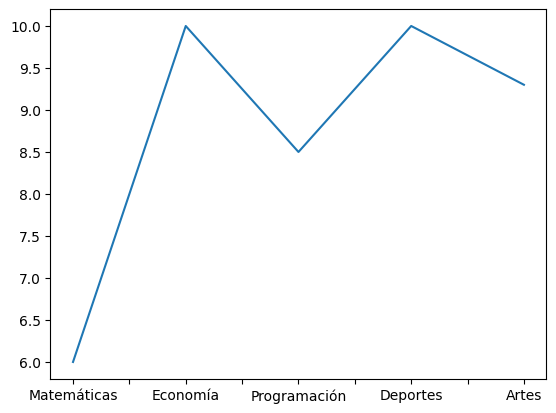

In [215]:
display(serie)
serie.plot()

# <center>**ORDENAR DATAFRAME BASADO EN LOS VALORES DE COLUMNAS**</center>

In [216]:
base = json.sort_values(by=['Lider','Id'], ascending=False)[0:10]
base

Id  Lider Mamíferos                         Reptiles            Peces  \
78  79    101   Ratones                       Camaleones           Atunes   
71  72    101    Ovejas           Dinosaurios (extintos)       Esturiones   
31  32    101    Cabras  Lagartos voladores australianos         Bacalaos   
87  88    100    Ovejas               Lagartijas comunes    Koi japoneses   
8    9    100  Ballenas               Lagartijas comunes  Anguilas de mar   
10  11     99     Orcas               Dragones de Komodo           Carpas   
22  23     97   Ratones               Boas constrictoras         Bacalaos   
18  19     97     Vacas          Pterosaurios (extintos)          Pirañas   
70  71     94    Ovejas               Boas constrictoras    Koi japoneses   
45  46     94  Canguros                       Cocodrilos           Atunes   

                   Anfibios                 Aves  
78         Sapos corredores          Pavorreales  
71                  Proteos           Avestruces  
31        Ranas arborícolas  Pájaros carpinteros  
87      Ranas de Seychelles                Loros  
8                   Proteos              Águilas  
10               Gallipatos             Gaviotas  
22    Lisorofios (extintos)                Loros  
18     Ranas toro africanas              Buitres  
70            Sapos comunes              Tucanes  
45  Sapos de caña venenosos             Faisanes

# <center>**CONVERTIR A MAYUSCULAS, MINUSCULAS O TITULO LOS VALORES DE UNA COLUMNA**</center>

In [217]:
base.Mamíferos.str.upper()

78     RATONES
71      OVEJAS
31      CABRAS
87      OVEJAS
8     BALLENAS
10       ORCAS
22     RATONES
18       VACAS
70      OVEJAS
45    CANGUROS
Name: Mamíferos, dtype: object

In [218]:
base.Mamíferos.str.lower()

78     ratones
71      ovejas
31      cabras
87      ovejas
8     ballenas
10       orcas
22     ratones
18       vacas
70      ovejas
45    canguros
Name: Mamíferos, dtype: object

In [219]:
base.Mamíferos.str.title()

78     Ratones
71      Ovejas
31      Cabras
87      Ovejas
8     Ballenas
10       Orcas
22     Ratones
18       Vacas
70      Ovejas
45    Canguros
Name: Mamíferos, dtype: object

# <center>**VALIDAR SI EXISTEN VALORES EN UNA COLUMNA**</center>
## <center>**SENSIBLE AL CASO**</center>

In [220]:
display(base)

Id  Lider Mamíferos                         Reptiles            Peces  \
78  79    101   Ratones                       Camaleones           Atunes   
71  72    101    Ovejas           Dinosaurios (extintos)       Esturiones   
31  32    101    Cabras  Lagartos voladores australianos         Bacalaos   
87  88    100    Ovejas               Lagartijas comunes    Koi japoneses   
8    9    100  Ballenas               Lagartijas comunes  Anguilas de mar   
10  11     99     Orcas               Dragones de Komodo           Carpas   
22  23     97   Ratones               Boas constrictoras         Bacalaos   
18  19     97     Vacas          Pterosaurios (extintos)          Pirañas   
70  71     94    Ovejas               Boas constrictoras    Koi japoneses   
45  46     94  Canguros                       Cocodrilos           Atunes   

                   Anfibios                 Aves  
78         Sapos corredores          Pavorreales  
71                  Proteos           Avestruces  
31        Ranas arborícolas  Pájaros carpinteros  
87      Ranas de Seychelles                Loros  
8                   Proteos              Águilas  
10               Gallipatos             Gaviotas  
22    Lisorofios (extintos)                Loros  
18     Ranas toro africanas              Buitres  
70            Sapos comunes              Tucanes  
45  Sapos de caña venenosos             Faisanes

In [221]:
base.Mamíferos.isin(['leones','hienas'])

78    False
71    False
31    False
87    False
8     False
10    False
22    False
18    False
70    False
45    False
Name: Mamíferos, dtype: bool

In [222]:
base.Mamíferos.isin(['Leones','Hienas'])

78    False
71    False
31    False
87    False
8     False
10    False
22    False
18    False
70    False
45    False
Name: Mamíferos, dtype: bool

In [223]:
base.Mamíferos.str.upper().isin(['LEONES','HIENAS'])

78    False
71    False
31    False
87    False
8     False
10    False
22    False
18    False
70    False
45    False
Name: Mamíferos, dtype: bool

# <center>OBTENER LA INFORMACION DE LAS **FILAS** DE UN DATAFRAME</center>
## <center> **LIMIT & OFFSET** DE UN DATAFRAME</center>

# <center>PRIMERAS  **n FILAS**</center>

In [226]:
# LIMIT
df1.head(7)

Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
3   4     20     Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101     Leones                   Luciones  Los tiburones ballena   
5   6     46     Perros        Tortugas terrestres               Bacalaos   
6   7     33     Ovejas                    Varanos      Las agujas de río   

                  Anfibios        Aves  
0      Ranas de Seychelles     Cuervos  
1        Ranas arborícolas  Guacamayas  
2        Ranas arborícolas   Colibríes  
3                 Cecilias       Patos  
4           Sapos gigantes     Cuervos  
5          Ranas de Darwin  Guacamayas  
6  Sapos de caña venenosos    Canarios

# <center>TODOS LOS VALORES EXCEPTO LAS PRIMERAS **n FILAS**</center>

In [227]:
# OFFSET
df1.tail(-93)

Id  Lider     Mamíferos                         Reptiles  \
93   94     35  Rinocerontes  Lagartos voladores australianos   
94   95     92        Perros                       Camaleones   
95   96     67       Ratones               Tortugas galápagos   
96   97     98     Capibaras               Tortugas acuáticas   
97   98     11       Gorilas                          Varanos   
98   99     38        Leones               Dragones de Komodo   
99  100     36    Chimpancés               Tortugas galápagos   

                    Peces                Anfibios                 Aves  
93         Peces abisales           Sapos comunes          Pavorreales  
94                 Carpas         Ranas venenosas              Águilas  
95  Los tiburones ballena                 Proteos             Gaviotas  
96        Anguilas de mar        Sapos corredores  Pájaros carpinteros  
97         Peces abisales         Ranas de Darwin                Patos  
98                 Carpas  Salamandras sin pulmón                Pavos  
99           Peces espada   Lisorofios (extintos)             Cigüeñas

# <center>ULTIMAS  **n FILAS**</center>

In [228]:
df1.tail(7)

Id  Lider     Mamíferos                         Reptiles  \
93   94     35  Rinocerontes  Lagartos voladores australianos   
94   95     92        Perros                       Camaleones   
95   96     67       Ratones               Tortugas galápagos   
96   97     98     Capibaras               Tortugas acuáticas   
97   98     11       Gorilas                          Varanos   
98   99     38        Leones               Dragones de Komodo   
99  100     36    Chimpancés               Tortugas galápagos   

                    Peces                Anfibios                 Aves  
93         Peces abisales           Sapos comunes          Pavorreales  
94                 Carpas         Ranas venenosas              Águilas  
95  Los tiburones ballena                 Proteos             Gaviotas  
96        Anguilas de mar        Sapos corredores  Pájaros carpinteros  
97         Peces abisales         Ranas de Darwin                Patos  
98                 Carpas  Salamandras sin pulmón                Pavos  
99           Peces espada   Lisorofios (extintos)             Cigüeñas

# <center>TODOS LOS VALORES EXCEPTO LAS ULTIMAS **n FILAS**</center>

In [229]:
df1.head(-93)

Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
3   4     20     Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101     Leones                   Luciones  Los tiburones ballena   
5   6     46     Perros        Tortugas terrestres               Bacalaos   
6   7     33     Ovejas                    Varanos      Las agujas de río   

                  Anfibios        Aves  
0      Ranas de Seychelles     Cuervos  
1        Ranas arborícolas  Guacamayas  
2        Ranas arborícolas   Colibríes  
3                 Cecilias       Patos  
4           Sapos gigantes     Cuervos  
5          Ranas de Darwin  Guacamayas  
6  Sapos de caña venenosos    Canarios

# <center>MUESTREO ALEATORIO  **n FILAS**</center>

In [230]:
df1.sample(7)

Id  Lider      Mamíferos                   Reptiles  \
29  30     26         Hienas                 Camaleones   
55  56     97        Jirafas         Lagartijas comunes   
95  96     67        Ratones         Tortugas galápagos   
10  11     78  Seres humanos     Mosasaurios (extintos)   
66  67     12       Caballos  Tuátaras de Nueva Zelanda   
87  88     80         Ovejas         Boas constrictoras   
88  89     24        Ratones     Dinosaurios (extintos)   

                    Peces                 Anfibios         Aves  
29              Tiburones    Lisorofios (extintos)     Canarios  
55             Esturiones  Microsaurios (extintos)   Guacamayas  
95  Los tiburones ballena                  Proteos     Gaviotas  
10             Peces luna         Sapos corredores   Guacamayas  
66               Bacalaos      Salamandras comunes     Gaviotas  
87               Bacalaos         Sapos corredores  Pavorreales  
88             Peces luna      Ranas de Seychelles     Gallinas

# <center>OPERACIONES SOBRE TODAS LAS FILAS O COLUMNAS **EJES X y Y**</center>

In [231]:
ejes = pd.DataFrame(df1, columns=['Lider','Id']).head(5)

# <center>EJE X **AXIS=0 - AXIS=ROWS**</center>

In [232]:
display(ejes)
ejes.mean(axis=0)

Lider  Id
0     57   1
1     92   2
2     34   3
3     20   4
4    101   5

Lider    60.8
Id        3.0
dtype: float64

In [233]:
ejes.mean(axis='rows')

Lider    60.8
Id        3.0
dtype: float64

# <center>EJE Y  **AXIS=1 - AXIS=COLUMNS**</center>

In [234]:
display(ejes)
ejes.mean(axis=1)

Lider  Id
0     57   1
1     92   2
2     34   3
3     20   4
4    101   5

0
Loading... (need help?)


In [235]:
ejes.mean(axis='columns')

0
Loading... (need help?)


# <center>**MODIFICAR VALORES DE UN DATAFRAME EN MEMORIA**</center>
## <center>**INPLACE** TRUE vs FALSE, **COPY**</center>

In [236]:
import pandas as pd
inicial = pd.DataFrame({
        "object": ["TV","RADIO","CELL PHONE"], "state": ["OFF","PLAYING","BLOCKED"]
    })
inicial

object    state
0          TV      OFF
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

### <center>**False** valor por defecto</center>

In [237]:
final_inplace_false = inicial.replace({"OFF": "ON"}, inplace=False)
display(inicial,final_inplace_false)

object    state
0          TV      OFF
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

### <center>**True**</center>
### <center>**AL USAR TRUE RETORNA VACIO, ENTONCES NO SE DEBE GUARDAR EN UNA VARIABLE**</center>

In [238]:
final_inplace_true = inicial.replace({"OFF": "ON"}, inplace=True)

print('retorna de la variable ->', final_inplace_true)

display(inicial)
display(final_inplace_true)

retorna de la variable -> None


object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

None

### <center>**APLICAR DIRECTAMENTE SOBRE LA VARIABLE PARA VER LOS CAMBIOS EN AMBAS VARIABLES**</center>

In [239]:
final_inplace_true = inicial
final_inplace_true.replace({"OFF": "ON"}, inplace=True)
display(inicial,final_inplace_true)

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

### <center>**COPY**</center>

In [240]:
inicial_copia = inicial.copy()
inicial_copia

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

In [241]:
inicial_copia.replace({"ON": "WAITING"}, inplace=True)
display(inicial,inicial_copia)

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

object    state
0          TV  WAITING
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

# <center>FILTRAR LA INFORMACION DE UN DATAFRAME</center>

In [242]:
dataframe_to_filter = df1.head(10)
dataframe_to_filter

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2            Ranas arborícolas   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

# <center>**USANDO ETIQUETAS**</center>

## <center>**LOCK**</center>

In [243]:
# selecciona filas
display(dataframe_to_filter.loc[5:10])

Id  Lider     Mamíferos                   Reptiles              Peces  \
5   6     46        Perros        Tortugas terrestres           Bacalaos   
6   7     33        Ovejas                    Varanos  Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8   9     82      Canguros                    Iguanas           Bacalaos   
9  10      4  Rinocerontes                    Iguanas         Peces vela   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

In [244]:
dataframe_to_filter.columns.to_list()

['Id', 'Lider', 'Mamíferos', 'Reptiles', 'Peces', 'Anfibios', 'Aves']

In [245]:
display(dataframe_to_filter.loc[5:10,'Lider':'Peces'])

Lider     Mamíferos                   Reptiles              Peces
5     46        Perros        Tortugas terrestres           Bacalaos
6     33        Ovejas                    Varanos  Las agujas de río
7     25     Elefantes  Tuátaras de Nueva Zelanda       Peces espada
8     82      Canguros                    Iguanas           Bacalaos
9      4  Rinocerontes                    Iguanas         Peces vela

In [246]:
display(dataframe_to_filter.loc[5:10,'Lider'::2])

Lider                   Reptiles                     Anfibios
5     46        Tortugas terrestres              Ranas de Darwin
6     33                    Varanos      Sapos de caña venenosos
7     25  Tuátaras de Nueva Zelanda               Sapos gigantes
8     82                    Iguanas  Salamandras gigantes chinas
9      4                    Iguanas                      Proteos

# <center>**USANDO INDICES**</center>

## <center>**ILOCK**</center>

In [247]:
# selecciona filas y columnas simultaneamente
dataframe_to_filter.iloc[5:10]

Id  Lider     Mamíferos                   Reptiles              Peces  \
5   6     46        Perros        Tortugas terrestres           Bacalaos   
6   7     33        Ovejas                    Varanos  Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8   9     82      Canguros                    Iguanas           Bacalaos   
9  10      4  Rinocerontes                    Iguanas         Peces vela   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

In [248]:
dataframe_to_filter.iloc[5:10,1:5]

Lider     Mamíferos                   Reptiles              Peces
5     46        Perros        Tortugas terrestres           Bacalaos
6     33        Ovejas                    Varanos  Las agujas de río
7     25     Elefantes  Tuátaras de Nueva Zelanda       Peces espada
8     82      Canguros                    Iguanas           Bacalaos
9      4  Rinocerontes                    Iguanas         Peces vela

In [249]:
dataframe_to_filter.iloc[5:10,1::2]

Lider                   Reptiles                     Anfibios
5     46        Tortugas terrestres              Ranas de Darwin
6     33                    Varanos      Sapos de caña venenosos
7     25  Tuátaras de Nueva Zelanda               Sapos gigantes
8     82                    Iguanas  Salamandras gigantes chinas
9      4                    Iguanas                      Proteos

### <center>**AT, IAT, OBTENER VALOR DEL CONTENIDO ESPECIFICO DE UNA FILA-COLUMNA**</center>

In [250]:
dataframe_to_filter.at[2,'Anfibios']

'Ranas arborícolas'

In [251]:
dataframe_to_filter.iat[2,5]

'Ranas arborícolas'

In [252]:
dataframe_to_filter.iat[2,5] = 'RANAS'
dataframe_to_filter

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

### <center>**TAKE OBTENER LAS FILAS O COLUMNAS CON UN INDICE ESPECIFICO**</center>

In [253]:
dataframe_to_filter.take([1,5], axis='rows')

Id  Lider  Mamíferos                 Reptiles                  Peces  \
1   2     92  Capibaras  Pterosaurios (extintos)  Celacantos (extintos)   
5   6     46     Perros      Tortugas terrestres               Bacalaos   

            Anfibios        Aves  
1  Ranas arborícolas  Guacamayas  
5    Ranas de Darwin  Guacamayas

In [254]:
dataframe_to_filter.take([1,5], axis='columns')

Lider                     Anfibios
0     57          Ranas de Seychelles
1     92            Ranas arborícolas
2     34                        RANAS
3     20                     Cecilias
4    101               Sapos gigantes
5     46              Ranas de Darwin
6     33      Sapos de caña venenosos
7     25               Sapos gigantes
8     82  Salamandras gigantes chinas
9      4                      Proteos

In [255]:
dataframe_to_filter.take([-1,-2], axis='columns')

Aves                     Anfibios
0     Cuervos          Ranas de Seychelles
1  Guacamayas            Ranas arborícolas
2   Colibríes                        RANAS
3       Patos                     Cecilias
4     Cuervos               Sapos gigantes
5  Guacamayas              Ranas de Darwin
6    Canarios      Sapos de caña venenosos
7  Guacamayas               Sapos gigantes
8   Pelícanos  Salamandras gigantes chinas
9     Águilas                      Proteos

### <center>**SLICING DATAFRAME**</center>

In [256]:
dataframe_to_filter[5:10]

Id  Lider     Mamíferos                   Reptiles              Peces  \
5   6     46        Perros        Tortugas terrestres           Bacalaos   
6   7     33        Ovejas                    Varanos  Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8   9     82      Canguros                    Iguanas           Bacalaos   
9  10      4  Rinocerontes                    Iguanas         Peces vela   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

### <center>**CLIP REEMPLAZO DE VALORES FUERA DE LOS RANGOS**</center>

In [257]:
dataframe_to_filter[['Id','Lider']].clip(4, 50)

Id  Lider
0   4     50
1   4     50
2   4     34
3   4     20
4   5     50
5   6     46
6   7     33
7   8     25
8   9     50
9  10      4

### <center>**FILTER DATAFRAME**</center>

In [264]:
# el indice contenga, filtra por fila
dataframe_to_filter.filter(like='0', axis=0)

Id  Lider Mamíferos                   Reptiles       Peces  \
0   1     57  Canguros  Tuátaras de Nueva Zelanda  Peces sapo   

              Anfibios     Aves  
0  Ranas de Seychelles  Cuervos

In [265]:
# el nombre de la columna contenga
dataframe_to_filter.filter(like='R', axis=1)

Reptiles
Loading... (need help?)


In [266]:
dataframe_to_filter.filter(like='r', axis=1)

Lider     Mamíferos
0     57      Canguros
1     92     Capibaras
2     34        Perros
3     20        Perros
4    101        Leones
5     46        Perros
6     33        Ovejas
7     25     Elefantes
8     82      Canguros
9      4  Rinocerontes

# <center>**FILTRO CON CONDICIONES EN COLUMNAS**</center>

In [267]:
valores_anfibios = list(dataframe_to_filter["Anfibios"].unique())
valores_id = list(dataframe_to_filter["Id"].unique())
valores_lider = list(dataframe_to_filter["Lider"].unique())

valor_anfibio = random.choice(valores_anfibios)
valor_id = random.choice(valores_id)
valor_lider = random.choice(valores_lider)

valores_referencia = f'Anfibio -> {valor_anfibio}, Id -> {valor_id}, Lider -> {valor_lider}'
print(valores_referencia)

display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] == valor_anfibio] 

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider Mamíferos             Reptiles     Peces         Anfibios  \
5   6     46    Perros  Tortugas terrestres  Bacalaos  Ranas de Darwin   

         Aves  
5  Guacamayas

In [268]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] != valor_anfibio] 

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

# <center>**OPERADOR & Y-AND**</center>

In [269]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter["Anfibios"] == valor_anfibio) & (dataframe_to_filter["Id"] >= valor_id)] 

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider Mamíferos             Reptiles     Peces         Anfibios  \
5   6     46    Perros  Tortugas terrestres  Bacalaos  Ranas de Darwin   

         Aves  
5  Guacamayas

# <center>**OPERADOR | O-OR**</center>

In [270]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter.Anfibios == valor_anfibio) | (dataframe_to_filter.Id  >= valor_id)] 

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider     Mamíferos                   Reptiles                  Peces  \
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

# <center>OPERADOR **~** NEGACION </center>

In [271]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[~(dataframe_to_filter["Anfibios"] != valor_anfibio) & (dataframe_to_filter["Id"] > valor_id)] 

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider Mamíferos             Reptiles     Peces         Anfibios  \
5   6     46    Perros  Tortugas terrestres  Bacalaos  Ranas de Darwin   

         Aves  
5  Guacamayas

# <center>**USANDO FUNCIONES**</center>
## <center>**isin**</center>

In [272]:
values = [valor for valor in range(1,10,2)]
print(values)

estan = dataframe_to_filter.loc[dataframe_to_filter['Id'].isin(values)]
no_estan = dataframe_to_filter.loc[~dataframe_to_filter.Id.isin(values)]
display(estan, no_estan)

[1, 3, 5, 7, 9]


Id  Lider Mamíferos                   Reptiles                  Peces  \
0   1     57  Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
2   3     34    Perros                 Camaleones  Los tiburones ballena   
4   5    101    Leones                   Luciones  Los tiburones ballena   
6   7     33    Ovejas                    Varanos      Las agujas de río   
8   9     82  Canguros                    Iguanas               Bacalaos   

                      Anfibios       Aves  
0          Ranas de Seychelles    Cuervos  
2                        RANAS  Colibríes  
4               Sapos gigantes    Cuervos  
6      Sapos de caña venenosos   Canarios  
8  Salamandras gigantes chinas  Pelícanos

Id  Lider     Mamíferos                   Reptiles                  Peces  \
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

            Anfibios        Aves  
1  Ranas arborícolas  Guacamayas  
3           Cecilias       Patos  
5    Ranas de Darwin  Guacamayas  
7     Sapos gigantes  Guacamayas  
9            Proteos     Águilas

## <center>**str.contains**</center>

In [273]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.contains("Los")]

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider Mamíferos    Reptiles                  Peces        Anfibios  \
2   3     34    Perros  Camaleones  Los tiburones ballena           RANAS   
4   5    101    Leones    Luciones  Los tiburones ballena  Sapos gigantes   

        Aves  
2  Colibríes  
4    Cuervos

In [274]:
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.contains("Los")]

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
3                     Cecilias       Patos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**str.lower().str.contains, str.upper().str.contains**</center>

In [275]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.lower().str.contains("los")]

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider Mamíferos    Reptiles                  Peces        Anfibios  \
2   3     34    Perros  Camaleones  Los tiburones ballena           RANAS   
4   5    101    Leones    Luciones  Los tiburones ballena  Sapos gigantes   

        Aves  
2  Colibríes  
4    Cuervos

In [276]:
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.upper().str.contains("LOS")]

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
3                     Cecilias       Patos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**str.contains.startswith**</center>

In [277]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.startswith("Los")]

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider Mamíferos    Reptiles                  Peces        Anfibios  \
2   3     34    Perros  Camaleones  Los tiburones ballena           RANAS   
4   5    101    Leones    Luciones  Los tiburones ballena  Sapos gigantes   

        Aves  
2  Colibríes  
4    Cuervos

## <center>**str.contains.endswith**</center>

In [278]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.endswith("es")]

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Empty DataFrame
Columns: [Id, Lider, Mamíferos, Reptiles, Peces, Anfibios, Aves]
Index: []

## <center>**str.contains. INSENSIBLE AL CASO**</center>

In [279]:
dataframe_to_filter[dataframe_to_filter.Peces.fillna('').str.contains("ES", case=False)]

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

              Anfibios        Aves  
0  Ranas de Seychelles     Cuervos  
2                RANAS   Colibríes  
3             Cecilias       Patos  
4       Sapos gigantes     Cuervos  
7       Sapos gigantes  Guacamayas  
9              Proteos     Águilas

## <center>**TRANSFORM, APPLY, MAP, APPLYMAP**</center>

In [280]:
diccionario = {
'numeros':['uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','once','doce','trece','catorce','quince','dieciseis','diecisiete','dieciocho','diecinueve','veinte'],
'colores':['amarillo','azul','rojo','verde','morado','amarillo','azul','rojo','verde','morado']*2,
'frutas':['manzana','fresa','banano','coco','banano','manzana','fresa','banano','fresa','coco']*2,
'planeta':['mercurio','venus','tierra','tierra','mercurio','venus','tierra','mercurio','tierra','marte']*2,
'costo':[costo for costo in range(2,22,2)]*2,
'valores':[valor for valor in range(1,21)],

}

validar = pd.DataFrame(diccionario)
validar

numeros   colores   frutas   planeta  costo  valores
0          uno  amarillo  manzana  mercurio      2        1
1          dos      azul    fresa     venus      4        2
2         tres      rojo   banano    tierra      6        3
3       cuatro     verde     coco    tierra      8        4
4        cinco    morado   banano  mercurio     10        5
5         seis  amarillo  manzana     venus     12        6
6        siete      azul    fresa    tierra     14        7
7         ocho      rojo   banano  mercurio     16        8
8        nueve     verde    fresa    tierra     18        9
9         diez    morado     coco     marte     20       10
10        once  amarillo  manzana  mercurio      2       11
11        doce      azul    fresa     venus      4       12
12       trece      rojo   banano    tierra      6       13
13     catorce     verde     coco    tierra      8       14
14      quince    morado   banano  mercurio     10       15
15   dieciseis  amarillo  manzana     venus     12       16
16  diecisiete      azul    fresa    tierra     14       17
17   dieciocho      rojo   banano  mercurio     16       18
18  diecinueve     verde    fresa    tierra     18       19
19      veinte    morado     coco     marte     20       20

### <center>**TRANSFORM**</center>
#### <center>pasa cada columna como una serie a la función personalizada.</center>
### <center>**APLICA A TODA LA SERIE**</center>

In [305]:
# aplica por columna, si se evalua la serie siempre tienen el mismo tamano, entoces convertimos a str para ver cambios
def duplicar(row):
    
    size = len(str(row))
    print(type(row),size, row.values)
    return row*2 if size > 350 or size < 220 else row

validar.transform(duplicar)

<class 'pandas.core.series.Series'> 368 ['uno' 'dos' 'tres' 'cuatro' 'cinco' 'seis' 'siete' 'ocho' 'nueve' 'diez'
 'once' 'doce' 'trece' 'catorce' 'quince' 'dieciseis' 'diecisiete'
 'dieciocho' 'diecinueve' 'veinte']
<class 'pandas.core.series.Series'> 328 ['amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo' 'azul' 'rojo'
 'verde' 'morado' 'amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo'
 'azul' 'rojo' 'verde' 'morado']
<class 'pandas.core.series.Series'> 307 ['manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana' 'fresa' 'banano'
 'fresa' 'coco' 'manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana'
 'fresa' 'banano' 'fresa' 'coco']
<class 'pandas.core.series.Series'> 328 ['mercurio' 'venus' 'tierra' 'tierra' 'mercurio' 'venus' 'tierra'
 'mercurio' 'tierra' 'marte' 'mercurio' 'venus' 'tierra' 'tierra'
 'mercurio' 'venus' 'tierra' 'mercurio' 'tierra' 'marte']
<class 'pandas.core.series.Series'> 205 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]
<class 'pandas.core.serie

numeros   colores   frutas   planeta  costo  valores
0                 unouno  amarillo  manzana  mercurio      4        2
1                 dosdos      azul    fresa     venus      8        4
2               trestres      rojo   banano    tierra     12        6
3           cuatrocuatro     verde     coco    tierra     16        8
4             cincocinco    morado   banano  mercurio     20       10
5               seisseis  amarillo  manzana     venus     24       12
6             sietesiete      azul    fresa    tierra     28       14
7               ochoocho      rojo   banano  mercurio     32       16
8             nuevenueve     verde    fresa    tierra     36       18
9               diezdiez    morado     coco     marte     40       20
10              onceonce  amarillo  manzana  mercurio      4       22
11              docedoce      azul    fresa     venus      8       24
12            trecetrece      rojo   banano    tierra     12       26
13        catorcecatorce     verde     coco    tierra     16       28
14          quincequince    morado   banano  mercurio     20       30
15    dieciseisdieciseis  amarillo  manzana     venus     24       32
16  diecisietediecisiete      azul    fresa    tierra     28       34
17    dieciochodieciocho      rojo   banano  mercurio     32       36
18  diecinuevediecinueve     verde    fresa    tierra     36       38
19          veinteveinte    morado     coco     marte     40       40

### <center>**APLICA A TODA LA COLUMNA**</center>

In [306]:
validar.costo.transform(duplicar)

<class 'pandas.core.series.Series'> 205 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]


costo
Loading... (need help?)


### <center>**APLICA A TODA LA FILA**</center>

In [307]:
validar.loc[0].transform(duplicar)

<class 'pandas.core.series.Series'> 142 ['uno' 'amarillo' 'manzana' 'mercurio' 2 1]


numeros              unouno
colores    amarilloamarillo
frutas       manzanamanzana
planeta    mercuriomercurio
costo                     4
valores                   2
Name: 0, dtype: object

### <center>**GENERAR NUEVAS COLUMNAS**</center>

In [308]:
validar['doble'] = validar.valores.transform(duplicar)
validar

<class 'pandas.core.series.Series'> 207 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


numeros   colores   frutas   planeta  costo  valores  doble
0          uno  amarillo  manzana  mercurio      2        1      2
1          dos      azul    fresa     venus      4        2      4
2         tres      rojo   banano    tierra      6        3      6
3       cuatro     verde     coco    tierra      8        4      8
4        cinco    morado   banano  mercurio     10        5     10
5         seis  amarillo  manzana     venus     12        6     12
6        siete      azul    fresa    tierra     14        7     14
7         ocho      rojo   banano  mercurio     16        8     16
8        nueve     verde    fresa    tierra     18        9     18
9         diez    morado     coco     marte     20       10     20
10        once  amarillo  manzana  mercurio      2       11     22
11        doce      azul    fresa     venus      4       12     24
12       trece      rojo   banano    tierra      6       13     26
13     catorce     verde     coco    tierra      8       14     28
14      quince    morado   banano  mercurio     10       15     30
15   dieciseis  amarillo  manzana     venus     12       16     32
16  diecisiete      azul    fresa    tierra     14       17     34
17   dieciocho      rojo   banano  mercurio     16       18     36
18  diecinueve     verde    fresa    tierra     18       19     38
19      veinte    morado     coco     marte     20       20     40

### <center>**SOPORTA MULTIPLES FUNCIONES A EVALUAR SIMULTANEAMENTE**</center>

In [309]:
validar.transform(['sqrt','exp'])

costo                 valores                   doble              
        sqrt           exp      sqrt           exp      sqrt           exp
0   1.414214  7.389056e+00  1.000000  2.718282e+00  1.414214  7.389056e+00
1   2.000000  5.459815e+01  1.414214  7.389056e+00  2.000000  5.459815e+01
2   2.449490  4.034288e+02  1.732051  2.008554e+01  2.449490  4.034288e+02
3   2.828427  2.980958e+03  2.000000  5.459815e+01  2.828427  2.980958e+03
4   3.162278  2.202647e+04  2.236068  1.484132e+02  3.162278  2.202647e+04
5   3.464102  1.627548e+05  2.449490  4.034288e+02  3.464102  1.627548e+05
6   3.741657  1.202604e+06  2.645751  1.096633e+03  3.741657  1.202604e+06
7   4.000000  8.886111e+06  2.828427  2.980958e+03  4.000000  8.886111e+06
8   4.242641  6.565997e+07  3.000000  8.103084e+03  4.242641  6.565997e+07
9   4.472136  4.851652e+08  3.162278  2.202647e+04  4.472136  4.851652e+08
10  1.414214  7.389056e+00  3.316625  5.987414e+04  4.690416  3.584913e+09
11  2.000000  5.459815e+01  3.464102  1.627548e+05  4.898979  2.648912e+10
12  2.449490  4.034288e+02  3.605551  4.424134e+05  5.099020  1.957296e+11
13  2.828427  2.980958e+03  3.741657  1.202604e+06  5.291503  1.446257e+12
14  3.162278  2.202647e+04  3.872983  3.269017e+06  5.477226  1.068647e+13
15  3.464102  1.627548e+05  4.000000  8.886111e+06  5.656854  7.896296e+13
16  3.741657  1.202604e+06  4.123106  2.415495e+07  5.830952  5.834617e+14
17  4.000000  8.886111e+06  4.242641  6.565997e+07  6.000000  4.311232e+15
18  4.242641  6.565997e+07  4.358899  1.784823e+08  6.164414  3.185593e+16
19  4.472136  4.851652e+08  4.472136  4.851652e+08  6.324555  2.353853e+17

### <center>**solo manipula una sola fila o columna en función del valor del eje y no manipula el dataframe completo.**</center>

In [310]:
validar.transform(lambda row: row.costo + row.valores)

AssertionError: 

In [311]:
validar.transform(lambda row: row.costo + row.valores, axis=1)

ValueError: Function did not transform

### <center>**NO SOPORTA FUNCIONES DE AGREGADO**</center>

In [312]:
validar.transform(lambda x: x.sum())

ValueError: Function did not transform

In [313]:
validar.doble.transform(lambda x: x.sum())

ValueError: Function did not transform

### <center>**APPLY**</center>
#### <center>se usa para aplicar una función a lo largo de un eje de un DataFrame o en valores de Series</center>
#### <center>pasa implícitamente todas las columnas de cada grupo como un DataFrame a la función personalizada.</center>

In [314]:
validar.apply(duplicar)

<class 'pandas.core.series.Series'> 368 ['uno' 'dos' 'tres' 'cuatro' 'cinco' 'seis' 'siete' 'ocho' 'nueve' 'diez'
 'once' 'doce' 'trece' 'catorce' 'quince' 'dieciseis' 'diecisiete'
 'dieciocho' 'diecinueve' 'veinte']
<class 'pandas.core.series.Series'> 328 ['amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo' 'azul' 'rojo'
 'verde' 'morado' 'amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo'
 'azul' 'rojo' 'verde' 'morado']
<class 'pandas.core.series.Series'> 307 ['manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana' 'fresa' 'banano'
 'fresa' 'coco' 'manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana'
 'fresa' 'banano' 'fresa' 'coco']
<class 'pandas.core.series.Series'> 328 ['mercurio' 'venus' 'tierra' 'tierra' 'mercurio' 'venus' 'tierra'
 'mercurio' 'tierra' 'marte' 'mercurio' 'venus' 'tierra' 'tierra'
 'mercurio' 'venus' 'tierra' 'mercurio' 'tierra' 'marte']
<class 'pandas.core.series.Series'> 205 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]
<class 'pandas.core.serie

numeros   colores   frutas   planeta  costo  valores  doble
0                 unouno  amarillo  manzana  mercurio      4        2      4
1                 dosdos      azul    fresa     venus      8        4      8
2               trestres      rojo   banano    tierra     12        6     12
3           cuatrocuatro     verde     coco    tierra     16        8     16
4             cincocinco    morado   banano  mercurio     20       10     20
5               seisseis  amarillo  manzana     venus     24       12     24
6             sietesiete      azul    fresa    tierra     28       14     28
7               ochoocho      rojo   banano  mercurio     32       16     32
8             nuevenueve     verde    fresa    tierra     36       18     36
9               diezdiez    morado     coco     marte     40       20     40
10              onceonce  amarillo  manzana  mercurio      4       22     44
11              docedoce      azul    fresa     venus      8       24     48
12            trecetrece      rojo   banano    tierra     12       26     52
13        catorcecatorce     verde     coco    tierra     16       28     56
14          quincequince    morado   banano  mercurio     20       30     60
15    dieciseisdieciseis  amarillo  manzana     venus     24       32     64
16  diecisietediecisiete      azul    fresa    tierra     28       34     68
17    dieciochodieciocho      rojo   banano  mercurio     32       36     72
18  diecinuevediecinueve     verde    fresa    tierra     36       38     76
19          veinteveinte    morado     coco     marte     40       40     80

### <center>**SOPORTA FUNCIONES DE AGREGADO**</center>

In [315]:
validar.apply(lambda x:x.sum())

numeros    unodostrescuatrocincoseissieteochonuevediezonc...
colores    amarilloazulrojoverdemoradoamarilloazulrojover...
frutas     manzanafresabananococobananomanzanafresabanano...
planeta    mercuriovenustierratierramercuriovenustierrame...
costo                                                    220
valores                                                  210
doble                                                    420
dtype: object

In [316]:
validar.apply(lambda x:x.max())

numeros     veinte
colores      verde
frutas     manzana
planeta      venus
costo           20
valores         20
doble           40
dtype: object

### <center>**USANDO LAS COLUMNAS DE UN DATAFRAME**</center>
# sino se declara el eje columnas o el eje y recorre la serie por columnas, entonces no se puede acceder a los nombres de las columnas

In [317]:
limite = 10
dff = df1.head(limite)

def funcion_concatenar(row):
    mamiferos = row.Mamíferos
    reptiles  = row.Reptiles
    
    return mamiferos + ' y ' + reptiles

dff.apply(funcion_concatenar)

AttributeError: 'Series' object has no attribute 'Mamíferos'

In [318]:
dff.apply(funcion_concatenar, axis=1)

0
Loading... (need help?)


### <center>**ADICIONANDO LAS COLUMNAS DE UN DATAFRAME**</center>


In [319]:
dff['suma_columnas'] = dff.apply(lambda row: row[0]+row[1], axis='columns')
display(dff)

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  suma_columnas  
0          Ranas de Seychelles     Cuervos             58  
1            Ranas arborícolas  Guacamayas             94  
2                        RANAS   Colibríes             37  
3                     Cecilias       Patos             24  
4               Sapos gigantes     Cuervos            106  
5              Ranas de Darwin  Guacamayas             52  
6      Sapos de caña venenosos    Canarios             40  
7               Sapos gigantes  Guacamayas             33  
8  Salamandras gigantes chinas   Pelícanos             91  
9                      Proteos     Águilas             14

In [320]:
dff['suma_columnas_multiplicadas'] = dff.apply(lambda row: row[0]*5 + row[1]*2, axis=1)
dff

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  suma_columnas  \
0          Ranas de Seychelles     Cuervos             58   
1            Ranas arborícolas  Guacamayas             94   
2                        RANAS   Colibríes             37   
3                     Cecilias       Patos             24   
4               Sapos gigantes     Cuervos            106   
5              Ranas de Darwin  Guacamayas             52   
6      Sapos de caña venenosos    Canarios             40   
7               Sapos gigantes  Guacamayas             33   
8  Salamandras gigantes chinas   Pelícanos             91   
9                      Proteos     Águilas             14   

   suma_columnas_multiplicadas  
0                          119  
1                          194  
2                           83  
3                           60  
4                          227  
5                          122  
6                          101  
7                           90  
8                          209  
9                           58

### <center>**USANDO LAS FILAS DE UN DATAFRAME**</center>

In [321]:
dff = df1.head(10)


dff.Id = dff.Id.apply(lambda x: 'Es Menor a 5' if x < 5 else x)
dff

Id  Lider     Mamíferos                   Reptiles  \
0  Es Menor a 5     57      Canguros  Tuátaras de Nueva Zelanda   
1  Es Menor a 5     92     Capibaras    Pterosaurios (extintos)   
2  Es Menor a 5     34        Perros                 Camaleones   
3  Es Menor a 5     20        Perros     Mosasaurios (extintos)   
4             5    101        Leones                   Luciones   
5             6     46        Perros        Tortugas terrestres   
6             7     33        Ovejas                    Varanos   
7             8     25     Elefantes  Tuátaras de Nueva Zelanda   
8             9     82      Canguros                    Iguanas   
9            10      4  Rinocerontes                    Iguanas   

                   Peces                     Anfibios        Aves  
0             Peces sapo          Ranas de Seychelles     Cuervos  
1  Celacantos (extintos)            Ranas arborícolas  Guacamayas  
2  Los tiburones ballena                        RANAS   Colibríes  
3           Peces payaso                     Cecilias       Patos  
4  Los tiburones ballena               Sapos gigantes     Cuervos  
5               Bacalaos              Ranas de Darwin  Guacamayas  
6      Las agujas de río      Sapos de caña venenosos    Canarios  
7           Peces espada               Sapos gigantes  Guacamayas  
8               Bacalaos  Salamandras gigantes chinas   Pelícanos  
9             Peces vela                      Proteos     Águilas

In [322]:
dff = df1.head(10)

def es_par(valor):
    
    if valor %2 == 0:
        return 'Es Par'
    return valor

dff.Id = dff.Id.apply(es_par)
dff

Id  Lider     Mamíferos                   Reptiles  \
0       1     57      Canguros  Tuátaras de Nueva Zelanda   
1  Es Par     92     Capibaras    Pterosaurios (extintos)   
2       3     34        Perros                 Camaleones   
3  Es Par     20        Perros     Mosasaurios (extintos)   
4       5    101        Leones                   Luciones   
5  Es Par     46        Perros        Tortugas terrestres   
6       7     33        Ovejas                    Varanos   
7  Es Par     25     Elefantes  Tuátaras de Nueva Zelanda   
8       9     82      Canguros                    Iguanas   
9  Es Par      4  Rinocerontes                    Iguanas   

                   Peces                     Anfibios        Aves  
0             Peces sapo          Ranas de Seychelles     Cuervos  
1  Celacantos (extintos)            Ranas arborícolas  Guacamayas  
2  Los tiburones ballena                        RANAS   Colibríes  
3           Peces payaso                     Cecilias       Patos  
4  Los tiburones ballena               Sapos gigantes     Cuervos  
5               Bacalaos              Ranas de Darwin  Guacamayas  
6      Las agujas de río      Sapos de caña venenosos    Canarios  
7           Peces espada               Sapos gigantes  Guacamayas  
8               Bacalaos  Salamandras gigantes chinas   Pelícanos  
9             Peces vela                      Proteos     Águilas

### <center>**APLICAR SOBRE TODAS LAS COLUMNAS QUE TIENEN EL MISMO TIPO DE DATO**</center>

In [323]:
dff.apply(lambda x: 'Es Menor a 5' if x < 5 else x)

TypeError: '<' not supported between instances of 'str' and 'int'

In [324]:
dff.apply(lambda x: 'Es Menor a 5' if type(x) else x!=int)

Id           Es Menor a 5
Lider        Es Menor a 5
Mamíferos    Es Menor a 5
Reptiles     Es Menor a 5
Peces        Es Menor a 5
Anfibios     Es Menor a 5
Aves         Es Menor a 5
dtype: object

### <center>**GENERAR MULTIPLES COLUMNAS EN UN DATAFRAME**</center>

In [325]:
%%time
# generar fechas aleatorias entre 2 fechas
dff['Fechas'] = pd.date_range(start='1/1/2000 00:00:00', end='1/1/2023 00:00:00', periods=limite)

def fecha(fecha):
    return pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second])

dff[["year", "month", "day", 'hour', 'minute', 'second']] = dff.Fechas.apply(fecha)

dff

CPU times: total: 15.6 ms
Wall time: 10.4 ms


Id  Lider     Mamíferos                   Reptiles  \
0       1     57      Canguros  Tuátaras de Nueva Zelanda   
1  Es Par     92     Capibaras    Pterosaurios (extintos)   
2       3     34        Perros                 Camaleones   
3  Es Par     20        Perros     Mosasaurios (extintos)   
4       5    101        Leones                   Luciones   
5  Es Par     46        Perros        Tortugas terrestres   
6       7     33        Ovejas                    Varanos   
7  Es Par     25     Elefantes  Tuátaras de Nueva Zelanda   
8       9     82      Canguros                    Iguanas   
9  Es Par      4  Rinocerontes                    Iguanas   

                   Peces                     Anfibios        Aves  \
0             Peces sapo          Ranas de Seychelles     Cuervos   
1  Celacantos (extintos)            Ranas arborícolas  Guacamayas   
2  Los tiburones ballena                        RANAS   Colibríes   
3           Peces payaso                     Cecilias       Patos   
4  Los tiburones ballena               Sapos gigantes     Cuervos   
5               Bacalaos              Ranas de Darwin  Guacamayas   
6      Las agujas de río      Sapos de caña venenosos    Canarios   
7           Peces espada               Sapos gigantes  Guacamayas   
8               Bacalaos  Salamandras gigantes chinas   Pelícanos   
9             Peces vela                      Proteos     Águilas   

               Fechas  year  month  day  hour  minute  second  
0 2000-01-01 00:00:00  2000      1    1     0       0       0  
1 2002-07-22 10:40:00  2002      7   22    10      40       0  
2 2005-02-09 21:20:00  2005      2    9    21      20       0  
3 2007-09-01 08:00:00  2007      9    1     8       0       0  
4 2010-03-22 18:40:00  2010      3   22    18      40       0  
5 2012-10-11 05:20:00  2012     10   11     5      20       0  
6 2015-05-02 16:00:00  2015      5    2    16       0       0  
7 2017-11-21 02:40:00  2017     11   21     2      40       0  
8 2020-06-11 13:20:00  2020      6   11    13      20       0  
9 2023-01-01 00:00:00  2023      1    1     0       0       0

In [326]:
dff["y"], dff["m"], dff["d"], dff["h"], dff["d"], dff["s"] = dff.Fechas.apply(lambda fecha: pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second]))

dff

Id  Lider     Mamíferos                   Reptiles  \
0       1     57      Canguros  Tuátaras de Nueva Zelanda   
1  Es Par     92     Capibaras    Pterosaurios (extintos)   
2       3     34        Perros                 Camaleones   
3  Es Par     20        Perros     Mosasaurios (extintos)   
4       5    101        Leones                   Luciones   
5  Es Par     46        Perros        Tortugas terrestres   
6       7     33        Ovejas                    Varanos   
7  Es Par     25     Elefantes  Tuátaras de Nueva Zelanda   
8       9     82      Canguros                    Iguanas   
9  Es Par      4  Rinocerontes                    Iguanas   

                   Peces                     Anfibios        Aves  \
0             Peces sapo          Ranas de Seychelles     Cuervos   
1  Celacantos (extintos)            Ranas arborícolas  Guacamayas   
2  Los tiburones ballena                        RANAS   Colibríes   
3           Peces payaso                     Cecilias       Patos   
4  Los tiburones ballena               Sapos gigantes     Cuervos   
5               Bacalaos              Ranas de Darwin  Guacamayas   
6      Las agujas de río      Sapos de caña venenosos    Canarios   
7           Peces espada               Sapos gigantes  Guacamayas   
8               Bacalaos  Salamandras gigantes chinas   Pelícanos   
9             Peces vela                      Proteos     Águilas   

               Fechas  year  month  day  hour  minute  second  y  m  d  h  s  
0 2000-01-01 00:00:00  2000      1    1     0       0       0  0  1  4  3  5  
1 2002-07-22 10:40:00  2002      7   22    10      40       0  0  1  4  3  5  
2 2005-02-09 21:20:00  2005      2    9    21      20       0  0  1  4  3  5  
3 2007-09-01 08:00:00  2007      9    1     8       0       0  0  1  4  3  5  
4 2010-03-22 18:40:00  2010      3   22    18      40       0  0  1  4  3  5  
5 2012-10-11 05:20:00  2012     10   11     5      20       0  0  1  4  3  5  
6 2015-05-02 16:00:00  2015      5    2    16       0       0  0  1  4  3  5  
7 2017-11-21 02:40:00  2017     11   21     2      40       0  0  1  4  3  5  
8 2020-06-11 13:20:00  2020      6   11    13      20       0  0  1  4  3  5  
9 2023-01-01 00:00:00  2023      1    1     0       0       0  0  1  4  3  5

### <center>**UNIENDO VALORES DE MULTIPLES COLUMNAS DE UN DATAFRAME**</center>

In [327]:
dff['apply'] = dff.apply(lambda row: row.year + row.Lider)

AttributeError: 'Series' object has no attribute 'year'

### <center>**DEFINIENDO EL EJE DE UNION EN UN DATAFRAME**</center>

In [328]:
dff['apply'] = dff.apply(lambda row: row.year + row.Lider, axis='columns')
dff

Id  Lider     Mamíferos                   Reptiles  \
0       1     57      Canguros  Tuátaras de Nueva Zelanda   
1  Es Par     92     Capibaras    Pterosaurios (extintos)   
2       3     34        Perros                 Camaleones   
3  Es Par     20        Perros     Mosasaurios (extintos)   
4       5    101        Leones                   Luciones   
5  Es Par     46        Perros        Tortugas terrestres   
6       7     33        Ovejas                    Varanos   
7  Es Par     25     Elefantes  Tuátaras de Nueva Zelanda   
8       9     82      Canguros                    Iguanas   
9  Es Par      4  Rinocerontes                    Iguanas   

                   Peces                     Anfibios        Aves  \
0             Peces sapo          Ranas de Seychelles     Cuervos   
1  Celacantos (extintos)            Ranas arborícolas  Guacamayas   
2  Los tiburones ballena                        RANAS   Colibríes   
3           Peces payaso                     Cecilias       Patos   
4  Los tiburones ballena               Sapos gigantes     Cuervos   
5               Bacalaos              Ranas de Darwin  Guacamayas   
6      Las agujas de río      Sapos de caña venenosos    Canarios   
7           Peces espada               Sapos gigantes  Guacamayas   
8               Bacalaos  Salamandras gigantes chinas   Pelícanos   
9             Peces vela                      Proteos     Águilas   

               Fechas  year  month  day  hour  minute  second  y  m  d  h  s  \
0 2000-01-01 00:00:00  2000      1    1     0       0       0  0  1  4  3  5   
1 2002-07-22 10:40:00  2002      7   22    10      40       0  0  1  4  3  5   
2 2005-02-09 21:20:00  2005      2    9    21      20       0  0  1  4  3  5   
3 2007-09-01 08:00:00  2007      9    1     8       0       0  0  1  4  3  5   
4 2010-03-22 18:40:00  2010      3   22    18      40       0  0  1  4  3  5   
5 2012-10-11 05:20:00  2012     10   11     5      20       0  0  1  4  3  5   
6 2015-05-02 16:00:00  2015      5    2    16       0       0  0  1  4  3  5   
7 2017-11-21 02:40:00  2017     11   21     2      40       0  0  1  4  3  5   
8 2020-06-11 13:20:00  2020      6   11    13      20       0  0  1  4  3  5   
9 2023-01-01 00:00:00  2023      1    1     0       0       0  0  1  4  3  5   

   apply  
0   2057  
1   2094  
2   2039  
3   2027  
4   2111  
5   2058  
6   2048  
7   2042  
8   2102  
9   2027

### <center>**MAP**</center>
#### <center>usado para substituir el valor en una serie con otro valor</center>

In [329]:
# usando la serie de una fila
validar.loc[0].map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

numeros         uno
colores    AMARILLO
frutas      manzana
planeta    MERCURIO
costo             2
valores           1
doble             2
Name: 0, dtype: object

In [330]:
# usando la serie de una columna
validar.planeta.map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

planeta
Loading... (need help?)


### <center>**APPLYMAP**</center>
#### <center>se usa para aplicar una función a cada elemento del DataFrame</center>

In [331]:
def duplicar(row):
    
    size = len(str(row))
    print(type(row),size, row)
    return row*2 if size > 4 else row

validar.applymap(duplicar)

<class 'str'> 3 uno
<class 'str'> 3 dos
<class 'str'> 4 tres
<class 'str'> 6 cuatro
<class 'str'> 5 cinco
<class 'str'> 4 seis
<class 'str'> 5 siete
<class 'str'> 4 ocho
<class 'str'> 5 nueve
<class 'str'> 4 diez
<class 'str'> 4 once
<class 'str'> 4 doce
<class 'str'> 5 trece
<class 'str'> 7 catorce
<class 'str'> 6 quince
<class 'str'> 9 dieciseis
<class 'str'> 10 diecisiete
<class 'str'> 9 dieciocho
<class 'str'> 10 diecinueve
<class 'str'> 6 veinte
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 7 manzana
<class 'str'> 5 fresa
<class 'str'> 6 banano
<class 'str'> 4 coco
<class 

numeros           colores          frutas           planeta  \
0                    uno  amarilloamarillo  manzanamanzana  mercuriomercurio   
1                    dos              azul      fresafresa        venusvenus   
2                   tres              rojo    bananobanano      tierratierra   
3           cuatrocuatro        verdeverde            coco      tierratierra   
4             cincocinco      moradomorado    bananobanano  mercuriomercurio   
5                   seis  amarilloamarillo  manzanamanzana        venusvenus   
6             sietesiete              azul      fresafresa      tierratierra   
7                   ocho              rojo    bananobanano  mercuriomercurio   
8             nuevenueve        verdeverde      fresafresa      tierratierra   
9                   diez      moradomorado            coco        martemarte   
10                  once  amarilloamarillo  manzanamanzana  mercuriomercurio   
11                  doce              azul      fresafresa        venusvenus   
12            trecetrece              rojo    bananobanano      tierratierra   
13        catorcecatorce        verdeverde            coco      tierratierra   
14          quincequince      moradomorado    bananobanano  mercuriomercurio   
15    dieciseisdieciseis  amarilloamarillo  manzanamanzana        venusvenus   
16  diecisietediecisiete              azul      fresafresa      tierratierra   
17    dieciochodieciocho              rojo    bananobanano  mercuriomercurio   
18  diecinuevediecinueve        verdeverde      fresafresa      tierratierra   
19          veinteveinte      moradomorado            coco        martemarte   

    costo  valores  doble  
0       2        1      2  
1       4        2      4  
2       6        3      6  
3       8        4      8  
4      10        5     10  
5      12        6     12  
6      14        7     14  
7      16        8     16  
8      18        9     18  
9      20       10     20  
10      2       11     22  
11      4       12     24  
12      6       13     26  
13      8       14     28  
14     10       15     30  
15     12       16     32  
16     14       17     34  
17     16       18     36  
18     18       19     38  
19     20       20     40

## <center>**WHERE**</center>

In [332]:
#https://sparkbyexamples.com/pandas/pandas-dataframe-where-examples/
#https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/
#https://sparkbyexamples.com/pandas/pandas-dataframe-query-examples/


filtro_1 = dataframe_to_filter.Id > 5
filtro_2 = dataframe_to_filter.Lider > 33
filtro_3 = dataframe_to_filter.Id * 2 < dataframe_to_filter.Lider

In [333]:
print(type(filtro_1))
print(filtro_1)
dataframe_to_filter.where(filtro_1)

<class 'pandas.core.series.Series'>
0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: Id, dtype: bool


Id  Lider     Mamíferos                   Reptiles              Peces  \
0   NaN    NaN           NaN                        NaN                NaN   
1   NaN    NaN           NaN                        NaN                NaN   
2   NaN    NaN           NaN                        NaN                NaN   
3   NaN    NaN           NaN                        NaN                NaN   
4   NaN    NaN           NaN                        NaN                NaN   
5   6.0   46.0        Perros        Tortugas terrestres           Bacalaos   
6   7.0   33.0        Ovejas                    Varanos  Las agujas de río   
7   8.0   25.0     Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8   9.0   82.0      Canguros                    Iguanas           Bacalaos   
9  10.0    4.0  Rinocerontes                    Iguanas         Peces vela   

                      Anfibios        Aves  
0                          NaN         NaN  
1                          NaN         NaN  
2                          NaN         NaN  
3                          NaN         NaN  
4                          NaN         NaN  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

### <center>**DROP NA**</center>

In [334]:
print(filtro_1)
dataframe_to_filter.where(filtro_1)

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: Id, dtype: bool


Id  Lider     Mamíferos                   Reptiles              Peces  \
0   NaN    NaN           NaN                        NaN                NaN   
1   NaN    NaN           NaN                        NaN                NaN   
2   NaN    NaN           NaN                        NaN                NaN   
3   NaN    NaN           NaN                        NaN                NaN   
4   NaN    NaN           NaN                        NaN                NaN   
5   6.0   46.0        Perros        Tortugas terrestres           Bacalaos   
6   7.0   33.0        Ovejas                    Varanos  Las agujas de río   
7   8.0   25.0     Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8   9.0   82.0      Canguros                    Iguanas           Bacalaos   
9  10.0    4.0  Rinocerontes                    Iguanas         Peces vela   

                      Anfibios        Aves  
0                          NaN         NaN  
1                          NaN         NaN  
2                          NaN         NaN  
3                          NaN         NaN  
4                          NaN         NaN  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

In [335]:
print(filtro_1)
dataframe_to_filter.where(filtro_1).dropna()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: Id, dtype: bool


Id  Lider     Mamíferos                   Reptiles              Peces  \
5   6.0   46.0        Perros        Tortugas terrestres           Bacalaos   
6   7.0   33.0        Ovejas                    Varanos  Las agujas de río   
7   8.0   25.0     Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8   9.0   82.0      Canguros                    Iguanas           Bacalaos   
9  10.0    4.0  Rinocerontes                    Iguanas         Peces vela   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**AND, &**</center>

In [336]:
print(filtro_1)
print(filtro_3)

dataframe_to_filter.where(filtro_1 & filtro_3).dropna()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: Id, dtype: bool
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
dtype: bool


Id  Lider  Mamíferos                   Reptiles              Peces  \
5  6.0   46.0     Perros        Tortugas terrestres           Bacalaos   
6  7.0   33.0     Ovejas                    Varanos  Las agujas de río   
7  8.0   25.0  Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8  9.0   82.0   Canguros                    Iguanas           Bacalaos   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos

## <center>**OR,  |**</center>

In [337]:
print(filtro_1)
print(filtro_2)
dataframe_to_filter.where(filtro_1 | filtro_2).dropna()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: Id, dtype: bool
0     True
1     True
2     True
3    False
4     True
5     True
6    False
7    False
8     True
9    False
Name: Lider, dtype: bool


Id  Lider     Mamíferos                   Reptiles  \
0   1.0   57.0      Canguros  Tuátaras de Nueva Zelanda   
1   2.0   92.0     Capibaras    Pterosaurios (extintos)   
2   3.0   34.0        Perros                 Camaleones   
4   5.0  101.0        Leones                   Luciones   
5   6.0   46.0        Perros        Tortugas terrestres   
6   7.0   33.0        Ovejas                    Varanos   
7   8.0   25.0     Elefantes  Tuátaras de Nueva Zelanda   
8   9.0   82.0      Canguros                    Iguanas   
9  10.0    4.0  Rinocerontes                    Iguanas   

                   Peces                     Anfibios        Aves  
0             Peces sapo          Ranas de Seychelles     Cuervos  
1  Celacantos (extintos)            Ranas arborícolas  Guacamayas  
2  Los tiburones ballena                        RANAS   Colibríes  
4  Los tiburones ballena               Sapos gigantes     Cuervos  
5               Bacalaos              Ranas de Darwin  Guacamayas  
6      Las agujas de río      Sapos de caña venenosos    Canarios  
7           Peces espada               Sapos gigantes  Guacamayas  
8               Bacalaos  Salamandras gigantes chinas   Pelícanos  
9             Peces vela                      Proteos     Águilas

## <center>**UPDATE** AL VALOR QUE NO CUMPLA LA CONDICION</center>

### <center>**ACTUALIZA SOLO LOS VALORES DONDE COINCIDA, COMPARA CADA FILA EN TODO EL DATAFRAME**</center>

In [338]:
# filtra todos los valores dentro del dataframe
filtro_4 = dataframe_to_filter != 'Vacas'
print(filtro_4)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_4,'ACTUALIZADO')

     Id  Lider  Mamíferos  Reptiles  Peces  Anfibios  Aves
0  True   True       True      True   True      True  True
1  True   True       True      True   True      True  True
2  True   True       True      True   True      True  True
3  True   True       True      True   True      True  True
4  True   True       True      True   True      True  True
5  True   True       True      True   True      True  True
6  True   True       True      True   True      True  True
7  True   True       True      True   True      True  True
8  True   True       True      True   True      True  True
9  True   True       True      True   True      True  True


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

### <center>**ACTUALIZA TODOS LOS VALORES DE LA FILA DONDE COINCIDA AL MENOS UN VALOR EN UNA FILA**</center>

In [339]:
filtro_5 = dataframe_to_filter.Lider != 6
print(filtro_5)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_5,'ACTUALIZADO')

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Lider, dtype: bool


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**QUERY**</center>

In [340]:
filtro_1 = 'Id > 5'
filtro_2 = 'Lider > 33'
filtro_3 = 'Id * 5 < Lider'

## <center>**PASANDO VALORES**</center>

## <center>**IGUAL A ==**</center>

In [341]:
print(valores_referencia)
value = valor_anfibio

dataframe_to_filter.query("Anfibios == @value")

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Id  Lider Mamíferos             Reptiles     Peces         Anfibios  \
5   6     46    Perros  Tortugas terrestres  Bacalaos  Ranas de Darwin   

         Aves  
5  Guacamayas

## <center>**DIFERENTE DE !=**</center>

In [342]:
print(valores_referencia)
dataframe_to_filter.query("Anfibios != @value")

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**QUE CONTENGA LOS VALORES DE LA LISTA, IN**</center>

In [343]:
print(valores_referencia)
lista= ['Ranas arcoíris','Ajolotes','Salamandras comunes']
dataframe_to_filter.query("Anfibios in @lista")

Anfibio -> Ranas de Darwin, Id -> 2, Lider -> 33


Empty DataFrame
Columns: [Id, Lider, Mamíferos, Reptiles, Peces, Anfibios, Aves]
Index: []

## <center>**QUE NO CONTENGA LOS VALORES DE LA LISTA, NOT IN**</center>

In [344]:
dataframe_to_filter.query("Anfibios not in @lista")

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**OPERADORES LOGICOS CLASICOS**</center>

In [345]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
display(dataframe_to_filter.query(filtro_1))
display(dataframe_to_filter.query(filtro_2))

Id > 5
Lider > 33
Id * 5 < Lider


Id  Lider     Mamíferos                   Reptiles              Peces  \
5   6     46        Perros        Tortugas terrestres           Bacalaos   
6   7     33        Ovejas                    Varanos  Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda       Peces espada   
8   9     82      Canguros                    Iguanas           Bacalaos   
9  10      4  Rinocerontes                    Iguanas         Peces vela   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
4   5    101     Leones                   Luciones  Los tiburones ballena   
5   6     46     Perros        Tortugas terrestres               Bacalaos   
8   9     82   Canguros                    Iguanas               Bacalaos   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos

## <center>**AND**</center>

In [346]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_2}')

Id > 5
Lider > 33
Id * 5 < Lider


Id  Lider Mamíferos             Reptiles     Peces  \
5   6     46    Perros  Tortugas terrestres  Bacalaos   
8   9     82  Canguros              Iguanas  Bacalaos   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos

In [347]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_2} and {filtro_3}')

Id > 5
Lider > 33
Id * 5 < Lider


Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
4   5    101     Leones                   Luciones  Los tiburones ballena   
5   6     46     Perros        Tortugas terrestres               Bacalaos   
8   9     82   Canguros                    Iguanas               Bacalaos   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos

In [348]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_3}')

Id > 5
Lider > 33
Id * 5 < Lider


Id  Lider Mamíferos             Reptiles     Peces  \
5   6     46    Perros  Tortugas terrestres  Bacalaos   
8   9     82  Canguros              Iguanas  Bacalaos   

                      Anfibios        Aves  
5              Ranas de Darwin  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos

## <center>**OR**</center>

In [349]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_2}')

Id > 5
Lider > 33
Id * 5 < Lider


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

In [350]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_3}')

Id > 5
Lider > 33
Id * 5 < Lider


Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

# <center>**UNIR O CONCATENAR DATAFRAMES**</center>

# <center>**OUTER**</center>

In [351]:
pd.concat([json[0:3], csv[0:5]], axis=1, join="outer")

Id  Lider   Mamíferos                         Reptiles          Peces  \
0  1.0   42.0       Vacas  Lagartos voladores australianos  Koi japoneses   
1  2.0   32.0  Chimpancés                       Camaleones         Atunes   
2  3.0   41.0      Leones                       Cocodrilos         Carpas   
3  NaN    NaN         NaN                              NaN            NaN   
4  NaN    NaN         NaN                              NaN            NaN   

              Anfibios        Aves  Id  Lider              Vertebrados  \
0             Cecilias  Guacamayas   1     96  Sapos de caña venenosos   
1           Gallipatos       Loros   2     67                  Jirafas   
2  Ranas de Seychelles     Buitres   3      5                  Tucanes   
3                  NaN         NaN   4     79           Sapos gigantes   
4                  NaN         NaN   5     68       Dragones de Komodo   

          Invertebrados Ovíparos Frugívoros          Rumiantes  
0      Moscas cernícalo  Hornero     Bonobo   Ciervo de copete  
1              Hormigas    Ganso      Tapir  Bisonte estepario  
2         Avispa scolia  Gallina     Perico             Vicuña  
3  Mariposa saltacercas   Paloma      Lémur          Sitatunga  
4              Pulgones   Salmón      Tucán          Sitatunga

In [352]:
pd.concat([json[0:3], csv[0:5]], axis=0, join="outer")

Id  Lider   Mamíferos                         Reptiles          Peces  \
0   1     42       Vacas  Lagartos voladores australianos  Koi japoneses   
1   2     32  Chimpancés                       Camaleones         Atunes   
2   3     41      Leones                       Cocodrilos         Carpas   
0   1     96         NaN                              NaN            NaN   
1   2     67         NaN                              NaN            NaN   
2   3      5         NaN                              NaN            NaN   
3   4     79         NaN                              NaN            NaN   
4   5     68         NaN                              NaN            NaN   

              Anfibios        Aves              Vertebrados  \
0             Cecilias  Guacamayas                      NaN   
1           Gallipatos       Loros                      NaN   
2  Ranas de Seychelles     Buitres                      NaN   
0                  NaN         NaN  Sapos de caña venenosos   
1                  NaN         NaN                  Jirafas   
2                  NaN         NaN                  Tucanes   
3                  NaN         NaN           Sapos gigantes   
4                  NaN         NaN       Dragones de Komodo   

          Invertebrados Ovíparos Frugívoros          Rumiantes  
0                   NaN      NaN        NaN                NaN  
1                   NaN      NaN        NaN                NaN  
2                   NaN      NaN        NaN                NaN  
0      Moscas cernícalo  Hornero     Bonobo   Ciervo de copete  
1              Hormigas    Ganso      Tapir  Bisonte estepario  
2         Avispa scolia  Gallina     Perico             Vicuña  
3  Mariposa saltacercas   Paloma      Lémur          Sitatunga  
4              Pulgones   Salmón      Tucán          Sitatunga

# <center>**INNER**</center>

In [353]:
pd.concat([json[0:3], csv[0:5]], axis=1, join="inner")

Id  Lider   Mamíferos                         Reptiles          Peces  \
0   1     42       Vacas  Lagartos voladores australianos  Koi japoneses   
1   2     32  Chimpancés                       Camaleones         Atunes   
2   3     41      Leones                       Cocodrilos         Carpas   

              Anfibios        Aves  Id  Lider              Vertebrados  \
0             Cecilias  Guacamayas   1     96  Sapos de caña venenosos   
1           Gallipatos       Loros   2     67                  Jirafas   
2  Ranas de Seychelles     Buitres   3      5                  Tucanes   

      Invertebrados Ovíparos Frugívoros          Rumiantes  
0  Moscas cernícalo  Hornero     Bonobo   Ciervo de copete  
1          Hormigas    Ganso      Tapir  Bisonte estepario  
2     Avispa scolia  Gallina     Perico             Vicuña

In [354]:
pd.concat([json[0:3], csv[0:5]], axis=0, join="inner")

Id  Lider
0   1     42
1   2     32
2   3     41
0   1     96
1   2     67
2   3      5
3   4     79
4   5     68

# <center>**COMPARACION POR DATAFRAMES**</center>

In [355]:
pd.concat([json[0:3], csv[0:3], excel[0:3]])

Id  Lider     Mamíferos                         Reptiles          Peces  \
0   1     42         Vacas  Lagartos voladores australianos  Koi japoneses   
1   2     32    Chimpancés                       Camaleones         Atunes   
2   3     41        Leones                       Cocodrilos         Carpas   
0   1     96           NaN                              NaN            NaN   
1   2     67           NaN                              NaN            NaN   
2   3      5           NaN                              NaN            NaN   
0   1     60    Chimpancés                              NaN            NaN   
1   2      8  Rinocerontes                              NaN            NaN   
2   3     25      Caballos                              NaN            NaN   

              Anfibios        Aves              Vertebrados     Invertebrados  \
0             Cecilias  Guacamayas                      NaN               NaN   
1           Gallipatos       Loros                      NaN               NaN   
2  Ranas de Seychelles     Buitres                      NaN               NaN   
0                  NaN         NaN  Sapos de caña venenosos  Moscas cernícalo   
1                  NaN         NaN                  Jirafas          Hormigas   
2                  NaN         NaN                  Tucanes     Avispa scolia   
0                  NaN         NaN                      NaN               NaN   
1                  NaN         NaN                      NaN               NaN   
2                  NaN         NaN                      NaN               NaN   

             Ovíparos Frugívoros          Rumiantes Herbívoros Carnívoros  \
0                 NaN        NaN                NaN        NaN        NaN   
1                 NaN        NaN                NaN        NaN        NaN   
2                 NaN        NaN                NaN        NaN        NaN   
0             Hornero     Bonobo   Ciervo de copete        NaN        NaN   
1               Ganso      Tapir  Bisonte estepario        NaN        NaN   
2             Gallina     Perico             Vicuña        NaN        NaN   
0  Víbora de cascabel        NaN                NaN      Cebra  Comadreja   
1           Guacamayo        NaN                NaN   Elefante        Boa   
2             Gallina        NaN                NaN     Ciervo     Marabú   

  Omnívoros  
0       NaN  
1       NaN  
2       NaN  
0       NaN  
1       NaN  
2       NaN  
0    Zorzal  
1   Tiburón  
2    Manatí

In [356]:
pd.concat([json[0:3], csv[0:3], excel[0:3]], keys=["json_base", "csv_base", "excel_base"])

Id  Lider     Mamíferos                         Reptiles  \
json_base  0   1     42         Vacas  Lagartos voladores australianos   
           1   2     32    Chimpancés                       Camaleones   
           2   3     41        Leones                       Cocodrilos   
csv_base   0   1     96           NaN                              NaN   
           1   2     67           NaN                              NaN   
           2   3      5           NaN                              NaN   
excel_base 0   1     60    Chimpancés                              NaN   
           1   2      8  Rinocerontes                              NaN   
           2   3     25      Caballos                              NaN   

                      Peces             Anfibios        Aves  \
json_base  0  Koi japoneses             Cecilias  Guacamayas   
           1         Atunes           Gallipatos       Loros   
           2         Carpas  Ranas de Seychelles     Buitres   
csv_base   0            NaN                  NaN         NaN   
           1            NaN                  NaN         NaN   
           2            NaN                  NaN         NaN   
excel_base 0            NaN                  NaN         NaN   
           1            NaN                  NaN         NaN   
           2            NaN                  NaN         NaN   

                          Vertebrados     Invertebrados            Ovíparos  \
json_base  0                      NaN               NaN                 NaN   
           1                      NaN               NaN                 NaN   
           2                      NaN               NaN                 NaN   
csv_base   0  Sapos de caña venenosos  Moscas cernícalo             Hornero   
           1                  Jirafas          Hormigas               Ganso   
           2                  Tucanes     Avispa scolia             Gallina   
excel_base 0                      NaN               NaN  Víbora de cascabel   
           1                      NaN               NaN           Guacamayo   
           2                      NaN               NaN             Gallina   

             Frugívoros          Rumiantes Herbívoros Carnívoros Omnívoros  
json_base  0        NaN                NaN        NaN        NaN       NaN  
           1        NaN                NaN        NaN        NaN       NaN  
           2        NaN                NaN        NaN        NaN       NaN  
csv_base   0     Bonobo   Ciervo de copete        NaN        NaN       NaN  
           1      Tapir  Bisonte estepario        NaN        NaN       NaN  
           2     Perico             Vicuña        NaN        NaN       NaN  
excel_base 0        NaN                NaN      Cebra  Comadreja    Zorzal  
           1        NaN                NaN   Elefante        Boa   Tiburón  
           2        NaN                NaN     Ciervo     Marabú    Manatí

# <center>**ELIMINAR COLUMNAS DUPLICADAS**</center>

In [357]:
columnas_repetidas = pd.concat([json[0:3], csv[0:3]], axis=1, join="outer")

columnas_sin_repetir = columnas_repetidas.T.drop_duplicates().T

columnas_sin_repetir_2 = columnas_repetidas.loc[:,~columnas_repetidas.columns.duplicated()]

display(columnas_repetidas, columnas_sin_repetir, columnas_sin_repetir_2)

Id  Lider   Mamíferos                         Reptiles          Peces  \
0   1     42       Vacas  Lagartos voladores australianos  Koi japoneses   
1   2     32  Chimpancés                       Camaleones         Atunes   
2   3     41      Leones                       Cocodrilos         Carpas   

              Anfibios        Aves  Id  Lider              Vertebrados  \
0             Cecilias  Guacamayas   1     96  Sapos de caña venenosos   
1           Gallipatos       Loros   2     67                  Jirafas   
2  Ranas de Seychelles     Buitres   3      5                  Tucanes   

      Invertebrados Ovíparos Frugívoros          Rumiantes  
0  Moscas cernícalo  Hornero     Bonobo   Ciervo de copete  
1          Hormigas    Ganso      Tapir  Bisonte estepario  
2     Avispa scolia  Gallina     Perico             Vicuña

Id Lider   Mamíferos                         Reptiles          Peces  \
0  1    42       Vacas  Lagartos voladores australianos  Koi japoneses   
1  2    32  Chimpancés                       Camaleones         Atunes   
2  3    41      Leones                       Cocodrilos         Carpas   

              Anfibios        Aves Lider              Vertebrados  \
0             Cecilias  Guacamayas    96  Sapos de caña venenosos   
1           Gallipatos       Loros    67                  Jirafas   
2  Ranas de Seychelles     Buitres     5                  Tucanes   

      Invertebrados Ovíparos Frugívoros          Rumiantes  
0  Moscas cernícalo  Hornero     Bonobo   Ciervo de copete  
1          Hormigas    Ganso      Tapir  Bisonte estepario  
2     Avispa scolia  Gallina     Perico             Vicuña

Id  Lider   Mamíferos                         Reptiles          Peces  \
0   1     42       Vacas  Lagartos voladores australianos  Koi japoneses   
1   2     32  Chimpancés                       Camaleones         Atunes   
2   3     41      Leones                       Cocodrilos         Carpas   

              Anfibios        Aves              Vertebrados     Invertebrados  \
0             Cecilias  Guacamayas  Sapos de caña venenosos  Moscas cernícalo   
1           Gallipatos       Loros                  Jirafas          Hormigas   
2  Ranas de Seychelles     Buitres                  Tucanes     Avispa scolia   

  Ovíparos Frugívoros          Rumiantes  
0  Hornero     Bonobo   Ciervo de copete  
1    Ganso      Tapir  Bisonte estepario  
2  Gallina     Perico             Vicuña

# <center>**ELIMINAR FILAS REPETIDAS**</center>

## <center>**SOLO MANTIENE LA PRIMERA FILA REPETIDA ENCONTRADA**</center>

In [358]:
dataframe_to_filter

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

In [359]:
dataframe_to_filter.drop_duplicates(subset=['Lider'])

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

In [360]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep='first')

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**SOLO MANTIENE LA ULTIMA FILA REPETIDA ENCONTRADA**</center>

In [361]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep='last')

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**SOLO MANTIENE LAS FILAS QUE NO TIENEN INFORMACION REPETIDA**</center>

In [362]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep=False)

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

## <center>**SOLO MANTIENE LA FILA REPETIDA ENCONTRADA BASADA EN LA CONDICION DEFINIDA**</center>

In [363]:
dataframe_to_filter

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

In [364]:
# Elimina dejando el PRIMERO del orden ascendente de Mamíferos
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces']).sort_values(by=['Id'], ascending=False)

Id  Lider     Mamíferos                   Reptiles                  Peces  \
9  10      4  Rinocerontes                    Iguanas             Peces vela   
8   9     82      Canguros                    Iguanas               Bacalaos   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
6   7     33        Ovejas                    Varanos      Las agujas de río   
4   5    101        Leones                   Luciones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   

                      Anfibios        Aves  
9                      Proteos     Águilas  
8  Salamandras gigantes chinas   Pelícanos  
7               Sapos gigantes  Guacamayas  
6      Sapos de caña venenosos    Canarios  
4               Sapos gigantes     Cuervos  
3                     Cecilias       Patos  
1            Ranas arborícolas  Guacamayas  
0          Ranas de Seychelles     Cuervos

In [365]:
# Elimina dejando el ULTIMO del orden ascendente de Mamíferos
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_values(by=['Id'], ascending=False)

Id  Lider     Mamíferos                   Reptiles                  Peces  \
9  10      4  Rinocerontes                    Iguanas             Peces vela   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
6   7     33        Ovejas                    Varanos      Las agujas de río   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   

                  Anfibios        Aves  
9                  Proteos     Águilas  
7           Sapos gigantes  Guacamayas  
6  Sapos de caña venenosos    Canarios  
5          Ranas de Darwin  Guacamayas  
3                 Cecilias       Patos  
2                    RANAS   Colibríes  
1        Ranas arborícolas  Guacamayas  
0      Ranas de Seychelles     Cuervos

In [366]:
# ORDENA POR EL INDICE ASCENDENTE
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_index()

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                  Anfibios        Aves  
0      Ranas de Seychelles     Cuervos  
1        Ranas arborícolas  Guacamayas  
2                    RANAS   Colibríes  
3                 Cecilias       Patos  
5          Ranas de Darwin  Guacamayas  
6  Sapos de caña venenosos    Canarios  
7           Sapos gigantes  Guacamayas  
9                  Proteos     Águilas

In [367]:
# ORDENA POR EL INDICE DESCENDENTE
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_index(ascending=False)

Id  Lider     Mamíferos                   Reptiles                  Peces  \
9  10      4  Rinocerontes                    Iguanas             Peces vela   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
6   7     33        Ovejas                    Varanos      Las agujas de río   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   

                  Anfibios        Aves  
9                  Proteos     Águilas  
7           Sapos gigantes  Guacamayas  
6  Sapos de caña venenosos    Canarios  
5          Ranas de Darwin  Guacamayas  
3                 Cecilias       Patos  
2                    RANAS   Colibríes  
1        Ranas arborícolas  Guacamayas  
0      Ranas de Seychelles     Cuervos

# <center>**JOINS**</center>

# <center>**SELF, INNER, LEFT, RIGHT, OUTER, CROSS, INDEX**</center>

In [368]:
json_base, csv_base, excel_base = df1.head(5), df2.head(7), df3.head(10)

# <center>**SELF** JOIN</center>

In [372]:
dataframe_self_join = df1.head(10)
display(dataframe_self_join)
join_dataframe(dataframe_self_join, dataframe_self_join, tipo_de_join='SELF',self_join=['Id','Lider']).dropna()

Id  Lider     Mamíferos                   Reptiles                  Peces  \
0   1     57      Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92     Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34        Perros                 Camaleones  Los tiburones ballena   
3   4     20        Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101        Leones                   Luciones  Los tiburones ballena   
5   6     46        Perros        Tortugas terrestres               Bacalaos   
6   7     33        Ovejas                    Varanos      Las agujas de río   
7   8     25     Elefantes  Tuátaras de Nueva Zelanda           Peces espada   
8   9     82      Canguros                    Iguanas               Bacalaos   
9  10      4  Rinocerontes                    Iguanas             Peces vela   

                      Anfibios        Aves  
0          Ranas de Seychelles     Cuervos  
1            Ranas arborícolas  Guacamayas  
2                        RANAS   Colibríes  
3                     Cecilias       Patos  
4               Sapos gigantes     Cuervos  
5              Ranas de Darwin  Guacamayas  
6      Sapos de caña venenosos    Canarios  
7               Sapos gigantes  Guacamayas  
8  Salamandras gigantes chinas   Pelícanos  
9                      Proteos     Águilas

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), left_on=Id, right_on=Lider, how='left', suffixes=['_left','_right'], indicator=False)


Id_left  Lider_left Mamíferos_left           Reptiles_left    Peces_left  \
3        4          20         Perros  Mosasaurios (extintos)  Peces payaso   

  Anfibios_left Aves_left  Id_right  Lider_right Mamíferos_right  \
3      Cecilias     Patos      10.0          4.0    Rinocerontes   

  Reptiles_right Peces_right Anfibios_right Aves_right  
3        Iguanas  Peces vela        Proteos    Águilas

# <center>**INNER** JOIN</center>

In [373]:
display(json_base, csv_base)

join_dataframe(json_base, csv_base, llaves_para_join= ['Id'], tipo_de_join='INNER')

Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
3   4     20     Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101     Leones                   Luciones  Los tiburones ballena   

              Anfibios        Aves  
0  Ranas de Seychelles     Cuervos  
1    Ranas arborícolas  Guacamayas  
2                RANAS   Colibríes  
3             Cecilias       Patos  
4       Sapos gigantes     Cuervos

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0   1     92               Gallipatos  Avispas portasierra    Abeja   
1   2     28      Salamandras comunes      Mariposa macaón     Pato   
2   3     83  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3   4     41       Boas constrictoras               Larvas  Hornero   
4   5     47  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5   6     71               Barracudas           Luciérnaga  Gallina   
6   7     53    Celacantos (extintos)       Araña cangrejo   Paloma   

             Frugívoros        Rumiantes  
0             Zarigüeya             Vaca  
1                 Tucán             Oryx  
2     Chinche del campo         Corzuela  
3             Zarigüeya      Ciervo axis  
4                Perico    Alce irlandés  
5  Murciélago frugívoro  Anoa de montaña  
6             Chimpancé           Sambar

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), on=['Id'], how='inner', indicator=False)


index  Id  Lider_x  Mamíferos                   Reptiles  \
0      4   5      101     Leones                   Luciones   
1      3   4       20     Perros     Mosasaurios (extintos)   
2      2   3       34     Perros                 Camaleones   
3      1   2       92  Capibaras    Pterosaurios (extintos)   
4      0   1       57   Canguros  Tuátaras de Nueva Zelanda   

                   Peces             Anfibios        Aves  Lider_y  \
0  Los tiburones ballena       Sapos gigantes     Cuervos       47   
1           Peces payaso             Cecilias       Patos       41   
2  Los tiburones ballena                RANAS   Colibríes       83   
3  Celacantos (extintos)    Ranas arborícolas  Guacamayas       28   
4             Peces sapo  Ranas de Seychelles     Cuervos       92   

               Vertebrados        Invertebrados Ovíparos         Frugívoros  \
0  Sapos de caña venenosos     Mantis religiosa  Gorrión             Perico   
1       Boas constrictoras               Larvas  Hornero          Zarigüeya   
2  Microsaurios (extintos)  Cigarra o chicharra    Abeja  Chinche del campo   
3      Salamandras comunes      Mariposa macaón     Pato              Tucán   
4               Gallipatos  Avispas portasierra    Abeja          Zarigüeya   

       Rumiantes  
0  Alce irlandés  
1    Ciervo axis  
2       Corzuela  
3           Oryx  
4           Vaca

In [ ]:
pd.merge(json_base, csv_base, on=["Id"])

## <center>**INNER** JOIN **Multiples Llaves**</center>

In [374]:
display(csv, excel)

join_dataframe(csv, excel, llaves_para_join= ['Id','Lider'], tipo_de_join='INNER')

Id  Lider                  Vertebrados         Invertebrados  Ovíparos  \
0     1     96      Sapos de caña venenosos      Moscas cernícalo   Hornero   
1     2     67                      Jirafas              Hormigas     Ganso   
2     3      5                      Tucanes         Avispa scolia   Gallina   
3     4     79               Sapos gigantes  Mariposa saltacercas    Paloma   
4     5     68           Dragones de Komodo              Pulgones    Salmón   
..  ...    ...                          ...                   ...       ...   
95   96     45                      Gorilas                Termes    Salmón   
96   97      5                      Pirañas             Mosquitos      Loro   
97   98     72                     Luciones      Abeja de la miel    Salmón   
98   99     59  Salamandras gigantes chinas  Caballito del diablo   Cigüeña   
99  100     21                        Vacas         Avispa scolia  Pingüino   

           Frugívoros             Rumiantes  
0              Bonobo      Ciervo de copete  
1               Tapir     Bisonte estepario  
2              Perico                Vicuña  
3               Lémur             Sitatunga  
4               Tucán             Sitatunga  
..                ...                   ...  
95          Zarigüeya  Antílope jeroglífico  
96          Zarigüeya                  Oryx  
97              Tucán                  Cebú  
98  Mosca de la fruta                  Toro  
99   Conejo del campo       Venado temazate  

[100 rows x 7 columns]

Id  Lider     Mamíferos            Ovíparos Herbívoros     Carnívoros  \
0     1     60    Chimpancés  Víbora de cascabel      Cebra      Comadreja   
1     2      8  Rinocerontes           Guacamayo   Elefante            Boa   
2     3     25      Caballos             Gallina     Ciervo         Marabú   
3     4      3       Gorilas            Avestruz      Burro        Kinkajú   
4     5     38     Elefantes             Gorrión    Canguro  Pantera negra   
..  ...    ...           ...                 ...        ...            ...   
95   96     91      Ballenas             Hornero    Tortuga      Oso polar   
96   97     85        Ovejas                Rana    Ardilla      Oso pardo   
97   98     26        Perros              Cóndor     Alpaca          Pitón   
98   99     61        Ovejas            Avestruz      Oveja         Chacal   
99  100     74        Leones             Hornero    Caballo           Fosa   

    Omnívoros  
0      Zorzal  
1     Tiburón  
2      Manatí  
3      Nutria  
4       Erizo  
..        ...  
95     Morena  
96    Bacalao  
97     Grulla  
98     Avispa  
99  Pez globo  

[100 rows x 7 columns]

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), on=['Id', 'Lider'], how='inner', indicator=False)


index  Id  Lider Vertebrados Invertebrados Ovíparos_x Frugívoros  \
0      0  54     75    Gaviotas      Hormigas     Salmón      Lirón   

        Rumiantes Mamíferos Ovíparos_y Herbívoros Carnívoros Omnívoros  
0  Ciervo porcino    Hienas    Hornero     Alpaca     Delfín    Piraña

In [375]:
pd.merge(csv, excel, on=['Id','Lider'])

Id  Lider Vertebrados Invertebrados Ovíparos_x Frugívoros       Rumiantes  \
0  54     75    Gaviotas      Hormigas     Salmón      Lirón  Ciervo porcino   

  Mamíferos Ovíparos_y Herbívoros Carnívoros Omnívoros  
0    Hienas    Hornero     Alpaca     Delfín    Piraña

In [376]:
pd.merge_ordered(df2, df3, on=['Id','Lider'])

Id  Lider                Vertebrados_x        Invertebrados  \
0      1     72                          NaN                  NaN   
1      1     92                   Gallipatos  Avispas portasierra   
2      2     28          Salamandras comunes      Mariposa macaón   
3      2     59                          NaN                  NaN   
4      3     70                          NaN                  NaN   
..   ...    ...                          ...                  ...   
191   98     97      Microsaurios (extintos)  Escarabajo fitófago   
192   99     31  Salamandras gigantes chinas              Medusas   
193   99     56                          NaN                  NaN   
194  100     88                     Gaviotas               Termes   
195  100     93                          NaN                  NaN   

             Ovíparos_x     Frugívoros        Rumiantes  \
0                   NaN            NaN              NaN   
1                 Abeja      Zarigüeya             Vaca   
2                  Pato          Tucán             Oryx   
3                   NaN            NaN              NaN   
4                   NaN            NaN              NaN   
..                  ...            ...              ...   
191  Víbora de cascabel      Calandria            Gayal   
192              Águila  Mono aullador  Venado temazate   
193                 NaN            NaN              NaN   
194             Gorrión           Pacú  Venado temazate   
195                 NaN            NaN              NaN   

              Vertebrados_y          Ovíparos_y Herbívoros      Carnívoros  \
0                  Lechuzas            Pingüino    Caballo        Pingüino   
1                       NaN                 NaN        NaN             NaN   
2                       NaN                 NaN        NaN             NaN   
3                  Cecilias            Pingüino     Alpaca          Nutria   
4    Salamandras sin pulmón             Gorrión      Cabra          Marabú   
..                      ...                 ...        ...             ...   
191                     NaN                 NaN        NaN             NaN   
192                     NaN                 NaN        NaN             NaN   
193       Las agujas de río  Víbora de cascabel      Cebra  Buitre leonado   
194                     NaN                 NaN        NaN             NaN   
195                   Gatos              Salmón      Llama            Fosa   

    Omnívoros  
0     Ardilla  
1         NaN  
2         NaN  
3      Pinzón  
4       Ratón  
..        ...  
191       NaN  
192       NaN  
193  Espátula  
194       NaN  
195     Gatos  

[196 rows x 12 columns]

In [377]:
pd.merge(df2.drop_duplicates(), df3.drop_duplicates(), on=['Id','Lider'], how='left', indicator=False)

Id  Lider                Vertebrados_x        Invertebrados  \
0     1     92                   Gallipatos  Avispas portasierra   
1     2     28          Salamandras comunes      Mariposa macaón   
2     3     83      Microsaurios (extintos)  Cigarra o chicharra   
3     4     41           Boas constrictoras               Larvas   
4     5     47      Sapos de caña venenosos     Mantis religiosa   
..  ...    ...                          ...                  ...   
95   96     41                   Peces sapo          Moscardones   
96   97     83                     Caballos   Libélula emperador   
97   98     97      Microsaurios (extintos)  Escarabajo fitófago   
98   99     31  Salamandras gigantes chinas              Medusas   
99  100     88                     Gaviotas               Termes   

            Ovíparos_x         Frugívoros        Rumiantes Vertebrados_y  \
0                Abeja          Zarigüeya             Vaca           NaN   
1                 Pato              Tucán             Oryx           NaN   
2                Abeja  Chinche del campo         Corzuela           NaN   
3              Hornero          Zarigüeya      Ciervo axis           NaN   
4              Gorrión             Perico    Alce irlandés           NaN   
..                 ...                ...              ...           ...   
95              Cóndor              Lémur   Búfalo de agua           NaN   
96              Salmón             Iguana             Toro           NaN   
97  Víbora de cascabel          Calandria            Gayal           NaN   
98              Águila      Mono aullador  Venado temazate           NaN   
99             Gorrión               Pacú  Venado temazate           NaN   

   Ovíparos_y Herbívoros Carnívoros Omnívoros  
0         NaN        NaN        NaN       NaN  
1         NaN        NaN        NaN       NaN  
2         NaN        NaN        NaN       NaN  
3         NaN        NaN        NaN       NaN  
4         NaN        NaN        NaN       NaN  
..        ...        ...        ...       ...  
95        NaN        NaN        NaN       NaN  
96        NaN        NaN        NaN       NaN  
97        NaN        NaN        NaN       NaN  
98        NaN        NaN        NaN       NaN  
99        NaN        NaN        NaN       NaN  

[100 rows x 12 columns]

# <center>**LEFT** JOIN</center>

In [378]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='LEFT')

Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
3   4     20     Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101     Leones                   Luciones  Los tiburones ballena   

              Anfibios        Aves  
0  Ranas de Seychelles     Cuervos  
1    Ranas arborícolas  Guacamayas  
2                RANAS   Colibríes  
3             Cecilias       Patos  
4       Sapos gigantes     Cuervos

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0   1     92               Gallipatos  Avispas portasierra    Abeja   
1   2     28      Salamandras comunes      Mariposa macaón     Pato   
2   3     83  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3   4     41       Boas constrictoras               Larvas  Hornero   
4   5     47  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5   6     71               Barracudas           Luciérnaga  Gallina   
6   7     53    Celacantos (extintos)       Araña cangrejo   Paloma   

             Frugívoros        Rumiantes  
0             Zarigüeya             Vaca  
1                 Tucán             Oryx  
2     Chinche del campo         Corzuela  
3             Zarigüeya      Ciervo axis  
4                Perico    Alce irlandés  
5  Murciélago frugívoro  Anoa de montaña  
6             Chimpancé           Sambar

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), on=['Id'], how='left', indicator=False)


index  Id  Lider_x  Mamíferos                   Reptiles  \
0      4   5      101     Leones                   Luciones   
1      3   4       20     Perros     Mosasaurios (extintos)   
2      2   3       34     Perros                 Camaleones   
3      1   2       92  Capibaras    Pterosaurios (extintos)   
4      0   1       57   Canguros  Tuátaras de Nueva Zelanda   

                   Peces             Anfibios        Aves  Lider_y  \
0  Los tiburones ballena       Sapos gigantes     Cuervos       47   
1           Peces payaso             Cecilias       Patos       41   
2  Los tiburones ballena                RANAS   Colibríes       83   
3  Celacantos (extintos)    Ranas arborícolas  Guacamayas       28   
4             Peces sapo  Ranas de Seychelles     Cuervos       92   

               Vertebrados        Invertebrados Ovíparos         Frugívoros  \
0  Sapos de caña venenosos     Mantis religiosa  Gorrión             Perico   
1       Boas constrictoras               Larvas  Hornero          Zarigüeya   
2  Microsaurios (extintos)  Cigarra o chicharra    Abeja  Chinche del campo   
3      Salamandras comunes      Mariposa macaón     Pato              Tucán   
4               Gallipatos  Avispas portasierra    Abeja          Zarigüeya   

       Rumiantes  
0  Alce irlandés  
1    Ciervo axis  
2       Corzuela  
3           Oryx  
4           Vaca

# <center>**RIGHT** JOIN</center>

In [379]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='RIGHT')

Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
3   4     20     Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101     Leones                   Luciones  Los tiburones ballena   

              Anfibios        Aves  
0  Ranas de Seychelles     Cuervos  
1    Ranas arborícolas  Guacamayas  
2                RANAS   Colibríes  
3             Cecilias       Patos  
4       Sapos gigantes     Cuervos

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0   1     92               Gallipatos  Avispas portasierra    Abeja   
1   2     28      Salamandras comunes      Mariposa macaón     Pato   
2   3     83  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3   4     41       Boas constrictoras               Larvas  Hornero   
4   5     47  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5   6     71               Barracudas           Luciérnaga  Gallina   
6   7     53    Celacantos (extintos)       Araña cangrejo   Paloma   

             Frugívoros        Rumiantes  
0             Zarigüeya             Vaca  
1                 Tucán             Oryx  
2     Chinche del campo         Corzuela  
3             Zarigüeya      Ciervo axis  
4                Perico    Alce irlandés  
5  Murciélago frugívoro  Anoa de montaña  
6             Chimpancé           Sambar

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), on=['Id'], how='right', indicator=False)


index  Id  Lider_x  Mamíferos                   Reptiles  \
0      6   7      NaN        NaN                        NaN   
1      5   6      NaN        NaN                        NaN   
2      4   5    101.0     Leones                   Luciones   
3      3   4     20.0     Perros     Mosasaurios (extintos)   
4      2   3     34.0     Perros                 Camaleones   
5      1   2     92.0  Capibaras    Pterosaurios (extintos)   
6      0   1     57.0   Canguros  Tuátaras de Nueva Zelanda   

                   Peces             Anfibios        Aves  Lider_y  \
0                    NaN                  NaN         NaN       53   
1                    NaN                  NaN         NaN       71   
2  Los tiburones ballena       Sapos gigantes     Cuervos       47   
3           Peces payaso             Cecilias       Patos       41   
4  Los tiburones ballena                RANAS   Colibríes       83   
5  Celacantos (extintos)    Ranas arborícolas  Guacamayas       28   
6             Peces sapo  Ranas de Seychelles     Cuervos       92   

               Vertebrados        Invertebrados Ovíparos  \
0    Celacantos (extintos)       Araña cangrejo   Paloma   
1               Barracudas           Luciérnaga  Gallina   
2  Sapos de caña venenosos     Mantis religiosa  Gorrión   
3       Boas constrictoras               Larvas  Hornero   
4  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
5      Salamandras comunes      Mariposa macaón     Pato   
6               Gallipatos  Avispas portasierra    Abeja   

             Frugívoros        Rumiantes  
0             Chimpancé           Sambar  
1  Murciélago frugívoro  Anoa de montaña  
2                Perico    Alce irlandés  
3             Zarigüeya      Ciervo axis  
4     Chinche del campo         Corzuela  
5                 Tucán             Oryx  
6             Zarigüeya             Vaca

# <center>**OUTER** JOIN</center>

In [380]:
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, llaves_para_join = ['Id'], tipo_de_join='OUTER', mostrar_tipo_join=True)

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0   1     92               Gallipatos  Avispas portasierra    Abeja   
1   2     28      Salamandras comunes      Mariposa macaón     Pato   
2   3     83  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3   4     41       Boas constrictoras               Larvas  Hornero   
4   5     47  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5   6     71               Barracudas           Luciérnaga  Gallina   
6   7     53    Celacantos (extintos)       Araña cangrejo   Paloma   

             Frugívoros        Rumiantes  
0             Zarigüeya             Vaca  
1                 Tucán             Oryx  
2     Chinche del campo         Corzuela  
3             Zarigüeya      Ciervo axis  
4                Perico    Alce irlandés  
5  Murciélago frugívoro  Anoa de montaña  
6             Chimpancé           Sambar

Id  Lider             Vertebrados            Ovíparos Herbívoros  \
0   1     72                Lechuzas            Pingüino    Caballo   
1   2     59                Cecilias            Pingüino     Alpaca   
2   3     70  Salamandras sin pulmón             Gorrión      Cabra   
3   4     70               Colibríes              Águila    Canguro   
4   5     72                Caballos  Víbora de cascabel      Llama   
5   6     49         Anguilas de mar              Águila    Caballo   
6   7     42           Sapos comunes             Gallina    Canguro   
7   8     53                Delfines  Víbora de cascabel    Ardilla   
8   9     28                Bacalaos              Paloma     Jirafa   
9  10     58     Tortugas terrestres           Cocodrilo      Llama   

          Carnívoros Omnívoros  
0           Pingüino   Ardilla  
1             Nutria    Pinzón  
2             Marabú     Ratón  
3             Chacal    Grulla  
4  Tiburón peregrino  Avestruz  
5          Cachalote    Zorzal  
6             Halcón   Ratones  
7               Orca     Cisne  
8       Gineta común     Gatos  
9           Pangolín   Cacatúa

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), on=['Id'], how='outer', indicator=True)


index  Id  Lider_x            Vertebrados_x        Invertebrados  \
0      9  10      NaN                      NaN                  NaN   
1      8   9      NaN                      NaN                  NaN   
2      7   8      NaN                      NaN                  NaN   
3      6   7     53.0    Celacantos (extintos)       Araña cangrejo   
4      5   6     71.0               Barracudas           Luciérnaga   
5      4   5     47.0  Sapos de caña venenosos     Mantis religiosa   
6      3   4     41.0       Boas constrictoras               Larvas   
7      2   3     83.0  Microsaurios (extintos)  Cigarra o chicharra   
8      1   2     28.0      Salamandras comunes      Mariposa macaón   
9      0   1     92.0               Gallipatos  Avispas portasierra   

  Ovíparos_x            Frugívoros        Rumiantes  Lider_y  \
0        NaN                   NaN              NaN       58   
1        NaN                   NaN              NaN       28   
2        NaN                   NaN              NaN       53   
3     Paloma             Chimpancé           Sambar       42   
4    Gallina  Murciélago frugívoro  Anoa de montaña       49   
5    Gorrión                Perico    Alce irlandés       72   
6    Hornero             Zarigüeya      Ciervo axis       70   
7      Abeja     Chinche del campo         Corzuela       70   
8       Pato                 Tucán             Oryx       59   
9      Abeja             Zarigüeya             Vaca       72   

            Vertebrados_y          Ovíparos_y Herbívoros         Carnívoros  \
0     Tortugas terrestres           Cocodrilo      Llama           Pangolín   
1                Bacalaos              Paloma     Jirafa       Gineta común   
2                Delfines  Víbora de cascabel    Ardilla               Orca   
3           Sapos comunes             Gallina    Canguro             Halcón   
4         Anguilas de mar              Águila    Caballo          Cachalote   
5                Caballos  Víbora de cascabel      Llama  Tiburón peregrino   
6               Colibríes              Águila    Canguro             Chacal   
7  Salamandras sin pulmón             Gorrión      Cabra             Marabú   
8                Cecilias            Pingüino     Alpaca             Nutria   
9                Lechuzas            Pingüino    Caballo           Pingüino   

  Omnívoros      _merge  
0   Cacatúa  right_only  
1     Gatos  right_only  
2     Cisne  right_only  
3   Ratones        both  
4    Zorzal        both  
5  Avestruz        both  
6    Grulla        both  
7     Ratón        both  
8    Pinzón        both  
9   Ardilla        both

## <center>**ELIMINAR COLUMNAS DUPLICADAS Y PERSONALIZAR LOS ALIAS EN COLUMNAS QUE SE VAN A DUPLICAR** MERGE</center>

### <center>**USANDO LLAVES ESPECIFICAS PARA EL JOIN** MERGE</center>

In [381]:
merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, 
                 on=['Id','Lider'], how='outer')
merge_eliminar_columnas_dulicadas

Id  Lider            Vertebrados_x        Invertebrados Ovíparos_x  \
0    1     92               Gallipatos  Avispas portasierra      Abeja   
1    2     28      Salamandras comunes      Mariposa macaón       Pato   
2    3     83  Microsaurios (extintos)  Cigarra o chicharra      Abeja   
3    4     41       Boas constrictoras               Larvas    Hornero   
4    5     47  Sapos de caña venenosos     Mantis religiosa    Gorrión   
5    6     71               Barracudas           Luciérnaga    Gallina   
6    7     53    Celacantos (extintos)       Araña cangrejo     Paloma   
7    1     72                      NaN                  NaN        NaN   
8    2     59                      NaN                  NaN        NaN   
9    3     70                      NaN                  NaN        NaN   
10   4     70                      NaN                  NaN        NaN   
11   5     72                      NaN                  NaN        NaN   
12   6     49                      NaN                  NaN        NaN   
13   7     42                      NaN                  NaN        NaN   
14   8     53                      NaN                  NaN        NaN   
15   9     28                      NaN                  NaN        NaN   
16  10     58                      NaN                  NaN        NaN   

              Frugívoros        Rumiantes           Vertebrados_y  \
0              Zarigüeya             Vaca                     NaN   
1                  Tucán             Oryx                     NaN   
2      Chinche del campo         Corzuela                     NaN   
3              Zarigüeya      Ciervo axis                     NaN   
4                 Perico    Alce irlandés                     NaN   
5   Murciélago frugívoro  Anoa de montaña                     NaN   
6              Chimpancé           Sambar                     NaN   
7                    NaN              NaN                Lechuzas   
8                    NaN              NaN                Cecilias   
9                    NaN              NaN  Salamandras sin pulmón   
10                   NaN              NaN               Colibríes   
11                   NaN              NaN                Caballos   
12                   NaN              NaN         Anguilas de mar   
13                   NaN              NaN           Sapos comunes   
14                   NaN              NaN                Delfines   
15                   NaN              NaN                Bacalaos   
16                   NaN              NaN     Tortugas terrestres   

            Ovíparos_y Herbívoros         Carnívoros Omnívoros  
0                  NaN        NaN                NaN       NaN  
1                  NaN        NaN                NaN       NaN  
2                  NaN        NaN                NaN       NaN  
3                  NaN        NaN                NaN       NaN  
4                  NaN        NaN                NaN       NaN  
5                  NaN        NaN                NaN       NaN  
6                  NaN        NaN                NaN       NaN  
7             Pingüino    Caballo           Pingüino   Ardilla  
8             Pingüino     Alpaca             Nutria    Pinzón  
9              Gorrión      Cabra             Marabú     Ratón  
10              Águila    Canguro             Chacal    Grulla  
11  Víbora de cascabel      Llama  Tiburón peregrino  Avestruz  
12              Águila    Caballo          Cachalote    Zorzal  
13             Gallina    Canguro             Halcón   Ratones  
14  Víbora de cascabel    Ardilla               Orca     Cisne  
15              Paloma     Jirafa       Gineta común     Gatos  
16           Cocodrilo      Llama           Pangolín   Cacatúa

### <center>**USANDO DESCUBRIMIENTO AUTOMATICO DE LLAVES PARA EL JOIN** MERGE **PERSONALIZANDO EL NOMBRE DEL ALIAS O SUFIJO PARA COLUMNAS DUPLICADAS** </center>

In [382]:
merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))
merge_eliminar_columnas_dulicadas

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0  1.0   92.0               Gallipatos  Avispas portasierra    Abeja   
1  2.0   28.0      Salamandras comunes      Mariposa macaón     Pato   
2  3.0   83.0  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3  4.0   41.0       Boas constrictoras               Larvas  Hornero   
4  5.0   47.0  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5  6.0   71.0               Barracudas           Luciérnaga  Gallina   
6  7.0   53.0    Celacantos (extintos)       Araña cangrejo   Paloma   
7  NaN    NaN                      NaN                  NaN      NaN   
8  NaN    NaN                      NaN                  NaN      NaN   
9  NaN    NaN                      NaN                  NaN      NaN   

             Frugívoros        Rumiantes  Id_y  Lider_y  \
0             Zarigüeya             Vaca     1       72   
1                 Tucán             Oryx     2       59   
2     Chinche del campo         Corzuela     3       70   
3             Zarigüeya      Ciervo axis     4       70   
4                Perico    Alce irlandés     5       72   
5  Murciélago frugívoro  Anoa de montaña     6       49   
6             Chimpancé           Sambar     7       42   
7                   NaN              NaN     8       53   
8                   NaN              NaN     9       28   
9                   NaN              NaN    10       58   

            Vertebrados_y          Ovíparos_y Herbívoros         Carnívoros  \
0                Lechuzas            Pingüino    Caballo           Pingüino   
1                Cecilias            Pingüino     Alpaca             Nutria   
2  Salamandras sin pulmón             Gorrión      Cabra             Marabú   
3               Colibríes              Águila    Canguro             Chacal   
4                Caballos  Víbora de cascabel      Llama  Tiburón peregrino   
5         Anguilas de mar              Águila    Caballo          Cachalote   
6           Sapos comunes             Gallina    Canguro             Halcón   
7                Delfines  Víbora de cascabel    Ardilla               Orca   
8                Bacalaos              Paloma     Jirafa       Gineta común   
9     Tortugas terrestres           Cocodrilo      Llama           Pangolín   

  Omnívoros  
0   Ardilla  
1    Pinzón  
2     Ratón  
3    Grulla  
4  Avestruz  
5    Zorzal  
6   Ratones  
7     Cisne  
8     Gatos  
9   Cacatúa

In [383]:
# elimina las columnas con el prefijo especifico
merge_eliminar_columnas_dulicadas.drop(merge_eliminar_columnas_dulicadas.filter(regex='_y$').columns, axis=1, inplace=True)
merge_eliminar_columnas_dulicadas

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0  1.0   92.0               Gallipatos  Avispas portasierra    Abeja   
1  2.0   28.0      Salamandras comunes      Mariposa macaón     Pato   
2  3.0   83.0  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3  4.0   41.0       Boas constrictoras               Larvas  Hornero   
4  5.0   47.0  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5  6.0   71.0               Barracudas           Luciérnaga  Gallina   
6  7.0   53.0    Celacantos (extintos)       Araña cangrejo   Paloma   
7  NaN    NaN                      NaN                  NaN      NaN   
8  NaN    NaN                      NaN                  NaN      NaN   
9  NaN    NaN                      NaN                  NaN      NaN   

             Frugívoros        Rumiantes Herbívoros         Carnívoros  \
0             Zarigüeya             Vaca    Caballo           Pingüino   
1                 Tucán             Oryx     Alpaca             Nutria   
2     Chinche del campo         Corzuela      Cabra             Marabú   
3             Zarigüeya      Ciervo axis    Canguro             Chacal   
4                Perico    Alce irlandés      Llama  Tiburón peregrino   
5  Murciélago frugívoro  Anoa de montaña    Caballo          Cachalote   
6             Chimpancé           Sambar    Canguro             Halcón   
7                   NaN              NaN    Ardilla               Orca   
8                   NaN              NaN     Jirafa       Gineta común   
9                   NaN              NaN      Llama           Pangolín   

  Omnívoros  
0   Ardilla  
1    Pinzón  
2     Ratón  
3    Grulla  
4  Avestruz  
5    Zorzal  
6   Ratones  
7     Cisne  
8     Gatos  
9   Cacatúa

# <center>**CROSS** JOIN</center>

In [384]:
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, 'Id', tipo_de_join='CROSS')

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0   1     92               Gallipatos  Avispas portasierra    Abeja   
1   2     28      Salamandras comunes      Mariposa macaón     Pato   
2   3     83  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3   4     41       Boas constrictoras               Larvas  Hornero   
4   5     47  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5   6     71               Barracudas           Luciérnaga  Gallina   
6   7     53    Celacantos (extintos)       Araña cangrejo   Paloma   

             Frugívoros        Rumiantes  
0             Zarigüeya             Vaca  
1                 Tucán             Oryx  
2     Chinche del campo         Corzuela  
3             Zarigüeya      Ciervo axis  
4                Perico    Alce irlandés  
5  Murciélago frugívoro  Anoa de montaña  
6             Chimpancé           Sambar

Id  Lider             Vertebrados            Ovíparos Herbívoros  \
0   1     72                Lechuzas            Pingüino    Caballo   
1   2     59                Cecilias            Pingüino     Alpaca   
2   3     70  Salamandras sin pulmón             Gorrión      Cabra   
3   4     70               Colibríes              Águila    Canguro   
4   5     72                Caballos  Víbora de cascabel      Llama   
5   6     49         Anguilas de mar              Águila    Caballo   
6   7     42           Sapos comunes             Gallina    Canguro   
7   8     53                Delfines  Víbora de cascabel    Ardilla   
8   9     28                Bacalaos              Paloma     Jirafa   
9  10     58     Tortugas terrestres           Cocodrilo      Llama   

          Carnívoros Omnívoros  
0           Pingüino   Ardilla  
1             Nutria    Pinzón  
2             Marabú     Ratón  
3             Chacal    Grulla  
4  Tiburón peregrino  Avestruz  
5          Cachalote    Zorzal  
6             Halcón   Ratones  
7               Orca     Cisne  
8       Gineta común     Gatos  
9           Pangolín   Cacatúa

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), how='cross')


Id_x  Lider_x          Vertebrados_x        Invertebrados Ovíparos_x  \
0      1       92             Gallipatos  Avispas portasierra      Abeja   
1      1       92             Gallipatos  Avispas portasierra      Abeja   
2      1       92             Gallipatos  Avispas portasierra      Abeja   
3      1       92             Gallipatos  Avispas portasierra      Abeja   
4      1       92             Gallipatos  Avispas portasierra      Abeja   
..   ...      ...                    ...                  ...        ...   
65     7       53  Celacantos (extintos)       Araña cangrejo     Paloma   
66     7       53  Celacantos (extintos)       Araña cangrejo     Paloma   
67     7       53  Celacantos (extintos)       Araña cangrejo     Paloma   
68     7       53  Celacantos (extintos)       Araña cangrejo     Paloma   
69     7       53  Celacantos (extintos)       Araña cangrejo     Paloma   

   Frugívoros Rumiantes  Id_y  Lider_y           Vertebrados_y  \
0   Zarigüeya      Vaca     1       72                Lechuzas   
1   Zarigüeya      Vaca     2       59                Cecilias   
2   Zarigüeya      Vaca     3       70  Salamandras sin pulmón   
3   Zarigüeya      Vaca     4       70               Colibríes   
4   Zarigüeya      Vaca     5       72                Caballos   
..        ...       ...   ...      ...                     ...   
65  Chimpancé    Sambar     6       49         Anguilas de mar   
66  Chimpancé    Sambar     7       42           Sapos comunes   
67  Chimpancé    Sambar     8       53                Delfines   
68  Chimpancé    Sambar     9       28                Bacalaos   
69  Chimpancé    Sambar    10       58     Tortugas terrestres   

            Ovíparos_y Herbívoros         Carnívoros Omnívoros  
0             Pingüino    Caballo           Pingüino   Ardilla  
1             Pingüino     Alpaca             Nutria    Pinzón  
2              Gorrión      Cabra             Marabú     Ratón  
3               Águila    Canguro             Chacal    Grulla  
4   Víbora de cascabel      Llama  Tiburón peregrino  Avestruz  
..                 ...        ...                ...       ...  
65              Águila    Caballo          Cachalote    Zorzal  
66             Gallina    Canguro             Halcón   Ratones  
67  Víbora de cascabel    Ardilla               Orca     Cisne  
68              Paloma     Jirafa       Gineta común     Gatos  
69           Cocodrilo      Llama           Pangolín   Cacatúa  

[70 rows x 14 columns]

# <center>**INDEX** JOIN</center>

In [385]:
display(csv_base, json_base)
join_dataframe(csv_base, json_base, tipo_de_join='INDEX')

Id  Lider              Vertebrados        Invertebrados Ovíparos  \
0   1     92               Gallipatos  Avispas portasierra    Abeja   
1   2     28      Salamandras comunes      Mariposa macaón     Pato   
2   3     83  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3   4     41       Boas constrictoras               Larvas  Hornero   
4   5     47  Sapos de caña venenosos     Mantis religiosa  Gorrión   
5   6     71               Barracudas           Luciérnaga  Gallina   
6   7     53    Celacantos (extintos)       Araña cangrejo   Paloma   

             Frugívoros        Rumiantes  
0             Zarigüeya             Vaca  
1                 Tucán             Oryx  
2     Chinche del campo         Corzuela  
3             Zarigüeya      Ciervo axis  
4                Perico    Alce irlandés  
5  Murciélago frugívoro  Anoa de montaña  
6             Chimpancé           Sambar

Id  Lider  Mamíferos                   Reptiles                  Peces  \
0   1     57   Canguros  Tuátaras de Nueva Zelanda             Peces sapo   
1   2     92  Capibaras    Pterosaurios (extintos)  Celacantos (extintos)   
2   3     34     Perros                 Camaleones  Los tiburones ballena   
3   4     20     Perros     Mosasaurios (extintos)           Peces payaso   
4   5    101     Leones                   Luciones  Los tiburones ballena   

              Anfibios        Aves  
0  Ranas de Seychelles     Cuervos  
1    Ranas arborícolas  Guacamayas  
2                RANAS   Colibríes  
3             Cecilias       Patos  
4       Sapos gigantes     Cuervos

pd.merge(primer_dataframe.drop_duplicates(), segundo_dataframe.drop_duplicates(), how='index')


Id_x  Lider_x              Vertebrados        Invertebrados Ovíparos  \
0     1       92               Gallipatos  Avispas portasierra    Abeja   
1     2       28      Salamandras comunes      Mariposa macaón     Pato   
2     3       83  Microsaurios (extintos)  Cigarra o chicharra    Abeja   
3     4       41       Boas constrictoras               Larvas  Hornero   
4     5       47  Sapos de caña venenosos     Mantis religiosa  Gorrión   

          Frugívoros      Rumiantes  Id_y  Lider_y  Mamíferos  \
0          Zarigüeya           Vaca     1       57   Canguros   
1              Tucán           Oryx     2       92  Capibaras   
2  Chinche del campo       Corzuela     3       34     Perros   
3          Zarigüeya    Ciervo axis     4       20     Perros   
4             Perico  Alce irlandés     5      101     Leones   

                    Reptiles                  Peces             Anfibios  \
0  Tuátaras de Nueva Zelanda             Peces sapo  Ranas de Seychelles   
1    Pterosaurios (extintos)  Celacantos (extintos)    Ranas arborícolas   
2                 Camaleones  Los tiburones ballena                RANAS   
3     Mosasaurios (extintos)           Peces payaso             Cecilias   
4                   Luciones  Los tiburones ballena       Sapos gigantes   

         Aves  
0     Cuervos  
1  Guacamayas  
2   Colibríes  
3       Patos  
4     Cuervos

In [386]:
pd.merge(csv[0:10], json[0:10], left_index=True, right_index=True)

Id_x  Lider_x              Vertebrados         Invertebrados   Ovíparos  \
0     1       96  Sapos de caña venenosos      Moscas cernícalo    Hornero   
1     2       67                  Jirafas              Hormigas      Ganso   
2     3        5                  Tucanes         Avispa scolia    Gallina   
3     4       79           Sapos gigantes  Mariposa saltacercas     Paloma   
4     5       68       Dragones de Komodo              Pulgones     Salmón   
5     6       92    Celacantos (extintos)    Curilla o aceitera  Cocodrilo   
6     7       58          Anguilas de mar     Moscas domésticas      Abeja   
7     8       21                 Bacalaos       Mariposa macaón       Pato   
8     9       70  Microsaurios (extintos)    Mariposa pavo real     Águila   
9    10       86               Basiliscos      Moscas cernícalo   Avestruz   

         Frugívoros          Rumiantes  Id_y  Lider_y      Mamíferos  \
0            Bonobo   Ciervo de copete     1       42          Vacas   
1             Tapir  Bisonte estepario     2       32     Chimpancés   
2            Perico             Vicuña     3       41         Leones   
3             Lémur          Sitatunga     4       94          Vacas   
4             Tucán          Sitatunga     5       14        Ratones   
5            Gorila               Toro     6       32         Hienas   
6  Conejo del campo               Oryx     7       36         Leones   
7     Zorro volador             Sambar     8        7       Caballos   
8         Zarigüeya               Reno     9      100       Ballenas   
9      Tupaya enana              Niala    10       93  Seres humanos   

                          Reptiles                  Peces  \
0  Lagartos voladores australianos          Koi japoneses   
1                       Camaleones                 Atunes   
2                       Cocodrilos                 Carpas   
3               Lagartijas comunes          Koi japoneses   
4                          Iguanas  Celacantos (extintos)   
5                          Iguanas           Peces payaso   
6                         Luciones             Barracudas   
7               Tortugas galápagos                 Carpas   
8               Lagartijas comunes        Anguilas de mar   
9              Tortugas terrestres                 Carpas   

                      Anfibios        Aves  
0                     Cecilias  Guacamayas  
1                   Gallipatos       Loros  
2          Ranas de Seychelles     Buitres  
3  Salamandras gigantes chinas   Pelícanos  
4              Ranas de Darwin     Tucanes  
5               Sapos gigantes       Pavos  
6              Ranas de Darwin    Lechuzas  
7                     Necturos    Lechuzas  
8                      Proteos     Águilas  
9                      Proteos    Gaviotas

# <center>**DIVIDIR UNA COLUMNA EN OTRAS COLUMNAS USANDO UN CARACTER ESPECIFICO**</center>

In [387]:
json_base.Anfibios.str.split(" ", expand=True)

0            1           2
0     Ranas           de  Seychelles
1     Ranas  arborícolas        None
2     RANAS         None        None
3  Cecilias         None        None
4     Sapos     gigantes        None

In [388]:
json_base.Anfibios.str.split(" ", n = 1, expand=True)

0              1
0     Ranas  de Seychelles
1     Ranas    arborícolas
2     RANAS           None
3  Cecilias           None
4     Sapos       gigantes

# <center>**OPERACIONES SOBRE UNA COLUMNA DE UN DATAFRAME**</center>

In [389]:
import random

valores= {'numeros':[random.randint(-10, 10) for numero in range(10)]}
dataset_numeros = pd.DataFrame(valores)

print(valores)
print(f'total numeros SIN VALORES NULOS {dataset_numeros["numeros"].count()}')
print(f'suma de los numeros {dataset_numeros["numeros"].sum()}')
print(f'media {dataset_numeros["numeros"].mean()}')
print(f'desviacion media absoluta {dataset_numeros["numeros"].mad()}')
print(f'mediana {dataset_numeros["numeros"].median()}')

print(f'minimo {dataset_numeros["numeros"].min()}')
print(f'maximo {dataset_numeros["numeros"].max()}')

print(f'moda {dataset_numeros["numeros"].mode()}')
print(f'valor absoluto {dataset_numeros["numeros"].abs()}')

{'numeros': [-2, 2, 8, 9, -5, -2, 9, -3, 6, 8]}
total numeros SIN VALORES NULOS 10
suma de los numeros 30
media 3.0
desviacion media absoluta 5.0
mediana 4.0
minimo -5
maximo 9
moda 0   -2
1    8
2    9
Name: numeros, dtype: int64
valor absoluto 0    2
1    2
2    8
3    9
4    5
5    2
6    9
7    3
8    6
9    8
Name: numeros, dtype: int64


# <center>**DATASET PELICULAS**</center>

In [390]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/rotten_tomatoes_movies.csv'

# carga el dataset
dataset_peliculas = pd.read_csv(archivo)

# creo una columna como index
dataset_peliculas['index'] = range(0,dataset_peliculas.shape[0])
dataset_peliculas = dataset_peliculas.set_index('index')
print(dataset_peliculas.columns.to_list())

# define las etiquetas con que se crearan las nuevas columnas 
etiquetas_actores = ["PROTAGONISTA", "CO_PROTAGONISTA", "TERCER_PROTAGONISTA", "ACTORES_DE_REPARTO"]
etiquetas_directores = ["DIRECTOR_PRINCIPAL", "DIRECTOR_SECUNDARIO", "DIRECTORES_AUXILIARES"]
etiquetas_generos = ["GENERO_PRINCIPAL", "GENERO_SECUNDARIO", "GENEROS_AUXILIARES"]

# crea unos nuevos datasets con las columnas requeridas
actores = dataset_peliculas.actors.str.split(",", n = 3, expand = True).rename(columns={indice:actor for indice, actor in enumerate(etiquetas_actores)})
directores = dataset_peliculas.directors.str.split(",", n = 2, expand = True).rename(columns={indice:director for indice, director in enumerate(etiquetas_directores)})
generos = dataset_peliculas.genres.str.split(",", n = 2, expand = True).rename(columns={indice:genero for indice, genero in enumerate(etiquetas_generos)})

# une los dataframes en 1 solo
actores_directores_generos = pd.merge(pd.merge(actores, directores, left_index=True, right_index=True), generos, left_index=True, right_index=True)
dataset_completo  = pd.merge(dataset_peliculas, actores_directores_generos, left_index=True, right_index=True)

# elimina las columnas que ya fueron divididas
dataset_depurado = dataset_completo.drop(columns=['actors','directors','genres'])
print('--------------------------------')
print(dataset_depurado.columns.to_list())

['movie_title', 'movie_info', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
--------------------------------
['movie_title', 'movie_info', 'content_rating', 'authors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'PROTAGONISTA', 'CO_PROTAGONISTA', 'TERCER_PROTAGONISTA', 'ACTORES_DE_REPARTO', 'DIRECTOR_PRINCIPAL', 'DIRECTOR_SECUNDARIO', 'DIRECTORES_AUXILIARES', 'GENERO_PRINCIPAL', 'GENERO_SECUNDARIO', 'GENERO

In [391]:
dataset_depurado.describe()

runtime  tomatometer_rating  tomatometer_count  audience_rating  \
count  17398.000000        17668.000000       17668.000000     17416.000000   
mean     102.214048           60.884763          57.139801        60.554260   
std       18.702511           28.443348          68.370047        20.543369   
min        5.000000            0.000000           5.000000         0.000000   
25%       90.000000           38.000000          12.000000        45.000000   
50%       99.000000           67.000000          28.000000        63.000000   
75%      111.000000           86.000000          75.000000        78.000000   
max      266.000000          100.000000         574.000000       100.000000   

       audience_count  tomatometer_top_critics_count  \
count    1.741500e+04                   17712.000000   
mean     1.439401e+05                      14.586326   
std      1.763577e+06                      15.146349   
min      5.000000e+00                       0.000000   
25%      7.075000e+02                       3.000000   
50%      4.277000e+03                       8.000000   
75%      2.498800e+04                      23.000000   
max      3.579764e+07                      69.000000   

       tomatometer_fresh_critics_count  tomatometer_rotten_critics_count  
count                     17712.000000                      17712.000000  
mean                         36.374831                         20.703139  
std                          52.601038                         30.248435  
min                           0.000000                          0.000000  
25%                           6.000000                          3.000000  
50%                          16.000000                          8.000000  
75%                          44.000000                         24.000000  
max                         497.000000                        303.000000

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [392]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmax()
duracion = dataset_depurado[columna_base].max()

# metodo ._get_value()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MAS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

'La pelicula que MAS dura esta ubicada en la fila -> 10872'

'con una duracion de 266.0 minutos'

'y su nombre es : Mysteries of Lisbon'

runtime          movie_title
index                              
10872    266.0  Mysteries of Lisbon

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [393]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmin()
duracion = dataset_depurado[columna_base].min()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MENOS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

'La pelicula que MENOS dura esta ubicada en la fila -> 9946'

'con una duracion de 5.0 minutos'

'y su nombre es : Maestro'

runtime movie_title
index                     
9946       5.0     Maestro

# <center>**GROUP BY**</center>
## <center>**AGRUPAMIENTO MULTICOLUMNA**</center>

In [394]:
nobel = pd.read_csv('https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/nobel_prize.csv')
nobel_reducido = nobel[['awardYear', 'category', 'prizeAmount', 'prizeAmountAdjusted', 'name', 'gender', 'birth_continent']]
nobel_reducido.head()

awardYear           category  prizeAmount  prizeAmountAdjusted  \
0       2001  Economic Sciences     10000000             12295082   
1       1975            Physics       630000              3404179   
2       2004          Chemistry     10000000             11762861   
3       1982          Chemistry      1150000              3102518   
4       1979            Physics       800000              2988048   

                name gender birth_continent  
0  A. Michael Spence   male   North America  
1       Aage N. Bohr   male          Europe  
2  Aaron Ciechanover   male            Asia  
3         Aaron Klug   male          Europe  
4        Abdus Salam   male            Asia

## <center>**GENERA UN OBJETO DataFrameGroupBy SIN USAR CORCHETES EN EL GROUP BY"**</center>

In [396]:
#https://www.dataquest.io/blog/grouping-data-a-step-by-step-tutorial-to-groupby-in-pandas/
grouped = nobel_reducido.groupby(by='category')
grouped

In [398]:
grouped.get_group('Economic Sciences')


awardYear           category  prizeAmount  prizeAmountAdjusted  \
0         2001  Economic Sciences     10000000             12295082   
5         2019  Economic Sciences      9000000              9000000   
45        2012  Economic Sciences      8000000              8361204   
46        1998  Economic Sciences      7600000              9713701   
58        2015  Economic Sciences      8000000              8384572   
..         ...                ...          ...                  ...   
882       2002  Economic Sciences     10000000             12034660   
896       1973  Economic Sciences       510000              3331882   
912       2018  Economic Sciences      9000000              9000000   
916       1990  Economic Sciences      4000000              6329114   
924       1996  Economic Sciences      7400000              9490424   

                    name gender birth_continent  
0      A. Michael Spence   male   North America  
5       Abhijit Banerjee   male            Asia  
45         Alvin E. Roth   male   North America  
46           Amartya Sen   male            Asia  
58          Angus Deaton   male          Europe  
..                   ...    ...             ...  
882      Vernon L. Smith   male   North America  
896     Wassily Leontief   male          Europe  
912  William D. Nordhaus   male   North America  
916    William F. Sharpe   male   North America  
924      William Vickrey   male   North America  

[84 rows x 7 columns]

In [ ]:
UNSTACK - GROUPBY
https://www.geeksforgeeks.org/pandas-groupby-unstack/#:~:text=Pandas%20Unstack%20is%20a%20function,()%20pivots%20the%20indexed%20column.

## <center>**GENERA UNA SERIE, FILTRANDO CON UN INDICE, "CON UN SOLO CORCHETE"**</center>

In [399]:
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['tomatometer_fresh_critics_count']]
columna_base = ['GENERO_PRINCIPAL','PROTAGONISTA','DIRECTOR_PRINCIPAL']
columna_objetivo = 'audience_rating'
agrupacion_por_genero = dataset_depurado.groupby(by=columna_base)[columna_objetivo].sum()
type(agrupacion_por_genero)
#agrupacion_por_genero.sort_values(by=columna_objetivo, ascending=False)

pandas.core.series.Series

## <center>**GENERA UN DATAFRAME, FILTRANDO CON UNA COLUMNA, "CON DOBLE CORCHETE"**</center>

In [400]:
print(dataset_depurado.columns.to_list())
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['tomatometer_fresh_critics_count']]
columna_base = ['GENERO_PRINCIPAL','PROTAGONISTA','DIRECTOR_PRINCIPAL']
columna_objetivo = 'audience_rating'
agrupacion_por_genero = dataset_depurado.groupby(by=columna_base)[[columna_objetivo]].sum()
agrupacion_por_genero.sort_values(by=columna_objetivo, ascending=False)
type(agrupacion_por_genero)

['movie_title', 'movie_info', 'content_rating', 'authors', 'original_release_date', 'streaming_release_date', 'runtime', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'PROTAGONISTA', 'CO_PROTAGONISTA', 'TERCER_PROTAGONISTA', 'ACTORES_DE_REPARTO', 'DIRECTOR_PRINCIPAL', 'DIRECTOR_SECUNDARIO', 'DIRECTORES_AUXILIARES', 'GENERO_PRINCIPAL', 'GENERO_SECUNDARIO', 'GENEROS_AUXILIARES']


pandas.core.frame.DataFrame

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [401]:
print(columna_base, columna_objetivo)
genero = agrupacion_por_genero[columna_objetivo].idxmax()
rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MAS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

['GENERO_PRINCIPAL', 'PROTAGONISTA', 'DIRECTOR_PRINCIPAL'] audience_rating


"El genero MAS usado es -> ('Comedy', 'Woody Allen', 'Woody Allen')"

'y su rating es : str(1045.0)'

GENERO_PRINCIPAL  PROTAGONISTA  DIRECTOR_PRINCIPAL
Comedy            Woody Allen   Woody Allen           1045.0
Name: audience_rating, dtype: float64

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [402]:
print(columna_base, columna_objetivo)
genero = agrupacion_por_genero[columna_objetivo].idxmin()

rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MENOS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

['GENERO_PRINCIPAL', 'PROTAGONISTA', 'DIRECTOR_PRINCIPAL'] audience_rating


"El genero MENOS usado es -> ('Action & Adventure', 'Alexander Nevsky', 'Andrzej Bartkowiak')"

'y su rating es : str(0.0)'

GENERO_PRINCIPAL    PROTAGONISTA      DIRECTOR_PRINCIPAL
Action & Adventure  Alexander Nevsky  Andrzej Bartkowiak    0.0
Name: audience_rating, dtype: float64

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [403]:
columna_base = 'GENERO_PRINCIPAL'
columna_objetivo = 'audience_rating'

genero = agrupacion_por_genero[columna_objetivo].idxmax()

rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MAS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

"El genero MAS usado es -> ('Comedy', 'Woody Allen', 'Woody Allen')"

'y su rating es : str(1045.0)'

GENERO_PRINCIPAL  PROTAGONISTA  DIRECTOR_PRINCIPAL
Comedy            Woody Allen   Woody Allen           1045.0
Name: audience_rating, dtype: float64

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR PROMEDIO DE UNA COLUMNA**</center>
## <center>**FILTRO MULTICOLUMNA**</center>

In [404]:
columna_base = 'DIRECTOR_PRINCIPAL'
columna_objetivo = 'audience_count'
columna_objetivo2 = 'audience_rating'

agrupacion_por_director = dataset_depurado.groupby(by=columna_base)[[columna_objetivo,columna_objetivo2]].mean()
agrupacion_por_director.sort_values(by=columna_objetivo, ascending=False)

audience_count  audience_rating
DIRECTOR_PRINCIPAL                                  
Andrew Tennant         1.634357e+07        63.000000
Tom Shadyac            1.346699e+07        67.200000
Andrew Stanton         1.137906e+07        86.666667
Lilly Wachowski        1.125301e+07        75.666667
Keenen Ivory Wayans    1.106941e+07        57.666667
...                             ...              ...
William Dickerson               NaN              NaN
William Teitler                 NaN              NaN
Yuval Hadadi                    NaN              NaN
Zachary Hansen                  NaN              NaN
Øtis Mass                       NaN              NaN

[8352 rows x 2 columns]

# <center>**AGRUPAR Y ENCONTRAR EL MAXIMO**</center>

In [405]:
director = agrupacion_por_director[columna_objetivo].idxmax()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

audience_count  audience_rating
DIRECTOR_PRINCIPAL                                 
Andrew Tennant          16343572.5             63.0

# <center>**AGRUPAR Y ENCONTRAR EL MINIMO**</center>

In [406]:
director = agrupacion_por_director[columna_objetivo].idxmin()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

audience_count  audience_rating
DIRECTOR_PRINCIPAL                                 
Danny Alpert                   5.0            100.0

# <center>**AGRUPAR Y ENCONTRAR LA MEDIA**</center>

In [407]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.mean()))

102.2140475916772

# <center>**AGRUPAR Y ENCONTRAR LA MODA**</center>

In [408]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.mode()))

runtime
Loading... (need help?)


# <center>**AGRUPAR Y CONTAR**</center>

In [409]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.count()))

17398

# <center>**AGRUPAR Y SUMAR**</center>

In [410]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.sum()))

1778320.0

# <center>**FUNCIONES SOBRE EL AGRUPADO**</center>

In [411]:
limite = 100
valores = {'departamento':[random.choice(['Bebes','Adolescentes','Adultos','Adultos Mayores','Mascotas']) for valor in range(limite)],
 'publico':[random.choice(['Niña','Niño','Hombre','Mujer']) for valor in range(limite)],
 'disponibilidad':[valor * random.randint(1,1000) for valor in range(limite)],
 'precio':[valor * random.randint(1,100) for valor in range(limite)]
}

ejemplo = pd.DataFrame(valores)
ejemplo

departamento publico  disponibilidad  precio
0          Mascotas    Niña               0       0
1      Adolescentes    Niño             786      98
2      Adolescentes    Niño             312      30
3      Adolescentes  Hombre            1725     228
4   Adultos Mayores    Niña            2832     288
..              ...     ...             ...     ...
95     Adolescentes   Mujer           23085    2375
96            Bebes   Mujer           22272    8640
97            Bebes    Niño           46172    1746
98     Adolescentes    Niño           27244    7938
99         Mascotas   Mujer           82665     693

[100 rows x 4 columns]

# <center>**AGRUPAR**</center>

In [412]:
ej = ejemplo.groupby(['publico','departamento'])

# <center>**INFORMACION DE AGRUPADO**</center>

In [413]:
ej.groups

{('Hombre', 'Adolescentes'): [3, 56], ('Hombre', 'Adultos'): [41], ('Hombre', 'Adultos Mayores'): [7, 25, 32, 49, 70], ('Hombre', 'Bebes'): [55, 59], ('Hombre', 'Mascotas'): [5, 27, 38, 65, 67, 84, 89], ('Mujer', 'Adolescentes'): [24, 45, 58, 93, 95], ('Mujer', 'Adultos'): [6, 31, 68, 77, 87], ('Mujer', 'Adultos Mayores'): [15, 23, 37, 73, 82, 86, 88], ('Mujer', 'Bebes'): [14, 19, 42, 50, 54, 74, 96], ('Mujer', 'Mascotas'): [36, 66, 72, 80, 83, 99], ('Niña', 'Adolescentes'): [11, 20, 35, 48], ('Niña', 'Adultos'): [26, 46], ('Niña', 'Adultos Mayores'): [4, 30, 40, 62, 63, 78, 85], ('Niña', 'Bebes'): [10, 22, 51, 69, 92], ('Niña', 'Mascotas'): [0, 8, 13, 43, 81, 91, 94], ('Niño', 'Adolescentes'): [1, 2, 16, 17, 28, 33, 39, 53, 61, 71, 98], ('Niño', 'Adultos'): [21, 29, 34, 47, 76, 79], ('Niño', 'Adultos Mayores'): [44, 52], ('Niño', 'Bebes'): [12, 18, 64, 90, 97], ('Niño', 'Mascotas'): [9, 57, 60, 75]}

In [414]:
ej.indices

{('Hombre', 'Adolescentes'): array([ 3, 56], dtype=int64),
 ('Hombre', 'Adultos'): array([41], dtype=int64),
 ('Hombre', 'Adultos Mayores'): array([ 7, 25, 32, 49, 70], dtype=int64),
 ('Hombre', 'Bebes'): array([55, 59], dtype=int64),
 ('Hombre', 'Mascotas'): array([ 5, 27, 38, 65, 67, 84, 89], dtype=int64),
 ('Mujer', 'Adolescentes'): array([24, 45, 58, 93, 95], dtype=int64),
 ('Mujer', 'Adultos'): array([ 6, 31, 68, 77, 87], dtype=int64),
 ('Mujer',
  'Adultos Mayores'): array([15, 23, 37, 73, 82, 86, 88], dtype=int64),
 ('Mujer', 'Bebes'): array([14, 19, 42, 50, 54, 74, 96], dtype=int64),
 ('Mujer', 'Mascotas'): array([36, 66, 72, 80, 83, 99], dtype=int64),
 ('Niña', 'Adolescentes'): array([11, 20, 35, 48], dtype=int64),
 ('Niña', 'Adultos'): array([26, 46], dtype=int64),
 ('Niña', 'Adultos Mayores'): array([ 4, 30, 40, 62, 63, 78, 85], dtype=int64),
 ('Niña', 'Bebes'): array([10, 22, 51, 69, 92], dtype=int64),
 ('Niña', 'Mascotas'): array([ 0,  8, 13, 43, 81, 91, 94], dtype=int64),

### <center>**MAXIMO**</center>

In [415]:
valor = ej.idxmax()
display(valor)
indice = valor[0:1].disponibilidad.values[0]
ejemplo[indice:indice+1]

disponibilidad  precio
publico departamento                           
Hombre  Adolescentes                 56      56
        Adultos                      41      41
        Adultos Mayores              70      49
        Bebes                        55      59
        Mascotas                     65      67
Mujer   Adolescentes                 58      93
        Adultos                      68      87
        Adultos Mayores              88      86
        Bebes                        54      96
        Mascotas                     99      83
Niña    Adolescentes                 35      48
        Adultos                      46      46
        Adultos Mayores              85      40
        Bebes                        51      92
        Mascotas                     81      94
Niño    Adolescentes                 61      98
        Adultos                      79      79
        Adultos Mayores              44      52
        Bebes                        64      64
        Mascotas                     57      57

departamento publico  disponibilidad  precio
56  Adolescentes  Hombre           51520     504

### <center>**MINIMO**</center>

In [416]:
valor = ej.idxmin()
display(valor)
indice = valor[0:1].precio.values[0]
ejemplo[indice:indice+1]

disponibilidad  precio
publico departamento                           
Hombre  Adolescentes                  3       3
        Adultos                      41      41
        Adultos Mayores              32       7
        Bebes                        59      55
        Mascotas                     38       5
Mujer   Adolescentes                 24      95
        Adultos                       6       6
        Adultos Mayores              15      15
        Bebes                        74      74
        Mascotas                     36      80
Niña    Adolescentes                 48      11
        Adultos                      26      26
        Adultos Mayores               4       4
        Bebes                        69      22
        Mascotas                      0       0
Niño    Adolescentes                  2       2
        Adultos                      34      34
        Adultos Mayores              52      44
        Bebes                        12      12
        Mascotas                      9       9

departamento publico  disponibilidad  precio
3  Adolescentes  Hombre            1725     228

publico  departamento   
Hombre   Adolescentes       AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos            AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos Mayores    AxesSubplot(0.125,0.11;0.775x0.77)
         Bebes              AxesSubplot(0.125,0.11;0.775x0.77)
         Mascotas           AxesSubplot(0.125,0.11;0.775x0.77)
Mujer    Adolescentes       AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos            AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos Mayores    AxesSubplot(0.125,0.11;0.775x0.77)
         Bebes              AxesSubplot(0.125,0.11;0.775x0.77)
         Mascotas           AxesSubplot(0.125,0.11;0.775x0.77)
Niña     Adolescentes       AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos            AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos Mayores    AxesSubplot(0.125,0.11;0.775x0.77)
         Bebes              AxesSubplot(0.125,0.11;0.775x0.77)
         Mascotas           AxesSubplot(0.125,0.11;0.775x0.77)
Niño     Adolescentes       AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos            AxesSubplot(0.125,0.11;0.775x0.77)
         Adultos Mayores    AxesSubplot(0.125,0.11;0.775x0.77)
         Bebes              AxesSubplot(0.125,0.11;0.775x0.77)
         Mascotas           AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

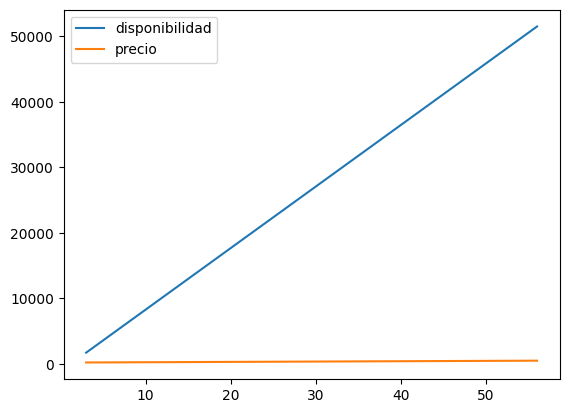

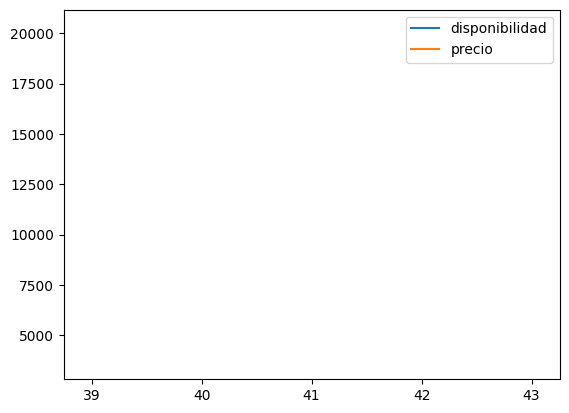

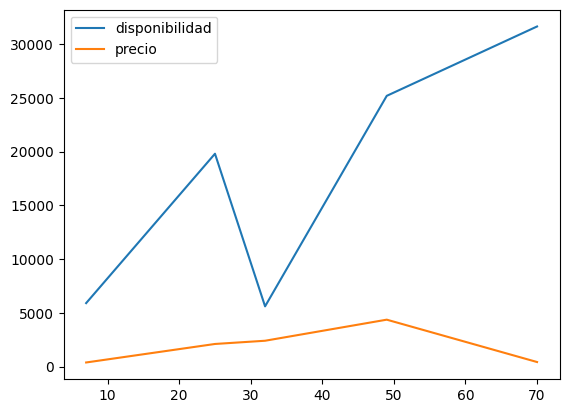

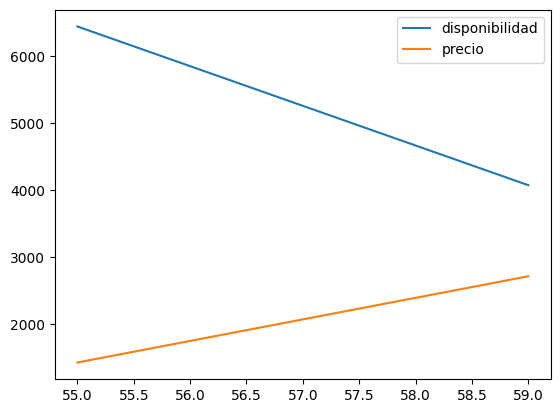

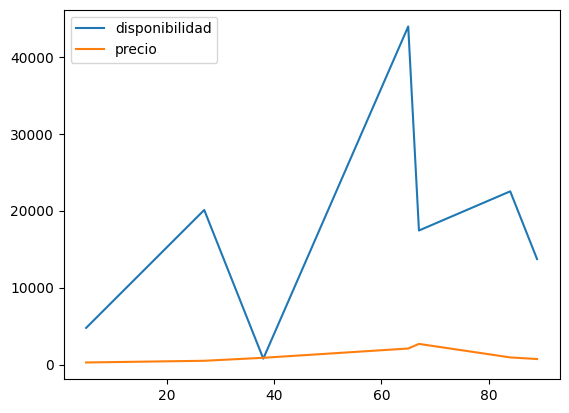

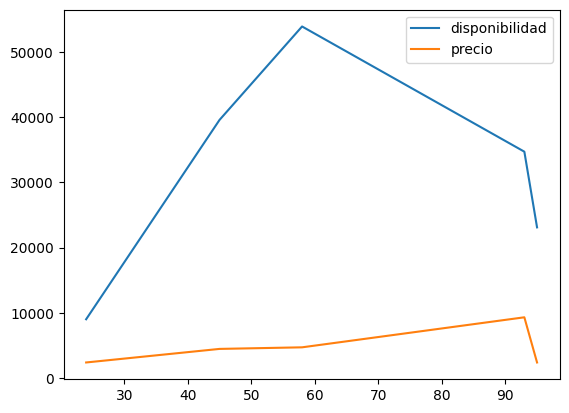

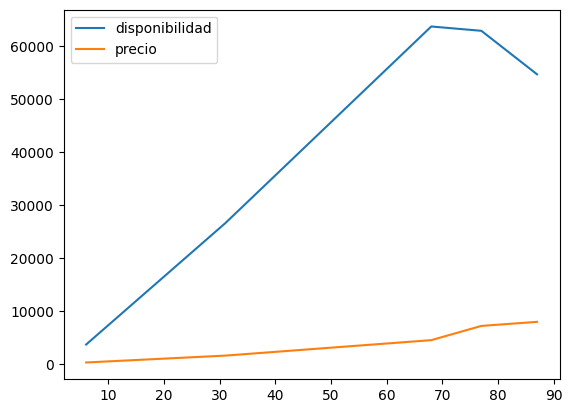

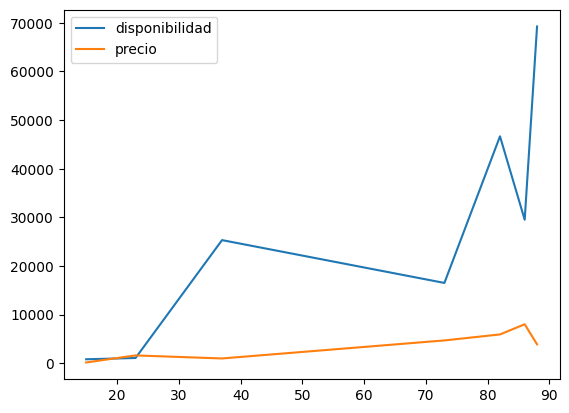

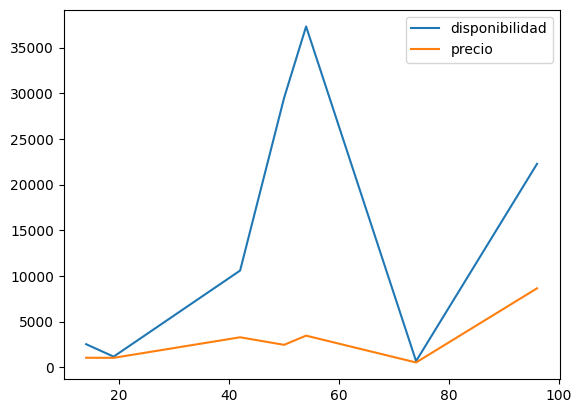

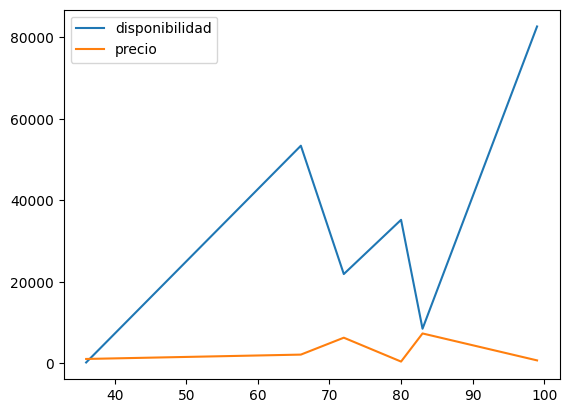

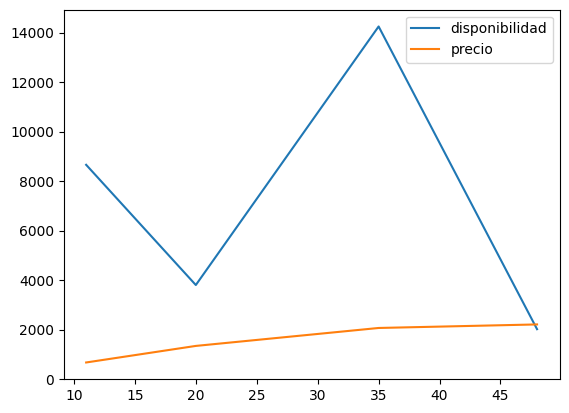

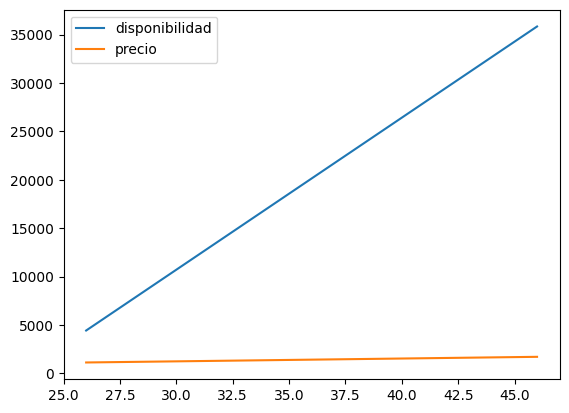

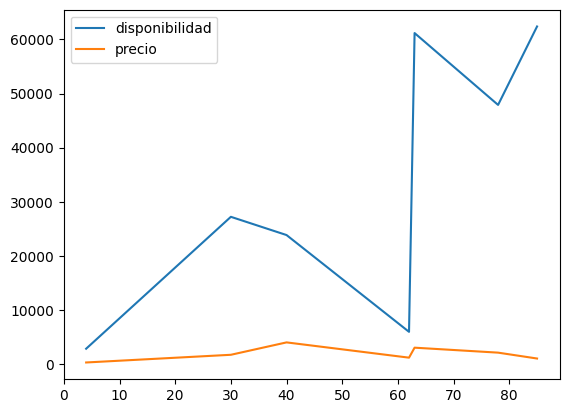

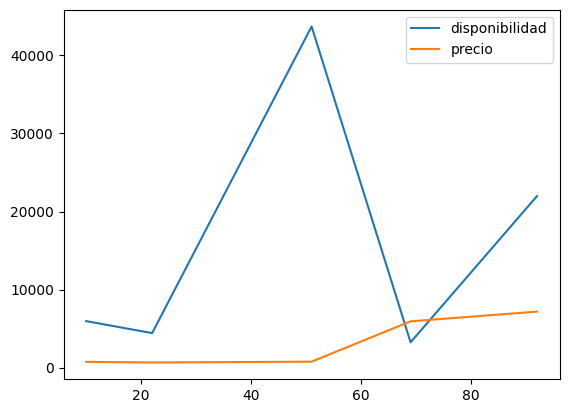

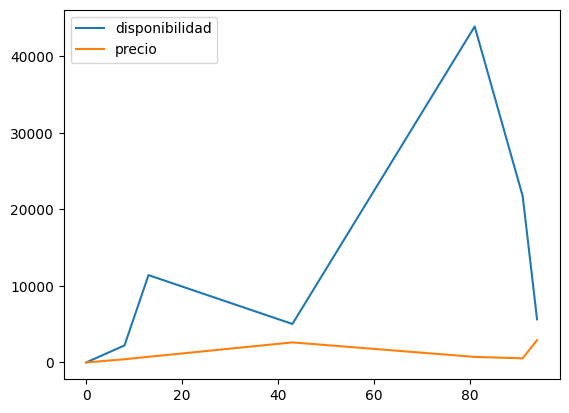

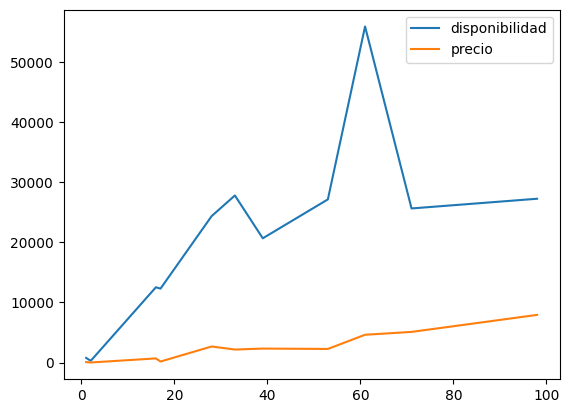

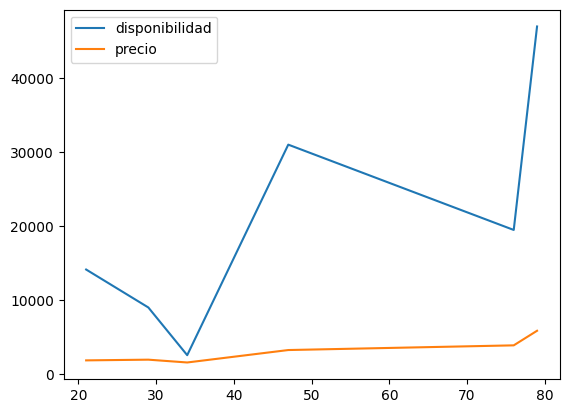

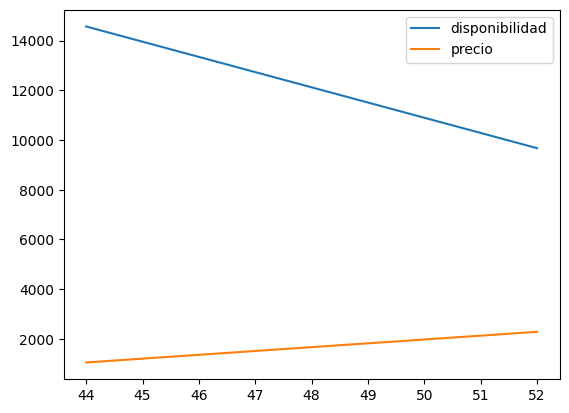

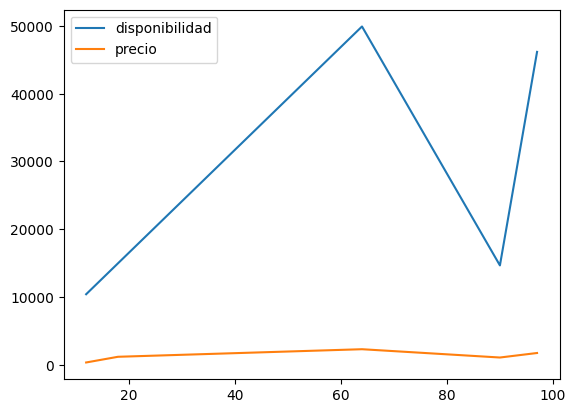

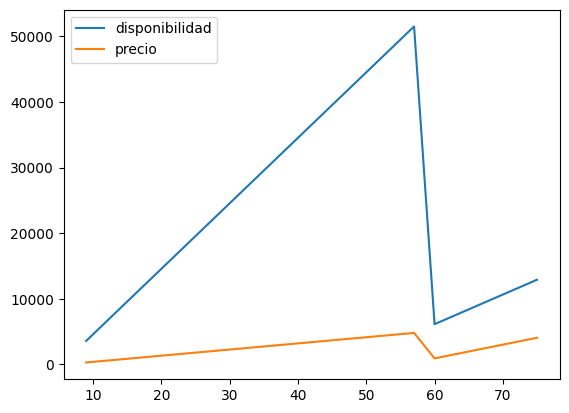

In [417]:
ej.plot()

# <center>**FUNCIONES DE AGREGADO**</center>

In [418]:
ej.sum()

disponibilidad  precio
publico departamento                           
Hombre  Adolescentes              53245     732
        Adultos                   20336    3649
        Adultos Mayores           88127    9659
        Bebes                     10506    4144
        Mascotas                 123186    8021
Mujer   Adolescentes             160211   23204
        Adultos                  211446   21789
        Adultos Mayores          189071   25130
        Bebes                    104015   20402
        Mascotas                 201793   17817
Niña    Adolescentes              28718    6284
        Adultos                   40254    2820
        Adultos Mayores          231289   13326
        Bebes                     79320   15275
        Mascotas                  89968    7977
Niño    Adolescentes             234637   28190
        Adultos                  123007   18320
        Adultos Mayores           24236    3344
        Bebes                    136154    6666
        Mascotas                  74112   10017

In [419]:
# count,size,sum,mean,average,std,var,sem,describe,min,max,first,last,nth
ej.agg(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

disponibilidad                              \
                                   sum    max    min           std   
publico departamento                                                 
Hombre  Adolescentes             53245  51520   1725  35210.382169   
        Adultos                  20336  20336  20336           NaN   
        Adultos Mayores          88127  31640   5600  11622.955425   
        Bebes                    10506   6435   4071   1671.600431   
        Mascotas                123186  43940    760  14069.827623   
Mujer   Adolescentes            160211  53882   9000  16967.608780   
        Adultos                 211446  63648   3732  26284.595626   
        Adultos Mayores         189071  69256    795  24668.096943   
        Bebes                   104015  37314    666  14906.353620   
        Mascotas                201793  82665    180  30618.673233   
Niña    Adolescentes             28718  14245   2016   5482.914341   
        Adultos                  40254  35834   4420  22213.052424   
        Adultos Mayores         231289  62390   2832  24625.129406   
        Bebes                    79320  43707   3243  17327.970496   
        Mascotas                 89968  43902      0  15472.913105   
Niño    Adolescentes            234637  55876    312  15344.673762   
        Adultos                 123007  46926   2550  16152.995244   
        Adultos Mayores          24236  14564   9672   3459.166374   
        Bebes                   136154  49920  10416  19132.826325   
        Mascotas                 74112  51528   3564  22349.900402   

                              precio                                   
                                mean  median          std first  last  
publico departamento                                                   
Hombre  Adolescentes      366.000000   366.0   195.161472   228   504  
        Adultos          3649.000000  3649.0          NaN  3649  3649  
        Adultos Mayores  1931.800000  2100.0  1646.841583   378   420  
        Bebes            2072.000000  2072.0   907.925107  1430  2714  
        Mascotas         1145.857143   874.0   889.653196   265   712  
Mujer   Adolescentes     4640.800000  4455.0  2828.829564  2376  2375  
        Adultos          4357.800000  4556.0  3357.016711   348  8004  
        Adultos Mayores  3590.000000  3872.0  2854.549760   135  3872  
        Bebes            2914.571429  2450.0  2776.671320  1036  8640  
        Mascotas         2969.500000  1578.0  3028.836724  1044   693  
Niña    Adolescentes     1571.000000  1702.5   710.203257   671  2208  
        Adultos          1410.000000  1410.0   412.950360  1118  1702  
        Adultos Mayores  1903.714286  1710.0  1267.940813   288  1020  
        Bebes            3055.000000   765.0  3225.315178   740  7176  
        Mascotas         1139.571429   729.0  1143.064428     0  2914  
Niño    Adolescentes     2562.727273  2279.0  2481.393967    98  7938  
        Adultos          3053.333333  2593.0  1638.018518  1848  5846  
        Adultos Mayores  1672.000000  1672.0   871.155554  1056  2288  
        Bebes            1333.200000  1188.0   736.320039   348  1746  
        Mascotas         2504.250000  2475.0  2245.752491   279  4050

In [420]:
ej.aggregate(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

disponibilidad                              \
                                   sum    max    min           std   
publico departamento                                                 
Hombre  Adolescentes             53245  51520   1725  35210.382169   
        Adultos                  20336  20336  20336           NaN   
        Adultos Mayores          88127  31640   5600  11622.955425   
        Bebes                    10506   6435   4071   1671.600431   
        Mascotas                123186  43940    760  14069.827623   
Mujer   Adolescentes            160211  53882   9000  16967.608780   
        Adultos                 211446  63648   3732  26284.595626   
        Adultos Mayores         189071  69256    795  24668.096943   
        Bebes                   104015  37314    666  14906.353620   
        Mascotas                201793  82665    180  30618.673233   
Niña    Adolescentes             28718  14245   2016   5482.914341   
        Adultos                  40254  35834   4420  22213.052424   
        Adultos Mayores         231289  62390   2832  24625.129406   
        Bebes                    79320  43707   3243  17327.970496   
        Mascotas                 89968  43902      0  15472.913105   
Niño    Adolescentes            234637  55876    312  15344.673762   
        Adultos                 123007  46926   2550  16152.995244   
        Adultos Mayores          24236  14564   9672   3459.166374   
        Bebes                   136154  49920  10416  19132.826325   
        Mascotas                 74112  51528   3564  22349.900402   

                              precio                                   
                                mean  median          std first  last  
publico departamento                                                   
Hombre  Adolescentes      366.000000   366.0   195.161472   228   504  
        Adultos          3649.000000  3649.0          NaN  3649  3649  
        Adultos Mayores  1931.800000  2100.0  1646.841583   378   420  
        Bebes            2072.000000  2072.0   907.925107  1430  2714  
        Mascotas         1145.857143   874.0   889.653196   265   712  
Mujer   Adolescentes     4640.800000  4455.0  2828.829564  2376  2375  
        Adultos          4357.800000  4556.0  3357.016711   348  8004  
        Adultos Mayores  3590.000000  3872.0  2854.549760   135  3872  
        Bebes            2914.571429  2450.0  2776.671320  1036  8640  
        Mascotas         2969.500000  1578.0  3028.836724  1044   693  
Niña    Adolescentes     1571.000000  1702.5   710.203257   671  2208  
        Adultos          1410.000000  1410.0   412.950360  1118  1702  
        Adultos Mayores  1903.714286  1710.0  1267.940813   288  1020  
        Bebes            3055.000000   765.0  3225.315178   740  7176  
        Mascotas         1139.571429   729.0  1143.064428     0  2914  
Niño    Adolescentes     2562.727273  2279.0  2481.393967    98  7938  
        Adultos          3053.333333  2593.0  1638.018518  1848  5846  
        Adultos Mayores  1672.000000  1672.0   871.155554  1056  2288  
        Bebes            1333.200000  1188.0   736.320039   348  1746  
        Mascotas         2504.250000  2475.0  2245.752491   279  4050

# <center>**STACK, UNSTACK**</center>

In [425]:
ej.stack(['departamento'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'stack'

In [422]:
ej.sum().unstack()

disponibilidad                                           \
departamento   Adolescentes Adultos Adultos Mayores   Bebes Mascotas   
publico                                                                
Hombre                53245   20336           88127   10506   123186   
Mujer                160211  211446          189071  104015   201793   
Niña                  28718   40254          231289   79320    89968   
Niño                 234637  123007           24236  136154    74112   

                   precio                                          
departamento Adolescentes Adultos Adultos Mayores  Bebes Mascotas  
publico                                                            
Hombre                732    3649            9659   4144     8021  
Mujer               23204   21789           25130  20402    17817  
Niña                 6284    2820           13326  15275     7977  
Niño                28190   18320            3344   6666    10017

In [423]:
ej.sum().unstack(['publico'])

disponibilidad                         precio                \
publico                 Hombre   Mujer    Niña    Niño Hombre  Mujer   Niña   
departamento                                                                  
Adolescentes             53245  160211   28718  234637    732  23204   6284   
Adultos                  20336  211446   40254  123007   3649  21789   2820   
Adultos Mayores          88127  189071  231289   24236   9659  25130  13326   
Bebes                    10506  104015   79320  136154   4144  20402  15275   
Mascotas                123186  201793   89968   74112   8021  17817   7977   

                        
publico           Niño  
departamento            
Adolescentes     28190  
Adultos          18320  
Adultos Mayores   3344  
Bebes             6666  
Mascotas         10017

# GRAFICOS

# <center>**HABILITAR PLOTLY EN PANDAS**</center>

In [ ]:
datos_graficas = df1.sample(10)
datos_graficas

In [ ]:
print(datos_graficas.Peces)
df_otro = pd.DataFrame(datos_graficas, columns=['Lider','Peces'])
df_otro= df_otro.set_index('Peces')

df_otro.plot.pie(y ='Lider')
#df_otro

In [ ]:
! pip install cufflinks 

In [ ]:
pd.options.plotting.backend = "plotly"
pd.options.plotting.backend = 'matplotlib'

import numpy as np
# Let's create a random data with numpy
df = pd.DataFrame(np.random.rand(200, 4), columns='A B C D'.split())

# check the data once
df.head()

# <center>**GRAFICO LINEAS**</center>

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(subplots=True)

In [ ]:
df.plot()

In [ ]:
df.plot(kind='line')

In [ ]:
df.plot.line(backend='plotly')

# <center>**GRAFICO DISPERSION**</center>

In [ ]:
df.plot.scatter(x='A', y='B')

In [ ]:
pd.options.plotting.backend = "plotly"
df.plot.scatter(x='A', y='B')

# <center>**GRAFICO DE BARRAS VERTICALES**</center>

In [ ]:
pd.options.plotting.backend = 'matplotlib'
df.plot.bar()

# <center>**GRAFICO DE BARRAS HORIZONTALES**</center>

In [ ]:
# muestra el valor acumulado de una columna

df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 5.97 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])

df.plot.barh(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 500 , 1297]},
                  index=['Mercury', 'Venus', 'Earth'])

#df.plot.hist(backend='plotly')
df.plot.hist()

In [ ]:
df.plot.hist(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [3.87, 3.87 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])
df.hist()

In [ ]:
x = pd.DataFrame({'valores':[-5,-98,-3,-3,-3,-3,-1, 8, 13, 98], 'index':list('abcdeftyui')})
x = x.set_index('index')
x.plot.bar(backend='plotly')

In [ ]:
len(list('abcdeftyui'))

# <center>**GRAFICO DE AREA**</center>

In [ ]:
df.plot.area(backend='plotly')

# <center>**GRAFICO DE HISTOGRAMA**</center>

In [ ]:
df.plot.hist(backend='plotly')

# <center>**GRAFICO DE CAJA**</center>

In [ ]:
df.plot.box(backend='plotly')

In [ ]:
#!pip install plotly
#!pip install seaborn

import pandas as pd
#pd.options.plotting.backend = "plotly"

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df

In [ ]:
df[['total_bill', 'tip', 'size']].plot(kind='line')

In [ ]:
df.plot(kind='scatter', x='total_bill', y='tip')

In [ ]:
df['day'].value_counts().plot(kind='bar')

In [ ]:
df[['total_bill', 'tip']].plot(kind='hist')

In [ ]:
df[['total_bill', 'tip']].plot(kind='box')

In [ ]:
df[['total_bill', 'tip']].plot(kind='area')

In [ ]:
df.groupby('day')['day', 'total_bill'].sum().reset_index().plot(kind='pie', x='day', y='total_bill');

In [ ]:
df['day'].value_counts().plot_bokeh(kind='bar', alpha=0.7);

In [ ]:
df['total_bill'].plot_bokeh(kind='hist', bins=10, alpha=0.7);

In [ ]:
df[['total_bill', 'tip']].plot_bokeh(kind='area', alpha=0.6);

In [ ]:
import plotly.tools as tls
tls.embed('https://plotly.com/~chris/7365')